Article : Football Match Prediction with Tree Based
Model Classification

Data Collection: Utilizing data from 10 seasons of the English Premier League, including football match statistics.

Feature Selection: Employing a backward wrapper model to select the best features for prediction accuracy. The selected features include HTHG, HTAG, HS, AS, HST, AST, HF, AF, HC, and HY.

Random Forest Algorithm: The model uses bootstrap samples to create unpruned classification trees, selecting the best split among a random subset of predictors at each node. The algorithm aims to prevent overfitting. The parameters include ntree (number of trees) and mtry (number of variables for splitting at each node). The best model used ntree = 500 and mtry = 2.

Model Evaluation: The model's performance is evaluated using a confusion matrix, sensitivity, specificity, Kappa, and accuracy metrics.

Parameter Tuning: The model undergoes tuning for parameters like ntree and mtry to enhance accuracy. ntree values tested range from 250 to 2000, and mtry values from 1 to 10. The best results were observed with ntree = 500 and mtry = 3.

Performance Comparison: The Random Forest model is compared with C5.0 and Extreme Gradient Boosting, with respective accuracies of 64.87%, 68.55%, and 67.89%.

# CODE 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Replace 'your_data.csv' with the path to your dataset
data = pd.read_csv('/content/drive/MyDrive/FB_2023 - Sheet1.csv')

In [ ]:
# Example of dropping irrelevant columns
data = data.drop(['HomeTeam', 'AwayTeam', 'H_Ranking_Prior_Season', 'A_Ranking_Prior_Season'], axis=1)

# Handling missing values
data = data.dropna()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('FTHG', axis=1)
y = data['FTAG']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score

# Training Decision Tree (C5.0 equivalent)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Training XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Other metrics like F1 score and Kappa can be calculated similarly

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# Load the dataset (assuming the file is named 'E0 (3).csv')
file_path = '/content/drive/MyDrive/E0.csv'
data = pd.read_csv(file_path)

# Preprocessing and feature selection based on the article's methodology
# Note: This step will vary based on the exact features mentioned in the article.
# For demonstration, I'm assuming certain features are selected.
selected_features = [
    'HTHG', 'HTAG', # Half Time Home and Away Goals
    'HS', 'AS',     # Home and Away Shots
    'HST', 'AST',   # Home and Away Shots on Target
    'HF', 'AF',     # Home and Away Fouls
    'HC', 'AC',     # Home and Away Corners
    'HY', 'AY',     # Home and Away Yellow Cards
    # Add more features as mentioned in the article
]
X = data[selected_features]
y = data['FTR']  # Assuming 'FTR' is the Full Time Result

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
# Using ntree = 500 and mtry = 2 as mentioned in the article
rf_model = RandomForestClassifier(n_estimators=500, max_features=2, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV

# Load the dataset
file_path = '/content/drive/MyDrive/E0.csv'
data = pd.read_csv(file_path)

# Assuming the dataset structure is similar to what's described in the article
# Preprocessing steps (exact steps depend on the article's methodology)
# Removing irrelevant columns like match date, referee name, team names, etc.
# Assuming 'FTR' is the column for Full Time Result
relevant_columns = [
    # Assuming these columns based on common football match stats
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]
X = data[relevant_columns]
y = data['FTR']  # Full Time Result

# Feature Selection using Random Forest
selector = RFECV(RandomForestClassifier(n_estimators=100, random_state=42), step=1, cv=5)
X_selected = selector.fit_transform(X, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
# n_estimators and max_features are based on article's suggestion
rf_model = RandomForestClassifier(n_estimators=500, max_features=2, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model using cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Predictions and Evaluation on Test Set
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Feature Importance
features_importance = pd.Series(rf_model.feature_importances_, index=X.columns[selector.support_])
print(features_importance.sort_values(ascending=False))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/E0.csv')  # replace with your dataset path

# Preprocessing
# Assume df is preprocessed according to the article's methodology

# Define features and target variable
X = df[['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']]  # example features
y = df['FTR']  # Target variable, full-time result

# Initialize Random Forest classifier with parameters based on the article
rf_classifier = RandomForestClassifier(n_estimators=500, max_features=2, oob_score=True, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=10)

# Train the model on the entire dataset
rf_classifier.fit(X, y)

# Out-of-bag score
oob_score = rf_classifier.oob_score_

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')
print(f'OOB Score: {oob_score}')

# CODE 1 (fonctionne)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## RF (OK)

<ipython-input-2-49ed5315058f>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo22.csv', error_bad_lines=False)
Skipping line 2281: expected 71 fields, saw 141



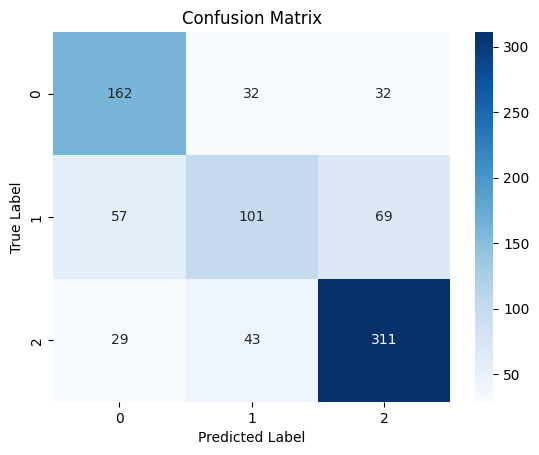

              precision    recall  f1-score   support

           A       0.65      0.72      0.68       226
           D       0.57      0.44      0.50       227
           H       0.75      0.81      0.78       383

    accuracy                           0.69       836
   macro avg       0.66      0.66      0.66       836
weighted avg       0.68      0.69      0.68       836



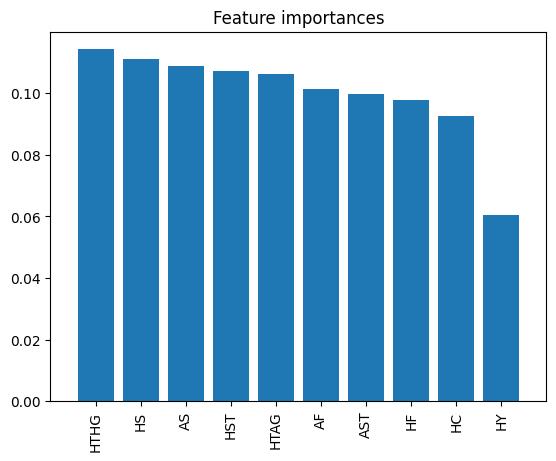

Accuracy: 0.6866028708133971, F1 Score: 0.6793277467551424, Kappa: 0.507903841833296


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo22.csv', error_bad_lines=False)

# Selecting the features as per the article
features = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter tuning
param_grid = {
    'n_estimators': [500],
    'max_features': [3]  # 'mtry' equivalent in scikit-learn
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predictions and evaluation
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
kappa = cohen_kappa_score(y_test, predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print(classification_report(y_test, predictions))

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

print(f"Accuracy: {accuracy}, F1 Score: {f1}, Kappa: {kappa}")

## c5.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, cohen_kappa_score
import pandas as pd

# Assuming the file is at the specified path and named 'Dataset_Isa_Alfredo22.csv'.
df = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo22.csv', error_bad_lines=False)

features = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = df[features]  # feature columns
y = df['FTR']  # target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=10)

# Testing the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Kappa: {kappa}')

Skipping line 2281: expected 71 fields, saw 141



Accuracy: 0.6088516746411483
Kappa: 0.39556644364749116


## xgb (OK)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo22.csv', error_bad_lines=False)

# Define the feature set and target variable based on the selected features by the authors
X = data[['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']]  # Replace with actual feature names
y = data['FTR']  # FTR is the target variable representing the full-time result

# Assuming 'y' is your target variable with values 'A', 'D', 'H'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now, you should split 'y_encoded' instead of 'y'
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Proceed with the XGBoost model training using 'y_train_encoded'
xgb_classifier.fit(X_train, y_train_encoded)

# When making predictions, use the encoded labels
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode the predictions back to the original labels for interpretability
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model using the encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Print the results
print("Extreme Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("Confusion Matrix:\n", conf_matrix)

<ipython-input-14-72a59e1bc3e0>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo22.csv', error_bad_lines=False)
Skipping line 2281: expected 71 fields, saw 141



Extreme Gradient Boosting Model Evaluation:
Accuracy: 0.6770334928229665
Kappa Score: 0.4887683965917893
Confusion Matrix:
 [[162  29  35]
 [ 65  83  79]
 [ 31  31 321]]


# CODE copié des articles

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## RF (65,52 moi vs 68,55 eux)

{'A': 0, 'D': 1, 'H': 2}


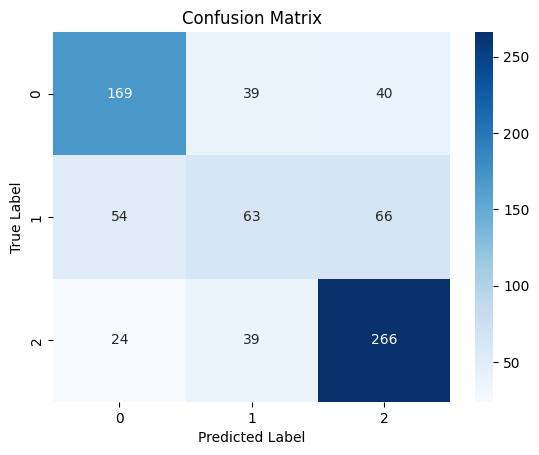

              precision    recall  f1-score   support

           A       0.68      0.68      0.68       248
           D       0.45      0.34      0.39       183
           H       0.72      0.81      0.76       329

    accuracy                           0.66       760
   macro avg       0.62      0.61      0.61       760
weighted avg       0.64      0.66      0.64       760



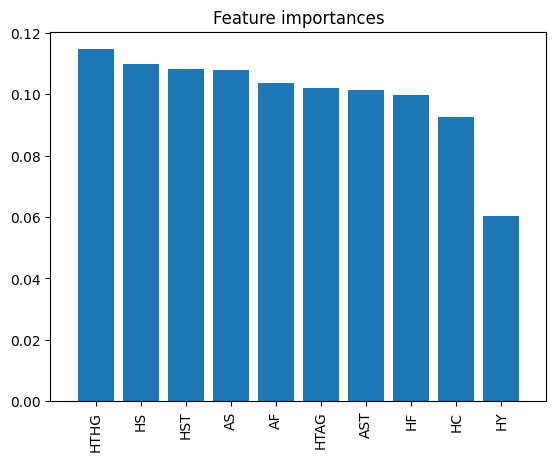

Accuracy: 0.6552631578947369, F1 Score: 0.6449886715340203, Kappa: 0.4591379127699624


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data.dropna(subset=['FTR'], inplace=True)
data['FTR_encoded'] = label_encoder.fit_transform(data['FTR'])

# Checking the mapping of original to encoded values
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(encoded_mapping)

# Selecting the features as per the article
features = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter tuning
param_grid = {
    'n_estimators': [500],
    'max_features': [3]  # 'mtry' equivalent in scikit-learn
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predictions and evaluation
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
kappa = cohen_kappa_score(y_test, predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print(classification_report(y_test, predictions))

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

print(f"Accuracy: {accuracy}, F1 Score: {f1}, Kappa: {kappa}")

## xgb (62,76 moi vs 67,89 eux)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score, recall_score
from xgboost import XGBClassifier  # Import XGBClassifier

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)

# Define the feature set and target variable based on the selected features by the authors
X = data[['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']]  # Replace with actual feature names
y = data['FTR']  # FTR is the target variable representing the full-time result

# Assuming 'y' is your target variable with values 'A', 'D', 'H'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now, you should split 'y_encoded' instead of 'y'
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an instance of the XGBoost classifier
xgb_classifier = XGBClassifier()

# Proceed with the XGBoost model training using 'y_train_encoded'
xgb_classifier.fit(X_train, y_train_encoded)

# When making predictions, use the encoded labels
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode the predictions back to the original labels for interpretability
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model using the encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Calculate and print Recall and F1-Score
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

# Print the results
print("Extreme Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)

<ipython-input-7-aa5825eb4f8f>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)


Extreme Gradient Boosting Model Evaluation:
Accuracy: 0.6276315789473684
Kappa Score: 0.4247090511765005
Confusion Matrix:
 [[159  55  34]
 [ 63  70  50]
 [ 27  54 248]]
Recall: 0.6276315789473684
F1-Score: 0.6267473602942656


## C5.0 ( 53,55 moi vs 64,87 eux)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score

# Assuming the file is at the specified path and named 'Dataset_Isa_Alfredo60.csv'.
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Select your features and target based on the article
features = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
target = 'FTR'  # Assuming FTR is the target variable in your dataset

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)
print("Kappa Score:", kappa)

Accuracy: 0.5355263157894737
Confusion Matrix:
 [[152  58  38]
 [ 60  65  58]
 [ 46  93 190]]
Recall: 0.5355263157894737
F1-Score: 0.5419798163509664
Kappa Score: 0.29398885245556505


# CODE copié des articles avec mes features

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## RF (65,52 moi vs 66,18 avec features)

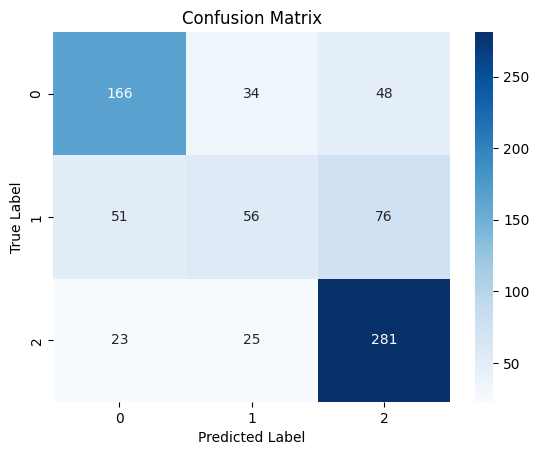

              precision    recall  f1-score   support

           A       0.69      0.67      0.68       248
           D       0.49      0.31      0.38       183
           H       0.69      0.85      0.77       329

    accuracy                           0.66       760
   macro avg       0.62      0.61      0.61       760
weighted avg       0.64      0.66      0.64       760



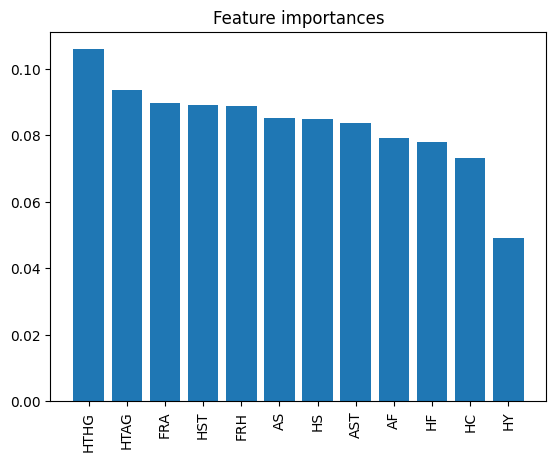

Accuracy: 0.6618421052631579, F1 Score: 0.6439532462078044, Kappa: 0.46309684158443054


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Selecting the features as per the article
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter tuning
param_grid = {
    'n_estimators': [500],
    'max_features': [3]  # 'mtry' equivalent in scikit-learn
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predictions and evaluation
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
kappa = cohen_kappa_score(y_test, predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print(classification_report(y_test, predictions))

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

print(f"Accuracy: {accuracy}, F1 Score: {f1}, Kappa: {kappa}")

## xgb (62,76 moi vs 60,26 avec features)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from xgboost import XGBClassifier  # Import XGBClassifier

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)

# Define the feature set and target variable based on the selected features by the authors
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']]  # Replace with actual feature names
y = data['FTR']  # FTR is the target variable representing the full-time result

# Assuming 'y' is your target variable with values 'A', 'D', 'H'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now, you should split 'y_encoded' instead of 'y'
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an instance of the XGBoost classifier
xgb_classifier = XGBClassifier()

# Proceed with the XGBoost model training using 'y_train_encoded'
xgb_classifier.fit(X_train, y_train_encoded)

# When making predictions, use the encoded labels
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode the predictions back to the original labels for interpretability
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model using the encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Calculate and print Recall and F1-Score
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

# Print the results
print("Extreme Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("Confusion Matrix:\n", conf_matrix)
print("F1-Score:", f1)

<ipython-input-4-ea4d1b2f19a1>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)


Extreme Gradient Boosting Model Evaluation:
Accuracy: 0.6026315789473684
Kappa Score: 0.37771632301706726
Confusion Matrix:
 [[155  52  41]
 [ 59  49  75]
 [ 27  48 254]]
F1-Score: 0.5925506050944317


## C5.0 ( 53,55 moi vs 57,10 features)

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming the file is at the specified path and named 'Dataset_Isa_Alfredo22.csv'.
df = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Select your features and target based on the article
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
target = 'FTR'  # Assuming FTR is the target variable in your dataset

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Average cross-validation score:', cv_scores.mean())

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("F1-Score:", f1)
print("Kappa Score:", kappa)

Average cross-validation score: 0.5424342105263158
Accuracy: 0.5710526315789474
Confusion Matrix:
 [[139  63  46]
 [ 52  78  53]
 [ 38  74 217]]
F1-Score: 0.5758407556025793
Kappa Score: 0.34368038061027983


# CODE copié des articles avec mes features et à améliorer

## Importations de base

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

display(data.iloc[:, :20])

Div        Date       HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0  11/08/2007    Aston Villa       Liverpool     1     2   A     0   
1     E0  11/08/2007         Bolton       Newcastle     1     3   A     0   
2     E0  11/08/2007          Derby      Portsmouth     2     2   D     1   
3     E0  11/08/2007        Everton           Wigan     2     1   H     1   
4     E0  11/08/2007  Middlesbrough       Blackburn     1     2   A     1   
...   ..         ...            ...             ...   ...   ...  ..   ...   
3795  E0  21/05/2017      Liverpool   Middlesbrough     3     0   H     1   
3796  E0  21/05/2017     Man United  Crystal Palace     2     0   H     2   
3797  E0  21/05/2017    Southampton           Stoke     0     1   A     0   
3798  E0  21/05/2017        Swansea       West Brom     2     1   H     0   
3799  E0  21/05/2017        Watford        Man City     0     5   A     0   

      HTAG HTR  FRH  FRA        Referee  HS  AS  HST  AST  HF  AF  HC  
0        1   A   11    3        M Riley  10  17    6    7  18  11   4  
1        3   A    7   13          C Foy  13   7    9    5  15  16   4  
2        1   D   18    9         M Dean  12  12    5    6  14  17   6  
3        0   H    6   17  M Clattenburg  12  14    8    4   8  13   6  
4        0   H   12   10     A Marriner  10   4    6    4  16  16  13  
...    ...  ..  ...  ...            ...  ..  ..  ...  ...  ..  ..  ..  
3795     0   H    8   18     M Atkinson  25   9   10    3  13   8   3  
3796     0   H    5   15       A Taylor   9   6    2    1  16  10   3  
3797     0   D    6    9      L Probert  14  14    6    3  12  10   4  
3798     1   A   12   14         M Dean  12  16    2    5   8  10   7  
3799     4   A   13    4         J Moss   6  15    3    9  12  10   4  

[3800 rows x 20 columns]

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00


## RF (65,52 moi vs 66,18 avec features vs 66,97 en améliorer)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Création et entraînement du modèle avec les meilleurs hyperparamètres obtenus
best_params = {
    'n_estimators': 791,
    'max_depth': 68,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'log2'
}

best_model = RandomForestClassifier(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6697368421052632
Recall: 0.6177031311866533
F1 Score: 0.6154047807805115
Cohen Kappa Score: 0.47593550567168774
              precision    recall  f1-score   support

           A       0.71      0.68      0.69       248
           D       0.49      0.31      0.38       183
           H       0.70      0.86      0.77       329

    accuracy                           0.67       760
   macro avg       0.63      0.62      0.62       760
weighted avg       0.65      0.67      0.65       760



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Fonction d'objectif pour l'optimisation des hyperparamètres avec Optuna
def objective(trial):
    # Séparation des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Définition des hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Création et évaluation du modèle
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    return cross_val_score(model, X_test, y_test, n_jobs=-1, cv=3).mean()

# Création de l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Affichage des meilleurs hyperparamètres
print('Meilleurs hyperparamètres:', study.best_params)

# Création et entraînement du modèle avec les meilleurs hyperparamètres
best_params = study.best_params
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X, y)

[I 2024-02-18 16:07:50,142] A new study created in memory with name: no-name-e22909eb-bb2b-48e9-bbf8-d066dd4afc31
[I 2024-02-18 16:07:58,577] Trial 0 finished with value: 0.65529654642972 and parameters: {'n_estimators': 613, 'max_depth': 76, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.65529654642972.
[I 2024-02-18 16:08:05,245] Trial 1 finished with value: 0.6592646768956252 and parameters: {'n_estimators': 655, 'max_depth': 64, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6592646768956252.
[I 2024-02-18 16:08:09,085] Trial 2 finished with value: 0.6526666874150613 and parameters: {'n_estimators': 384, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.6592646768956252.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 

Meilleurs hyperparamètres: {'n_estimators': 821, 'max_depth': 46, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}


RandomForestClassifier(max_depth=46, max_features='log2', min_samples_split=7,
                       n_estimators=821, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Création et entraînement du modèle avec les meilleurs hyperparamètres obtenus
best_params = {
    'n_estimators': 821,
    'max_depth': 46,
    'min_samples_split': 7,
    'min_samples_leaf': 1,
    'max_features': 'log2'
}

best_model = RandomForestClassifier(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ajout du random_state
best_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6618421052631579
Recall: 0.6093456294422236
F1 Score: 0.6060541111421739
Cohen Kappa Score: 0.46376604693557066
              precision    recall  f1-score   support

           A       0.69      0.67      0.68       248
           D       0.47      0.30      0.37       183
           H       0.70      0.85      0.77       329

    accuracy                           0.66       760
   macro avg       0.62      0.61      0.61       760
weighted avg       0.64      0.66      0.64       760



## xgb (62,76 moi vs 60,26 avec features vs 67,76 en améliorer )

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score, recall_score
from xgboost import XGBClassifier
import optuna

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)

# Define the feature set and target variable
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF','HC','HY']]  # Example features
y = data['FTR']  # Example target variable

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Define the search space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    model = XGBClassifier(**param)
    model.fit(X_train_scaled, y_train_encoded)
    preds = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Best parameters
best_params = study.best_params
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = best_xgb_classifier.predict(X_test_scaled)

# Decode the predictions back to the original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

# Print the results
print("Extreme Gradient Boosting Model Evaluation with Optuna:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)

<ipython-input-4-3e21d76ed048>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)
[I 2024-02-20 14:21:40,970] A new study created in memory with name: no-name-a64e8a52-a3b7-49af-9b17-763060d52bdd
<ipython-input-4-3e21d76ed048>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 14:21:41,277] Trial 0 finished with value: 0.6447368421052632 and parameters: {'n_estimators': 91, 'max_depth': 18, 'learning_rate': 0.07848118157764104, 'gamma': 0.4691177001648839, 'min_child_weight': 9}. Best is trial 0 with value: 0.6447368421052632.
<ipython-input-4-3e21d76ed048>:32:

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score, recall_score
from xgboost import XGBClassifier

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)

# Define the feature set and target variable based on the selected features by the authors
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF']]  # Update with features
y = data['FTR']  # FTR is the target variable representing the full-time result

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(
    n_estimators=290,
    max_depth=5,
    learning_rate=0.0057050659071103205,
    gamma=0.11588519375368204,
    min_child_weight=1
)

# Train the best model on the training set
best_xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = best_xgb_classifier.predict(X_test_scaled)

# Decode the predictions back to the original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

# Print the results
print("Extreme Gradient Boosting Model Evaluation:")
print("Best Parameters: {'n_estimators': 283, 'max_depth': 5, 'learning_rate': 0.0034620769900010444, 'gamma': 0.404632351692201, 'min_child_weight': 8}")
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)

# Additional: Cross-validation scores
cv_scores = cross_val_score(best_xgb_classifier, X_train_scaled, y_train_encoded, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

<ipython-input-13-0d9d48529a1f>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)


Extreme Gradient Boosting Model Evaluation:
Best Parameters: {'n_estimators': 283, 'max_depth': 5, 'learning_rate': 0.0034620769900010444, 'gamma': 0.404632351692201, 'min_child_weight': 8}
Accuracy: 0.6776315789473685
Kappa Score: 0.48768603022707446
Confusion Matrix:
 [[170  36  42]
 [ 50  57  76]
 [ 23  18 288]]
Recall: 0.6776315789473685
F1-Score: 0.6585775210502253
Cross-validation Scores: [0.62171053 0.61348684 0.63651316 0.62171053 0.62664474]
Mean CV Accuracy: 0.6240131578947368


## C5.0 ( 53,55 moi vs 57,10 features vs 67,10 en améliorer)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import optuna

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define features and target
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
target = 'FTR'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define the hyperparameter space
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Initialize and train the DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42, criterion=criterion, splitter=splitter,
                                 max_depth=max_depth, min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters found:", study.best_trial.params)
best_clf = DecisionTreeClassifier(**study.best_trial.params)
best_clf.fit(X_train, y_train)

# Predictions
y_pred = best_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)
print("Kappa Score:", kappa)

[I 2024-02-14 10:45:37,261] A new study created in memory with name: no-name-f9c8d24a-fad4-4127-9061-2e27295e2ca6
[I 2024-02-14 10:45:37,367] Trial 0 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.6276315789473684.
[I 2024-02-14 10:45:37,480] Trial 1 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6276315789473684.
[I 2024-02-14 10:45:37,608] Trial 2 finished with value: 0.6447368421052632 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6447368421052632.
[I 2024-02-14 10:45:37,770] Trial 3 finished with value: 0.6671052631578948 and parameters: {'criterion': 'entropy', 'splitter': 'best',

Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 13}
Accuracy: 0.6710526315789473
Confusion Matrix:
 [[165  45  38]
 [ 43  71  69]
 [ 27  28 274]]
Recall: 0.6710526315789473
F1-Score: 0.661633260609571
Kappa Score: 0.48316055481354336


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define features and target
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
target = 'FTR'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with the best parameters found
best_params = {
    'criterion': 'entropy',
    'splitter': 'best',
    'max_depth': 7,
    'min_samples_split': 7,
    'min_samples_leaf': 13,
    'random_state': 42
}
clf = DecisionTreeClassifier(**best_params)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

print("Best parameters found:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)
print("Kappa Score:", kappa)

Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 13, 'random_state': 42}
Accuracy: 0.6710526315789473
Confusion Matrix:
 [[165  45  38]
 [ 43  71  69]
 [ 27  28 274]]
Recall: 0.6710526315789473
F1-Score: 0.661633260609571
Kappa Score: 0.48316055481354336


# Combinaison de features

## Importations de base

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

display(data.iloc[:, :20])

Div        Date       HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0  11/08/2007    Aston Villa       Liverpool     1     2   A     0   
1     E0  11/08/2007         Bolton       Newcastle     1     3   A     0   
2     E0  11/08/2007          Derby      Portsmouth     2     2   D     1   
3     E0  11/08/2007        Everton           Wigan     2     1   H     1   
4     E0  11/08/2007  Middlesbrough       Blackburn     1     2   A     1   
...   ..         ...            ...             ...   ...   ...  ..   ...   
3795  E0  21/05/2017      Liverpool   Middlesbrough     3     0   H     1   
3796  E0  21/05/2017     Man United  Crystal Palace     2     0   H     2   
3797  E0  21/05/2017    Southampton           Stoke     0     1   A     0   
3798  E0  21/05/2017        Swansea       West Brom     2     1   H     0   
3799  E0  21/05/2017        Watford        Man City     0     5   A     0   

      HTAG HTR  FRH  FRA        Referee  HS  AS  HST  AST  HF  AF  HC  
0        1   A   11    3        M Riley  10  17    6    7  18  11   4  
1        3   A    7   13          C Foy  13   7    9    5  15  16   4  
2        1   D   18    9         M Dean  12  12    5    6  14  17   6  
3        0   H    6   17  M Clattenburg  12  14    8    4   8  13   6  
4        0   H   12   10     A Marriner  10   4    6    4  16  16  13  
...    ...  ..  ...  ...            ...  ..  ..  ...  ...  ..  ..  ..  
3795     0   H    8   18     M Atkinson  25   9   10    3  13   8   3  
3796     0   H    5   15       A Taylor   9   6    2    1  16  10   3  
3797     0   D    6    9      L Probert  14  14    6    3  12  10   4  
3798     1   A   12   14         M Dean  12  16    2    5   8  10   7  
3799     4   A   13    4         J Moss   6  15    3    9  12  10   4  

[3800 rows x 20 columns]

In [3]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.2 MB/s eta 0:00:00


## RF (65,52 moi vs 66,18 avec features vs 69,34 en améliorer)

In [23]:
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import optuna

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define the feature set and target variable
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF','HC','HY']]  # Example features
y = data['FTR']  # Example target variable

# Create a list of all possible combinations of features
feature_combinations = []
for r in range(8, len(X.columns) + 1):
    feature_combinations += list(itertools.combinations(X.columns, r))

# Function to perform training with a given set of features and model parameters
def train_evaluate_model(X_train, X_test, y_train, y_test, params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    kappa = cohen_kappa_score(y_test, preds)
    conf_matrix = confusion_matrix(y_test, preds)
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    return accuracy, kappa, conf_matrix, recall, f1

# Iterate over each combination
for combo in feature_combinations:
    # Select the features for this combination
    X_subset = X[list(combo)]

    # Encoding the target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Splitting the dataset
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_subset, y_encoded, test_size=0.2, random_state=42)

    # Optuna optimization
    def objective(trial):
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 5, 50),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
            'min_impurity_decrease' : trial.suggest_float('min_impurity_decrease', 0.0, 0.02),
            'random_state': 42
        }
        accuracy, _, _, _, _ = train_evaluate_model(X_train, X_test, y_train_encoded, y_test_encoded, param)
        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=10)
    best_params = study.best_params

    # Evaluate the best model
    accuracy, kappa, conf_matrix, recall, f1 = train_evaluate_model(X_train, X_test, y_train_encoded, y_test_encoded, best_params)

    # Print the results
    print(f"Random Forest Model Evaluation with Optuna (Features: {combo}):")
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)
    print("Kappa Score:", kappa)
    print("Confusion Matrix:\n", conf_matrix)
    print("Recall:", recall)
    print("F1-Score:", f1)

[I 2024-02-23 14:41:27,719] A new study created in memory with name: no-name-15662f11-01c7-4583-bf54-d4fd6ce4d01c
[I 2024-02-23 14:41:35,100] Trial 0 finished with value: 0.5973684210526315 and parameters: {'n_estimators': 980, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'min_impurity_decrease': 0.01882139871344474}. Best is trial 0 with value: 0.5973684210526315.
[I 2024-02-23 14:41:37,772] Trial 1 finished with value: 0.6210526315789474 and parameters: {'n_estimators': 362, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'min_impurity_decrease': 0.00784966011724168}. Best is trial 1 with value: 0.6210526315789474.
[I 2024-02-23 14:41:38,643] Trial 2 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 107, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'min_impurity_decrease': 0.0125368130880317}. Best is trial 1 with value: 0.6210526315789

Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST')):
Best Parameters: {'n_estimators': 362, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'min_impurity_decrease': 0.00784966011724168}
Accuracy: 0.6210526315789474
Kappa Score: 0.36522114885459656
Confusion Matrix:
 [[162   0  86]
 [ 32   0 151]
 [ 19   0 310]]
Recall: 0.6210526315789474
F1-Score: 0.5357279348938416


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-02-23 14:41:55,445] Trial 0 finished with value: 0.6144736842105263 and parameters: {'n_estimators': 210, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_features': 'auto', 'min_impurity_decrease': 0.0058978267547229925}. Best is trial 0 with value: 0.6144736842105263.
[I 2024-02-23 14:41:55,814] Trial 1 finished with value: 0.6144736842105263 and parameters: {'n_estimators': 158, 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'min_impurity_decrease': 0.006590625086453348}. Best is trial 0 with value: 0.6144736842105263.
[I 2024-02-23 14:41:58,035] Trial 2 finished with v

Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HF')):
Best Parameters: {'n_estimators': 791, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 19, 'max_features': 'log2', 'min_impurity_decrease': 0.002206893547247637}
Accuracy: 0.656578947368421
Kappa Score: 0.4464197007161157
Confusion Matrix:
 [[172  24  52]
 [ 54  35  94]
 [ 24  13 292]]
Recall: 0.656578947368421
F1-Score: 0.6211155138392767


[I 2024-02-23 14:42:14,116] Trial 0 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 672, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 19, 'max_features': 'log2', 'min_impurity_decrease': 0.01693430542247269}. Best is trial 0 with value: 0.5960526315789474.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-02-23 14:42:16,255] Trial 1 finished with value: 0.6342105263157894 and parameters: {'n_estimators': 638, 'max_depth': 39, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'auto', 'min_impurity_decrease': 0.004235683020761205}. Best is trial 1 with value: 0.6342105263157894.
[I 2024-02-23 14:42:18,068] Trial 2 finished with val

Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AF')):
Best Parameters: {'n_estimators': 309, 'max_depth': 36, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 'auto', 'min_impurity_decrease': 0.0008963923907885052}
Accuracy: 0.6460526315789473
Kappa Score: 0.4271688512555548
Confusion Matrix:
 [[172  19  57]
 [ 57  28  98]
 [ 25  13 291]]
Recall: 0.6460526315789473
F1-Score: 0.6041913811980485


[I 2024-02-23 14:42:30,400] Trial 0 finished with value: 0.6342105263157894 and parameters: {'n_estimators': 141, 'max_depth': 28, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2', 'min_impurity_decrease': 0.006250477878062191}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 14:42:32,798] Trial 1 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 998, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': 'log2', 'min_impurity_decrease': 0.013298604531755033}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 14:42:34,554] Trial 2 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 734, 'max_depth': 34, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'log2', 'min_impurity_decrease': 0.012896129973839742}. Best is trial 0 with value: 0.6342105263157894.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features=

Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HC')):
Best Parameters: {'n_estimators': 531, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2', 'min_impurity_decrease': 0.0011306352103036966}
Accuracy: 0.6657894736842105
Kappa Score: 0.4670347874102706
Confusion Matrix:
 [[170  33  45]
 [ 49  50  84]
 [ 23  20 286]]
Recall: 0.6657894736842105
F1-Score: 0.643432245860696


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-02-23 14:42:47,691] Trial 0 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 286, 'max_depth': 28, 'min_samples_split': 18, 'min_samples_leaf': 15, 'max_features': 'auto', 'min_impurity_decrease': 0.017134110351796614}. Best is trial 0 with value: 0.5960526315789474.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HY')):
Best Parameters: {'n_estimators': 658, 'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'min_impurity_decrease': 0.002175744758874496}
Accuracy: 0.6513157894736842
Kappa Score: 0.43043147502410917
Confusion Matrix:
 [[174  14  60]
 [ 55  20 108]
 [ 24   4 301]]
Recall: 0.6513157894736842
F1-Score: 0.5968139834943867


[I 2024-02-23 14:43:01,830] Trial 0 finished with value: 0.6381578947368421 and parameters: {'n_estimators': 864, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'min_impurity_decrease': 0.004536072838872822}. Best is trial 0 with value: 0.6381578947368421.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-02-23 14:43:02,082] Trial 1 finished with value: 0.6131578947368421 and parameters: {'n_estimators': 101, 'max_depth': 23, 'min_samples_split': 15, 'min_samples_leaf': 11, 'max_features': 'auto', 'min_impurity_decrease': 0.007978368816357476}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 14:43:03,775] Trial 2 finished with va

Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HF')):
Best Parameters: {'n_estimators': 645, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0007165607079784086}
Accuracy: 0.6460526315789473
Kappa Score: 0.4301991125777609
Confusion Matrix:
 [[174  23  51]
 [ 54  32  97]
 [ 26  18 285]]
Recall: 0.6460526315789473
F1-Score: 0.6102272117497685


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-02-23 14:43:21,352] Trial 0 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 133, 'max_depth': 37, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'auto', 'min_impurity_decrease': 0.019853811870521924}. Best is trial 0 with value: 0.5960526315789474.
[I 2024-02-23 14:43:23,603] Trial 1 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 661, 'max_depth': 34, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'min_impurity_decrease': 0.01613324644536295}. Best is trial 0 with value: 0.5960526315789474.
/usr/local/lib/python3.10/dist-packages/sklearn/ensem

Random Forest Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'AF')):
Best Parameters: {'n_estimators': 525, 'max_depth': 23, 'min_samples_split': 18, 'min_samples_leaf': 15, 'max_features': 'log2', 'min_impurity_decrease': 0.0035291900917515107}
Accuracy: 0.6381578947368421
Kappa Score: 0.41150631856373754
Confusion Matrix:
 [[167  24  57]
 [ 46  23 114]
 [ 23  11 295]]
Recall: 0.6381578947368421
F1-Score: 0.5924124716595527


[I 2024-02-23 14:43:37,946] Trial 0 finished with value: 0.6539473684210526 and parameters: {'n_estimators': 216, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0015135122306129479}. Best is trial 0 with value: 0.6539473684210526.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-02-23 14:43:39,648] Trial 1 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 772, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'min_impurity_decrease': 0.015245042417952069}. Best is trial 0 with value: 0.6539473684210526.
[I 2024-02-23 14:43:41,820] Trial 2 finished with va

KeyboardInterrupt: 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, classification_report
import optuna

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HC']
X = data[features]
y = data['FTR']

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 450, 550)
    max_depth = trial.suggest_int('max_depth', 10, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 6, 12)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 12, 18)
    max_features = trial.suggest_categorical('max_features', ['log2', 'sqrt'])
    # Nouveaux hyperparamètres à explorer
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.02)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        min_impurity_decrease=min_impurity_decrease,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Créer une étude Optuna et trouver les meilleurs hyperparamètres
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)  # Modifier `n_trials` selon vos besoins

# Afficher les meilleurs paramètres
print('Best trial:', study.best_trial.params)

# Utiliser les meilleurs paramètres pour le modèle
best_params = study.best_trial.params
best_model = RandomForestClassifier(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle avec les meilleurs paramètres
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[I 2024-02-23 14:45:53,354] A new study created in memory with name: no-name-c494b586-ac09-4ae1-9aa8-5ea31a4dbf46
[I 2024-02-23 14:45:57,310] Trial 0 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 500, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 'log2', 'min_impurity_decrease': 0.015657849902200326}. Best is trial 0 with value: 0.5960526315789474.
[I 2024-02-23 14:46:01,600] Trial 1 finished with value: 0.6486842105263158 and parameters: {'n_estimators': 528, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 18, 'max_features': 'log2', 'min_impurity_decrease': 0.005660534461282578}. Best is trial 1 with value: 0.6486842105263158.
[I 2024-02-23 14:46:04,926] Trial 2 finished with value: 0.656578947368421 and parameters: {'n_estimators': 465, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 'log2', 'min_impurity_decrease': 0.004880100852505362}. Best is trial 2 with value: 0.65657894

Best trial: {'n_estimators': 536, 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 17, 'max_features': 'log2', 'min_impurity_decrease': 7.746504346749107e-06}
Accuracy: 0.6934210526315789
Recall: 0.643437466011079
F1 Score: 0.6425054622925804
Cohen Kappa Score: 0.513993144086706
              precision    recall  f1-score   support

           A       0.72      0.71      0.72       248
           D       0.55      0.34      0.42       183
           H       0.72      0.87      0.79       329

    accuracy                           0.69       760
   macro avg       0.66      0.64      0.64       760
weighted avg       0.68      0.69      0.68       760



In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HC']
X = data[features]
y = data['FTR']

# Création et entraînement du modèle avec les meilleurs hyperparamètres obtenus
best_params = {
    'n_estimators': 536,
    'max_depth': 18,
    'min_samples_split': 11,
    'min_samples_leaf': 17,
    'max_features': 'log2',
    'min_impurity_decrease' : 7.746504346749107e-06
}

best_model = RandomForestClassifier(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ajout du random_state
best_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6934210526315789
Recall: 0.643437466011079
F1 Score: 0.6425054622925804
Cohen Kappa Score: 0.513993144086706
              precision    recall  f1-score   support

           A       0.72      0.71      0.72       248
           D       0.55      0.34      0.42       183
           H       0.72      0.87      0.79       329

    accuracy                           0.69       760
   macro avg       0.66      0.64      0.64       760
weighted avg       0.68      0.69      0.68       760



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HC']
X = data[features]
y = data['FTR']

# Création et entraînement du modèle avec les meilleurs hyperparamètres obtenus
best_params = {
    'n_estimators': 536,
    'max_depth': 18,
    'min_samples_split': 11,
    'min_samples_leaf': 17,
    'max_features': 'log2',
    'min_impurity_decrease': 7.746504346749107e-06
}

best_model = RandomForestClassifier(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Ajout du random_state
best_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
y_pred = best_model.predict(X_test)

# Affichage de la matrice de confusion
print('Matrice de confusion:')
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage des métriques
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))

# Calcul de la spécificité
cm = confusion_matrix(y_test, y_pred)
specificity = np.sum(np.diag(cm)) / np.sum(cm)
print('Specificity:', specificity)

print(classification_report(y_test, y_pred))

Matrice de confusion:
[[177  32  39]
 [ 48  63  72]
 [ 22  20 287]]
Accuracy: 0.6934210526315789
Recall: 0.643437466011079
F1 Score: 0.6425054622925804
Cohen Kappa Score: 0.513993144086706
Precision: 0.6618436016260377
Specificity: 0.6934210526315789
              precision    recall  f1-score   support

           A       0.72      0.71      0.72       248
           D       0.55      0.34      0.42       183
           H       0.72      0.87      0.79       329

    accuracy                           0.69       760
   macro avg       0.66      0.64      0.64       760
weighted avg       0.68      0.69      0.68       760



## xgb (62,76 moi vs 60,26 avec features vs 68,55 en améliorer )

In [ ]:
import itertools

# Define the feature set and target variable
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF','HC','HY']]  # Example features
y = data['FTR']  # Example target variable

# Create a list of all possible combinations of features
feature_combinations = []
for r in range(8, len(X.columns) + 1):
    feature_combinations += list(itertools.combinations(X.columns, r))

# Iterate over each combination
for combo in feature_combinations:
    # Select the features for this combination
    X_subset = X[list(combo)]

    # Encoding the target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Splitting the dataset
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_subset, y_encoded, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    def objective(trial):
        # Define the search space
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 400),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
            'gamma': trial.suggest_float('gamma', 0, 0.5),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        }

        model = XGBClassifier(**param)
        model.fit(X_train_scaled, y_train_encoded)
        preds = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, preds)
        return accuracy

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # Best parameters
    best_params = study.best_params
    best_xgb_classifier = XGBClassifier(**best_params)
    best_xgb_classifier.fit(X_train_scaled, y_train_encoded)

    # Make predictions on the test set
    y_pred_encoded = best_xgb_classifier.predict(X_test_scaled)

    # Decode the predictions back to the original labels
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    # Evaluate the model
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
    recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

    # Print the results
    print(f"Extreme Gradient Boosting Model Evaluation with Optuna (Features: {combo}):")
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)
    print("Kappa Score:", kappa)
    print("Confusion Matrix:\n", conf_matrix)
    print("Recall:", recall)
    print("F1-Score:", f1)


[I 2024-02-20 16:11:16,403] A new study created in memory with name: no-name-897f3bac-99ca-432a-b4c2-69d557c9d2cd
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:11:20,067] Trial 0 finished with value: 0.6223684210526316 and parameters: {'n_estimators': 66, 'max_depth': 19, 'learning_rate': 0.03646145623449953, 'gamma': 0.024549464352055184, 'min_child_weight': 2}. Best is trial 0 with value: 0.6223684210526316.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate'

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF')):
Best Parameters: {'n_estimators': 385, 'max_depth': 5, 'learning_rate': 0.004405510809012792, 'gamma': 0.3454930225817961, 'min_child_weight': 9}
Accuracy: 0.6671052631578948
Kappa Score: 0.47121638382188336
Confusion Matrix:
 [[169  37  42]
 [ 54  53  76]
 [ 24  20 285]]
Recall: 0.6671052631578948
F1-Score: 0.647019364327072


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:12:46,022] Trial 0 finished with value: 0.65 and parameters: {'n_estimators': 376, 'max_depth': 7, 'learning_rate': 0.00021462369038691555, 'gamma': 0.4780022505221238, 'min_child_weight': 6}. Best is trial 0 with value: 0.65.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:12:46,494] Trial 1 finished with value: 0.6486842105263158 and parameters: {'n_estimators': 197, 'max_depth':

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'AF')):
Best Parameters: {'n_estimators': 106, 'max_depth': 5, 'learning_rate': 0.01671745287103793, 'gamma': 0.16043196190197878, 'min_child_weight': 3}
Accuracy: 0.6710526315789473
Kappa Score: 0.4767858126342458
Confusion Matrix:
 [[172  35  41]
 [ 55  51  77]
 [ 23  19 287]]
Recall: 0.6710526315789473
F1-Score: 0.649217257492612


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:13:47,344] Trial 0 finished with value: 0.6052631578947368 and parameters: {'n_estimators': 253, 'max_depth': 19, 'learning_rate': 0.003913886234820946, 'gamma': 0.059984218308320014, 'min_child_weight': 1}. Best is trial 0 with value: 0.6052631578947368.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:13:47,711] Trial 1 finished with value: 0.6263157894736842 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HC')):
Best Parameters: {'n_estimators': 346, 'max_depth': 5, 'learning_rate': 0.005769545661929204, 'gamma': 0.34959358567792226, 'min_child_weight': 3}
Accuracy: 0.6802631578947368
Kappa Score: 0.4920261193414053
Confusion Matrix:
 [[172  35  41]
 [ 52  57  74]
 [ 24  17 288]]
Recall: 0.6802631578947368
F1-Score: 0.6609611202382781


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:15:24,041] Trial 0 finished with value: 0.6421052631578947 and parameters: {'n_estimators': 247, 'max_depth': 7, 'learning_rate': 0.00044057219836076637, 'gamma': 0.46114450173167665, 'min_child_weight': 9}. Best is trial 0 with value: 0.6421052631578947.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:15:24,345] Trial 1 finished with value: 0.6473684210526316 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HY')):
Best Parameters: {'n_estimators': 213, 'max_depth': 5, 'learning_rate': 0.00328215998736742, 'gamma': 0.3123084996928329, 'min_child_weight': 9}
Accuracy: 0.6684210526315789
Kappa Score: 0.4760427438814202
Confusion Matrix:
 [[167  44  37]
 [ 51  58  74]
 [ 20  26 283]]
Recall: 0.6684210526315789
F1-Score: 0.6529616426866217


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:16:45,684] Trial 0 finished with value: 0.6381578947368421 and parameters: {'n_estimators': 78, 'max_depth': 15, 'learning_rate': 0.0001194365798768395, 'gamma': 0.36091740026898383, 'min_child_weight': 7}. Best is trial 0 with value: 0.6381578947368421.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:16:46,052] Trial 1 finished with value: 0.6592105263157895 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HF', 'AF')):
Best Parameters: {'n_estimators': 388, 'max_depth': 6, 'learning_rate': 0.0027837371280092092, 'gamma': 0.409306697032357, 'min_child_weight': 3}
Accuracy: 0.6710526315789473
Kappa Score: 0.4784604151455095
Confusion Matrix:
 [[177  28  43]
 [ 62  54  67]
 [ 29  21 279]]
Recall: 0.6710526315789473
F1-Score: 0.6512232457334451


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:17:50,311] Trial 0 finished with value: 0.6263157894736842 and parameters: {'n_estimators': 211, 'max_depth': 12, 'learning_rate': 0.00018726834190960765, 'gamma': 0.01128971173740373, 'min_child_weight': 5}. Best is trial 0 with value: 0.6263157894736842.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:17:54,775] Trial 1 finished with value: 0.6526315789473685 and parameters: {'n_

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HF', 'HC')):
Best Parameters: {'n_estimators': 383, 'max_depth': 5, 'learning_rate': 0.00526163682274987, 'gamma': 0.3895001879904343, 'min_child_weight': 7}
Accuracy: 0.675
Kappa Score: 0.47992796786258485
Confusion Matrix:
 [[173  26  49]
 [ 52  50  81]
 [ 25  14 290]]
Recall: 0.675
F1-Score: 0.6501375566535369


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:19:22,709] Trial 0 finished with value: 0.6486842105263158 and parameters: {'n_estimators': 359, 'max_depth': 15, 'learning_rate': 0.0012789807751644813, 'gamma': 0.2785886194980376, 'min_child_weight': 10}. Best is trial 0 with value: 0.6486842105263158.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:19:23,839] Trial 1 finished with value: 0.6434210526315789 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HF', 'HY')):
Best Parameters: {'n_estimators': 374, 'max_depth': 7, 'learning_rate': 0.0056150844085441805, 'gamma': 0.2373674061080107, 'min_child_weight': 5}
Accuracy: 0.6710526315789473
Kappa Score: 0.478557745613024
Confusion Matrix:
 [[167  36  45]
 [ 50  60  73]
 [ 23  23 283]]
Recall: 0.6710526315789473
F1-Score: 0.6546586946565643


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:21:09,004] Trial 0 finished with value: 0.631578947368421 and parameters: {'n_estimators': 172, 'max_depth': 10, 'learning_rate': 0.0006715991549942301, 'gamma': 0.26883296903732173, 'min_child_weight': 2}. Best is trial 0 with value: 0.631578947368421.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:21:10,268] Trial 1 finished with value: 0.6236842105263158 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AF', 'HC')):
Best Parameters: {'n_estimators': 339, 'max_depth': 4, 'learning_rate': 0.019323547932690723, 'gamma': 0.47387009913860145, 'min_child_weight': 7}
Accuracy: 0.6736842105263158
Kappa Score: 0.4818761098924058
Confusion Matrix:
 [[167  31  50]
 [ 50  61  72]
 [ 21  24 284]]
Recall: 0.6736842105263158
F1-Score: 0.657043064947972


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:22:24,219] Trial 0 finished with value: 0.6526315789473685 and parameters: {'n_estimators': 347, 'max_depth': 5, 'learning_rate': 0.026197652576462307, 'gamma': 0.25537235150569154, 'min_child_weight': 10}. Best is trial 0 with value: 0.6526315789473685.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:22:24,914] Trial 1 finished with value: 0.6631578947368421 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AF', 'HY')):
Best Parameters: {'n_estimators': 358, 'max_depth': 5, 'learning_rate': 0.001040706051525383, 'gamma': 0.445839004994089, 'min_child_weight': 10}
Accuracy: 0.6697368421052632
Kappa Score: 0.4759556611678091
Confusion Matrix:
 [[175  33  40]
 [ 54  54  75]
 [ 30  19 280]]
Recall: 0.6697368421052632
F1-Score: 0.6500866278851086


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:23:54,020] Trial 0 finished with value: 0.6342105263157894 and parameters: {'n_estimators': 191, 'max_depth': 12, 'learning_rate': 0.0017952037520296675, 'gamma': 0.35180062118778704, 'min_child_weight': 5}. Best is trial 0 with value: 0.6342105263157894.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:23:56,660] Trial 1 finished with value: 0.6526315789473685 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HC', 'HY')):
Best Parameters: {'n_estimators': 298, 'max_depth': 5, 'learning_rate': 0.0062186051011817265, 'gamma': 0.09987569424953252, 'min_child_weight': 4}
Accuracy: 0.675
Kappa Score: 0.4814665447584533
Confusion Matrix:
 [[172  30  46]
 [ 52  52  79]
 [ 23  17 289]]
Recall: 0.675
F1-Score: 0.652335427998255


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:25:07,927] Trial 0 finished with value: 0.6328947368421053 and parameters: {'n_estimators': 208, 'max_depth': 4, 'learning_rate': 0.0022950934867998125, 'gamma': 0.37488610450596316, 'min_child_weight': 9}. Best is trial 0 with value: 0.6328947368421053.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:25:09,864] Trial 1 finished with value: 0.6065789473684211 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HF', 'AF')):
Best Parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.030099446732548225, 'gamma': 0.3705651628491383, 'min_child_weight': 2}
Accuracy: 0.6539473684210526
Kappa Score: 0.4493330174280534
Confusion Matrix:
 [[166  38  44]
 [ 57  47  79]
 [ 25  20 284]]
Recall: 0.6539473684210526
F1-Score: 0.6310938691838291


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:26:13,070] Trial 0 finished with value: 0.6407894736842106 and parameters: {'n_estimators': 183, 'max_depth': 12, 'learning_rate': 0.003948270464022697, 'gamma': 0.1858836923247948, 'min_child_weight': 4}. Best is trial 0 with value: 0.6407894736842106.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:26:14,489] Trial 1 finished with value: 0.6407894736842106 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HF', 'HC')):
Best Parameters: {'n_estimators': 141, 'max_depth': 4, 'learning_rate': 0.05778315084475747, 'gamma': 0.29914359981536676, 'min_child_weight': 8}
Accuracy: 0.6644736842105263
Kappa Score: 0.47018057055374063
Confusion Matrix:
 [[167  43  38]
 [ 53  58  72]
 [ 23  26 280]]
Recall: 0.6644736842105263
F1-Score: 0.6492405457573835


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:27:09,464] Trial 0 finished with value: 0.625 and parameters: {'n_estimators': 156, 'max_depth': 16, 'learning_rate': 0.0012779889295269444, 'gamma': 0.46822533239018926, 'min_child_weight': 6}. Best is trial 0 with value: 0.625.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:27:09,900] Trial 1 finished with value: 0.6171052631578947 and parameters: {'n_estimators': 103, 'max_dept

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HF', 'HY')):
Best Parameters: {'n_estimators': 269, 'max_depth': 3, 'learning_rate': 0.033670452007120405, 'gamma': 0.4942304052875659, 'min_child_weight': 5}
Accuracy: 0.6684210526315789
Kappa Score: 0.47557646337222526
Confusion Matrix:
 [[169  40  39]
 [ 51  58  74]
 [ 23  25 281]]
Recall: 0.6684210526315789
F1-Score: 0.6524088588185566


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:28:10,747] Trial 0 finished with value: 0.618421052631579 and parameters: {'n_estimators': 72, 'max_depth': 13, 'learning_rate': 0.0002794011146019772, 'gamma': 0.15512110136234647, 'min_child_weight': 5}. Best is trial 0 with value: 0.618421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:28:12,726] Trial 1 finished with value: 0.6355263157894737 and parameters: {'n_esti

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'AF', 'HC')):
Best Parameters: {'n_estimators': 95, 'max_depth': 6, 'learning_rate': 0.042763716250086944, 'gamma': 0.09631182664734839, 'min_child_weight': 6}
Accuracy: 0.656578947368421
Kappa Score: 0.4557322892115032
Confusion Matrix:
 [[172  37  39]
 [ 59  49  75]
 [ 28  23 278]]
Recall: 0.656578947368421
F1-Score: 0.6360457771831481


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:29:06,021] Trial 0 finished with value: 0.6118421052631579 and parameters: {'n_estimators': 221, 'max_depth': 12, 'learning_rate': 0.002724126717668701, 'gamma': 0.44695943105224917, 'min_child_weight': 1}. Best is trial 0 with value: 0.6118421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:29:06,330] Trial 1 finished with value: 0.6026315789473684 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'AF', 'HY')):
Best Parameters: {'n_estimators': 330, 'max_depth': 5, 'learning_rate': 0.025893953357373656, 'gamma': 0.49817219332212803, 'min_child_weight': 2}
Accuracy: 0.656578947368421
Kappa Score: 0.4572557431951756
Confusion Matrix:
 [[168  39  41]
 [ 54  56  73]
 [ 28  26 275]]
Recall: 0.656578947368421
F1-Score: 0.640481384794264


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:30:42,291] Trial 0 finished with value: 0.6171052631578947 and parameters: {'n_estimators': 290, 'max_depth': 15, 'learning_rate': 0.0055036766208926636, 'gamma': 0.4967604148361151, 'min_child_weight': 7}. Best is trial 0 with value: 0.6171052631578947.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:30:43,322] Trial 1 finished with value: 0.6197368421052631 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HC', 'HY')):
Best Parameters: {'n_estimators': 107, 'max_depth': 4, 'learning_rate': 0.06983345377925028, 'gamma': 0.33490276518766593, 'min_child_weight': 5}
Accuracy: 0.6618421052631579
Kappa Score: 0.46557366283969404
Confusion Matrix:
 [[170  41  37]
 [ 58  53  72]
 [ 22  27 280]]
Recall: 0.6618421052631579
F1-Score: 0.6443791459365964


[I 2024-02-20 16:31:30,853] Trial 0 finished with value: 0.6157894736842106 and parameters: {'n_estimators': 395, 'max_depth': 11, 'learning_rate': 0.0062600532042503656, 'gamma': 0.46661414674127116, 'min_child_weight': 2}. Best is trial 0 with value: 0.6157894736842106.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:31:32,162] Trial 1 finished with value: 0.6263157894736842 and parameters: {'n_estimators': 87, 'max_depth': 7, 'learning_rate': 0.005097135552661559, 'gamma': 0.35401200950496203, 'min_child_weight': 4}. Best is trial 1 with value: 0.6263157894736842.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 211, 'max_depth': 4, 'learning_rate': 0.019218709731676414, 'gamma': 0.4887525117056576, 'min_child_weight': 9}
Accuracy: 0.65
Kappa Score: 0.44020003932112894
Confusion Matrix:
 [[167  31  50]
 [ 53  43  87]
 [ 25  20 284]]
Recall: 0.65
F1-Score: 0.6236773398996426


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:32:41,551] Trial 0 finished with value: 0.6157894736842106 and parameters: {'n_estimators': 70, 'max_depth': 17, 'learning_rate': 0.0013412242714307613, 'gamma': 0.18886089490230717, 'min_child_weight': 6}. Best is trial 0 with value: 0.6157894736842106.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:32:41,805] Trial 1 finished with value: 0.6421052631578947 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 219, 'max_depth': 15, 'learning_rate': 0.011213331263700967, 'gamma': 0.0030794333674218598, 'min_child_weight': 10}
Accuracy: 0.6539473684210526
Kappa Score: 0.45124545976175245
Confusion Matrix:
 [[169  31  48]
 [ 58  52  73]
 [ 24  29 276]]
Recall: 0.6539473684210526
F1-Score: 0.63506313487334


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:34:29,536] Trial 0 finished with value: 0.6052631578947368 and parameters: {'n_estimators': 92, 'max_depth': 18, 'learning_rate': 0.05229992629420064, 'gamma': 0.11138948442944935, 'min_child_weight': 4}. Best is trial 0 with value: 0.6052631578947368.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:34:30,506] Trial 1 finished with value: 0.6144736842105263 and parameters: {'n_esti

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 326, 'max_depth': 3, 'learning_rate': 0.03531058432643912, 'gamma': 0.3868109396195658, 'min_child_weight': 10}
Accuracy: 0.6578947368421053
Kappa Score: 0.458520357551942
Confusion Matrix:
 [[161  45  42]
 [ 51  57  75]
 [ 24  23 282]]
Recall: 0.6578947368421053
F1-Score: 0.6415922594152258


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:35:39,469] Trial 0 finished with value: 0.6157894736842106 and parameters: {'n_estimators': 257, 'max_depth': 17, 'learning_rate': 0.0022549798755099972, 'gamma': 0.19895742811172568, 'min_child_weight': 5}. Best is trial 0 with value: 0.6157894736842106.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:35:40,212] Trial 1 finished with value: 0.6302631578947369 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 310, 'max_depth': 9, 'learning_rate': 0.0044681050983576935, 'gamma': 0.06872997988048378, 'min_child_weight': 9}
Accuracy: 0.6592105263157895
Kappa Score: 0.4621314176569763
Confusion Matrix:
 [[168  36  44]
 [ 53  60  70]
 [ 26  30 273]]
Recall: 0.6592105263157895
F1-Score: 0.6451221446904969


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:37:24,524] Trial 0 finished with value: 0.6447368421052632 and parameters: {'n_estimators': 206, 'max_depth': 11, 'learning_rate': 0.0001340571437213513, 'gamma': 0.3123185206304137, 'min_child_weight': 7}. Best is trial 0 with value: 0.6447368421052632.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:37:28,425] Trial 1 finished with value: 0.6473684210526316 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HF', 'AF')):
Best Parameters: {'n_estimators': 254, 'max_depth': 4, 'learning_rate': 0.004850319741941692, 'gamma': 0.031705942430612324, 'min_child_weight': 3}
Accuracy: 0.6697368421052632
Kappa Score: 0.4725243123819636
Confusion Matrix:
 [[174  28  46]
 [ 55  48  80]
 [ 26  16 287]]
Recall: 0.6697368421052632
F1-Score: 0.6446994725696558


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:38:40,052] Trial 0 finished with value: 0.6289473684210526 and parameters: {'n_estimators': 354, 'max_depth': 9, 'learning_rate': 0.00019975828617782245, 'gamma': 0.4683912914983944, 'min_child_weight': 5}. Best is trial 0 with value: 0.6289473684210526.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:38:40,410] Trial 1 finished with value: 0.6473684210526316 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HF', 'HC')):
Best Parameters: {'n_estimators': 251, 'max_depth': 6, 'learning_rate': 0.0006323433607591739, 'gamma': 0.3913606738300696, 'min_child_weight': 5}
Accuracy: 0.6657894736842105
Kappa Score: 0.4757923264295276
Confusion Matrix:
 [[164  47  37]
 [ 52  68  63]
 [ 25  30 274]]
Recall: 0.6657894736842105
F1-Score: 0.6561665512852798


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:39:57,160] Trial 0 finished with value: 0.6368421052631579 and parameters: {'n_estimators': 137, 'max_depth': 6, 'learning_rate': 0.09438047920999162, 'gamma': 0.0550735623816247, 'min_child_weight': 3}. Best is trial 0 with value: 0.6368421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:39:57,708] Trial 1 finished with value: 0.6289473684210526 and parameters: {'n_estim

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HF', 'HY')):
Best Parameters: {'n_estimators': 311, 'max_depth': 6, 'learning_rate': 0.0008343827044089845, 'gamma': 0.49274422103357707, 'min_child_weight': 3}
Accuracy: 0.6631578947368421
Kappa Score: 0.4671589020011666
Confusion Matrix:
 [[160  45  43]
 [ 52  60  71]
 [ 23  22 284]]
Recall: 0.6631578947368421
F1-Score: 0.6476191051564333


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:41:33,493] Trial 0 finished with value: 0.6552631578947369 and parameters: {'n_estimators': 129, 'max_depth': 20, 'learning_rate': 0.006961081862782492, 'gamma': 0.033713617620991065, 'min_child_weight': 10}. Best is trial 0 with value: 0.6552631578947369.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:41:34,110] Trial 1 finished with value: 0.6513157894736842 and parameters: {'n_

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'AF', 'HC')):
Best Parameters: {'n_estimators': 274, 'max_depth': 17, 'learning_rate': 0.0016828965774205375, 'gamma': 0.15877675313273207, 'min_child_weight': 8}
Accuracy: 0.6723684210526316
Kappa Score: 0.4859773736605506
Confusion Matrix:
 [[159  47  42]
 [ 51  73  59]
 [ 19  31 279]]
Recall: 0.6723684210526316
F1-Score: 0.6634976761642626


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:43:11,814] Trial 0 finished with value: 0.6434210526315789 and parameters: {'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.0013382362643507108, 'gamma': 0.24305757392607114, 'min_child_weight': 8}. Best is trial 0 with value: 0.6434210526315789.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:43:12,323] Trial 1 finished with value: 0.6447368421052632 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'AF', 'HY')):
Best Parameters: {'n_estimators': 372, 'max_depth': 6, 'learning_rate': 0.00026283396579297844, 'gamma': 0.49942377072205546, 'min_child_weight': 4}
Accuracy: 0.6671052631578948
Kappa Score: 0.4760334632258768
Confusion Matrix:
 [[163  44  41]
 [ 51  66  66]
 [ 22  29 278]]
Recall: 0.6671052631578948
F1-Score: 0.6556000451128878


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:45:02,870] Trial 0 finished with value: 0.6460526315789473 and parameters: {'n_estimators': 390, 'max_depth': 11, 'learning_rate': 0.0056172634789453816, 'gamma': 0.34665174699312745, 'min_child_weight': 4}. Best is trial 0 with value: 0.6460526315789473.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:45:03,382] Trial 1 finished with value: 0.6328947368421053 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HC', 'HY')):
Best Parameters: {'n_estimators': 342, 'max_depth': 8, 'learning_rate': 0.005142524068575428, 'gamma': 0.33857473628276363, 'min_child_weight': 10}
Accuracy: 0.6776315789473685
Kappa Score: 0.4900055327004509
Confusion Matrix:
 [[175  33  40]
 [ 61  57  65]
 [ 22  24 283]]
Recall: 0.6776315789473685
F1-Score: 0.6598639710394448


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:46:44,081] Trial 0 finished with value: 0.6289473684210526 and parameters: {'n_estimators': 399, 'max_depth': 15, 'learning_rate': 0.001046463355773976, 'gamma': 0.41151961051601793, 'min_child_weight': 3}. Best is trial 0 with value: 0.6289473684210526.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:46:44,881] Trial 1 finished with value: 0.6486842105263158 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 85, 'max_depth': 4, 'learning_rate': 0.00011818173573287569, 'gamma': 0.2510914725742646, 'min_child_weight': 1}
Accuracy: 0.6710526315789473
Kappa Score: 0.4771846116169579
Confusion Matrix:
 [[165  31  52]
 [ 52  60  71]
 [ 22  22 285]]
Recall: 0.6710526315789473
F1-Score: 0.6535380860547283


[I 2024-02-20 16:47:54,720] Trial 0 finished with value: 0.6552631578947369 and parameters: {'n_estimators': 338, 'max_depth': 7, 'learning_rate': 0.00042226189979004125, 'gamma': 0.2563799352758009, 'min_child_weight': 10}. Best is trial 0 with value: 0.6552631578947369.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:47:55,467] Trial 1 finished with value: 0.6131578947368421 and parameters: {'n_estimators': 70, 'max_depth': 17, 'learning_rate': 0.009892384919787492, 'gamma': 0.21794637107974785, 'min_child_weight': 1}. Best is trial 0 with value: 0.6552631578947369.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. 

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.05851734696309208, 'gamma': 0.49130842329791924, 'min_child_weight': 5}
Accuracy: 0.6671052631578948
Kappa Score: 0.47330937458912214
Confusion Matrix:
 [[164  39  45]
 [ 49  62  72]
 [ 23  25 281]]
Recall: 0.6671052631578948
F1-Score: 0.6524120167141928


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:48:58,634] Trial 0 finished with value: 0.6407894736842106 and parameters: {'n_estimators': 380, 'max_depth': 7, 'learning_rate': 0.018602016187294745, 'gamma': 0.15480434271275328, 'min_child_weight': 1}. Best is trial 0 with value: 0.6407894736842106.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:48:59,184] Trial 1 finished with value: 0.6328947368421053 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 159, 'max_depth': 4, 'learning_rate': 0.0009904602216232966, 'gamma': 0.31491436864767347, 'min_child_weight': 2}
Accuracy: 0.6710526315789473
Kappa Score: 0.47709108522864874
Confusion Matrix:
 [[166  31  51]
 [ 52  59  72]
 [ 22  22 285]]
Recall: 0.6710526315789473
F1-Score: 0.653120771544271


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:50:02,074] Trial 0 finished with value: 0.6394736842105263 and parameters: {'n_estimators': 187, 'max_depth': 9, 'learning_rate': 0.00038016693477513596, 'gamma': 0.0530626744236683, 'min_child_weight': 7}. Best is trial 0 with value: 0.6394736842105263.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:50:03,325] Trial 1 finished with value: 0.6394736842105263 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 52, 'max_depth': 4, 'learning_rate': 0.0010963390073056064, 'gamma': 0.4213086947693233, 'min_child_weight': 5}
Accuracy: 0.6697368421052632
Kappa Score: 0.4747175464055491
Confusion Matrix:
 [[166  30  52]
 [ 54  58  71]
 [ 23  21 285]]
Recall: 0.6697368421052632
F1-Score: 0.651104648333943


[I 2024-02-20 16:51:01,018] Trial 0 finished with value: 0.6473684210526316 and parameters: {'n_estimators': 167, 'max_depth': 4, 'learning_rate': 0.003692438918178407, 'gamma': 0.21393938220363024, 'min_child_weight': 9}. Best is trial 0 with value: 0.6473684210526316.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:51:01,595] Trial 1 finished with value: 0.6131578947368421 and parameters: {'n_estimators': 154, 'max_depth': 10, 'learning_rate': 0.00014012992664885982, 'gamma': 0.27133223163358466, 'min_child_weight': 9}. Best is trial 0 with value: 0.6473684210526316.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0.

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 313, 'max_depth': 7, 'learning_rate': 0.05070647656236085, 'gamma': 0.337191139160385, 'min_child_weight': 2}
Accuracy: 0.6657894736842105
Kappa Score: 0.4722352085605942
Confusion Matrix:
 [[164  39  45]
 [ 51  64  68]
 [ 26  25 278]]
Recall: 0.6657894736842105
F1-Score: 0.6522724833515082


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:52:23,372] Trial 0 finished with value: 0.6368421052631579 and parameters: {'n_estimators': 313, 'max_depth': 5, 'learning_rate': 0.04139565496978572, 'gamma': 0.45824828118113126, 'min_child_weight': 4}. Best is trial 0 with value: 0.6368421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:52:25,833] Trial 1 finished with value: 0.6394736842105263 and parameters: {'n_esti

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 207, 'max_depth': 4, 'learning_rate': 0.01078780249321442, 'gamma': 0.4800827462596436, 'min_child_weight': 4}
Accuracy: 0.6644736842105263
Kappa Score: 0.4621417747656237
Confusion Matrix:
 [[167  30  51]
 [ 53  46  84]
 [ 24  13 292]]
Recall: 0.6644736842105263
F1-Score: 0.6373722770380439


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:53:38,356] Trial 0 finished with value: 0.631578947368421 and parameters: {'n_estimators': 118, 'max_depth': 13, 'learning_rate': 0.004903698647561494, 'gamma': 0.4109577849191706, 'min_child_weight': 5}. Best is trial 0 with value: 0.631578947368421.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:53:38,879] Trial 1 finished with value: 0.6302631578947369 and parameters: {'n_estim

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 214, 'max_depth': 7, 'learning_rate': 0.00010598196501019343, 'gamma': 0.16032730043027674, 'min_child_weight': 5}
Accuracy: 0.656578947368421
Kappa Score: 0.45869979888170587
Confusion Matrix:
 [[157  46  45]
 [ 53  64  66]
 [ 25  26 278]]
Recall: 0.656578947368421
F1-Score: 0.6439788713038138


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:55:06,556] Trial 0 finished with value: 0.6394736842105263 and parameters: {'n_estimators': 233, 'max_depth': 12, 'learning_rate': 0.0013609669902639831, 'gamma': 0.3064976459146001, 'min_child_weight': 3}. Best is trial 0 with value: 0.6394736842105263.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:55:07,029] Trial 1 finished with value: 0.6552631578947369 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 302, 'max_depth': 4, 'learning_rate': 0.008410368844873437, 'gamma': 0.13875124268207312, 'min_child_weight': 3}
Accuracy: 0.6631578947368421
Kappa Score: 0.4603485433904069
Confusion Matrix:
 [[165  31  52]
 [ 54  47  82]
 [ 24  13 292]]
Recall: 0.6631578947368421
F1-Score: 0.6367710980380475


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:56:34,266] Trial 0 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 102, 'max_depth': 17, 'learning_rate': 0.0005599058800121992, 'gamma': 0.17629547159427122, 'min_child_weight': 2}. Best is trial 0 with value: 0.5960526315789474.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:56:37,889] Trial 1 finished with value: 0.618421052631579 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HF', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 382, 'max_depth': 4, 'learning_rate': 0.0018299331227113124, 'gamma': 0.1159320806774884, 'min_child_weight': 3}
Accuracy: 0.6644736842105263
Kappa Score: 0.4626518050241225
Confusion Matrix:
 [[161  31  56]
 [ 49  52  82]
 [ 22  15 292]]
Recall: 0.6644736842105263
F1-Score: 0.641105018482092


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:57:58,511] Trial 0 finished with value: 0.6342105263157894 and parameters: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.0008524781591285101, 'gamma': 0.04595368119219112, 'min_child_weight': 2}. Best is trial 0 with value: 0.6342105263157894.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:57:59,376] Trial 1 finished with value: 0.6460526315789473 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HF', 'AF')):
Best Parameters: {'n_estimators': 388, 'max_depth': 4, 'learning_rate': 0.00467684787061591, 'gamma': 0.10374327362365696, 'min_child_weight': 2}
Accuracy: 0.6710526315789473
Kappa Score: 0.4741517930040048
Confusion Matrix:
 [[180  25  43]
 [ 61  43  79]
 [ 28  14 287]]
Recall: 0.6710526315789473
F1-Score: 0.6420607317656696


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:59:31,645] Trial 0 finished with value: 0.6342105263157894 and parameters: {'n_estimators': 241, 'max_depth': 7, 'learning_rate': 0.0002663564489496548, 'gamma': 0.14202349043717366, 'min_child_weight': 8}. Best is trial 0 with value: 0.6342105263157894.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 16:59:32,203] Trial 1 finished with value: 0.6355263157894737 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HF', 'HC')):
Best Parameters: {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.012367007128992077, 'gamma': 0.023280887972281533, 'min_child_weight': 2}
Accuracy: 0.6776315789473685
Kappa Score: 0.48807337431678965
Confusion Matrix:
 [[175  32  41]
 [ 53  55  75]
 [ 22  22 285]]
Recall: 0.6776315789473685
F1-Score: 0.6580604682609312


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:01:05,257] Trial 0 finished with value: 0.6736842105263158 and parameters: {'n_estimators': 278, 'max_depth': 5, 'learning_rate': 0.0033826226462017983, 'gamma': 0.004371974500770481, 'min_child_weight': 3}. Best is trial 0 with value: 0.6736842105263158.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:01:07,406] Trial 1 finished with value: 0.5973684210526315 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HF', 'HY')):
Best Parameters: {'n_estimators': 278, 'max_depth': 5, 'learning_rate': 0.0033826226462017983, 'gamma': 0.004371974500770481, 'min_child_weight': 3}
Accuracy: 0.6736842105263158
Kappa Score: 0.48449632544998533
Confusion Matrix:
 [[167  43  38]
 [ 52  61  70]
 [ 22  23 284]]
Recall: 0.6736842105263158
F1-Score: 0.6586768604015288


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:03:01,985] Trial 0 finished with value: 0.6421052631578947 and parameters: {'n_estimators': 294, 'max_depth': 20, 'learning_rate': 0.04460250785841172, 'gamma': 0.22335382316354002, 'min_child_weight': 8}. Best is trial 0 with value: 0.6421052631578947.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:03:03,843] Trial 1 finished with value: 0.6328947368421053 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'AF', 'HC')):
Best Parameters: {'n_estimators': 197, 'max_depth': 4, 'learning_rate': 0.006914192024420326, 'gamma': 0.04543761903679197, 'min_child_weight': 1}
Accuracy: 0.6789473684210526
Kappa Score: 0.48760175294137154
Confusion Matrix:
 [[179  23  46]
 [ 55  51  77]
 [ 26  17 286]]
Recall: 0.6789473684210526
F1-Score: 0.6551224093519048


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:04:08,533] Trial 0 finished with value: 0.6460526315789473 and parameters: {'n_estimators': 384, 'max_depth': 7, 'learning_rate': 0.006910344304060131, 'gamma': 0.03254521190112536, 'min_child_weight': 1}. Best is trial 0 with value: 0.6460526315789473.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:04:08,922] Trial 1 finished with value: 0.6394736842105263 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'AF', 'HY')):
Best Parameters: {'n_estimators': 270, 'max_depth': 6, 'learning_rate': 0.0038929717728059593, 'gamma': 0.3265167921706966, 'min_child_weight': 10}
Accuracy: 0.675
Kappa Score: 0.48759662837926365
Confusion Matrix:
 [[174  40  34]
 [ 53  60  70]
 [ 23  27 279]]
Recall: 0.675
F1-Score: 0.6604997396541392


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:05:10,377] Trial 0 finished with value: 0.6684210526315789 and parameters: {'n_estimators': 180, 'max_depth': 5, 'learning_rate': 0.0031216677534145485, 'gamma': 0.35277138855400586, 'min_child_weight': 2}. Best is trial 0 with value: 0.6684210526315789.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:05:10,761] Trial 1 finished with value: 0.6460526315789473 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HC', 'HY')):
Best Parameters: {'n_estimators': 347, 'max_depth': 6, 'learning_rate': 0.006307831409299687, 'gamma': 0.4866056906276682, 'min_child_weight': 10}
Accuracy: 0.6815789473684211
Kappa Score: 0.4955789104153411
Confusion Matrix:
 [[174  34  40]
 [ 55  59  69]
 [ 23  21 285]]
Recall: 0.6815789473684211
F1-Score: 0.6640692948264033


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:06:41,722] Trial 1 finished with value: 0.65 and parameters: {'n_estimators': 238, 'max_depth': 16, 'learning_rate': 0.015241334874487424, 'gamma': 0.05464867455666056, 'min_child_weight': 10}. Best is trial 1 with value: 0.65.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:06:43,411] Trial 2 finished with value: 0.625 and parameters: {'n_estimators': 388, 'max_depth': 10, 'learni

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 306, 'max_depth': 4, 'learning_rate': 0.037297930820683126, 'gamma': 0.2993316823273322, 'min_child_weight': 10}
Accuracy: 0.675
Kappa Score: 0.4861871043145284
Confusion Matrix:
 [[168  35  45]
 [ 52  64  67]
 [ 23  25 281]]
Recall: 0.675
F1-Score: 0.6606603701405731


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:07:50,812] Trial 0 finished with value: 0.6486842105263158 and parameters: {'n_estimators': 292, 'max_depth': 16, 'learning_rate': 0.07399455261313258, 'gamma': 0.4269329165545854, 'min_child_weight': 8}. Best is trial 0 with value: 0.6486842105263158.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:07:51,686] Trial 1 finished with value: 0.65 and parameters: {'n_estimators': 224, 

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 227, 'max_depth': 6, 'learning_rate': 0.004232245559021244, 'gamma': 0.0758690274688171, 'min_child_weight': 3}
Accuracy: 0.6697368421052632
Kappa Score: 0.4780733914832609
Confusion Matrix:
 [[172  36  40]
 [ 56  58  69]
 [ 24  26 279]]
Recall: 0.6697368421052632
F1-Score: 0.6535858512431292


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:09:07,193] Trial 0 finished with value: 0.631578947368421 and parameters: {'n_estimators': 332, 'max_depth': 16, 'learning_rate': 0.0002485527102842674, 'gamma': 0.34447076840227686, 'min_child_weight': 6}. Best is trial 0 with value: 0.631578947368421.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:09:07,789] Trial 1 finished with value: 0.6486842105263158 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 143, 'max_depth': 6, 'learning_rate': 0.01821694559260071, 'gamma': 0.12502037898694246, 'min_child_weight': 3}
Accuracy: 0.6789473684210526
Kappa Score: 0.49095780308104486
Confusion Matrix:
 [[170  36  42]
 [ 53  60  70]
 [ 25  18 286]]
Recall: 0.6789473684210526
F1-Score: 0.6615723220769192


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:10:08,909] Trial 0 finished with value: 0.6236842105263158 and parameters: {'n_estimators': 366, 'max_depth': 17, 'learning_rate': 0.00100848987538083, 'gamma': 0.03679100832963522, 'min_child_weight': 1}. Best is trial 0 with value: 0.6236842105263158.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:10:10,652] Trial 1 finished with value: 0.6144736842105263 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 294, 'max_depth': 9, 'learning_rate': 0.015148992742008906, 'gamma': 0.17873055343579222, 'min_child_weight': 8}
Accuracy: 0.6763157894736842
Kappa Score: 0.4887207353057803
Confusion Matrix:
 [[172  30  46]
 [ 52  65  66]
 [ 23  29 277]]
Recall: 0.6763157894736842
F1-Score: 0.6627522356750283


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:11:40,743] Trial 0 finished with value: 0.6197368421052631 and parameters: {'n_estimators': 318, 'max_depth': 10, 'learning_rate': 0.00011329822035386167, 'gamma': 0.05379041931926254, 'min_child_weight': 8}. Best is trial 0 with value: 0.6197368421052631.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:11:41,982] Trial 1 finished with value: 0.6276315789473684 and parameters: {'n_

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 196, 'max_depth': 7, 'learning_rate': 0.007117905892806729, 'gamma': 0.11132445387135595, 'min_child_weight': 9}
Accuracy: 0.6486842105263158
Kappa Score: 0.4403071525502267
Confusion Matrix:
 [[170  31  47]
 [ 58  43  82]
 [ 22  27 280]]
Recall: 0.6486842105263158
F1-Score: 0.6241848138302849


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:12:42,746] Trial 0 finished with value: 0.6368421052631579 and parameters: {'n_estimators': 289, 'max_depth': 9, 'learning_rate': 0.014186580867988241, 'gamma': 0.21179517255939362, 'min_child_weight': 2}. Best is trial 0 with value: 0.6368421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:12:42,865] Trial 1 finished with value: 0.6407894736842106 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 323, 'max_depth': 6, 'learning_rate': 0.0018134898394676134, 'gamma': 0.16545597805938006, 'min_child_weight': 10}
Accuracy: 0.6526315789473685
Kappa Score: 0.44812714200053905
Confusion Matrix:
 [[171  35  42]
 [ 53  47  83]
 [ 24  27 278]]
Recall: 0.6526315789473685
F1-Score: 0.6313251760098652


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:14:25,198] Trial 0 finished with value: 0.6368421052631579 and parameters: {'n_estimators': 249, 'max_depth': 18, 'learning_rate': 0.0560008274973095, 'gamma': 0.41204488237873704, 'min_child_weight': 10}. Best is trial 0 with value: 0.6368421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:14:25,718] Trial 1 finished with value: 0.6223684210526316 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 180, 'max_depth': 6, 'learning_rate': 0.015574031307477584, 'gamma': 0.2586029026529776, 'min_child_weight': 7}
Accuracy: 0.6513157894736842
Kappa Score: 0.4465299571843929
Confusion Matrix:
 [[170  39  39]
 [ 56  46  81]
 [ 26  24 279]]
Recall: 0.6513157894736842
F1-Score: 0.6295665936442794


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:15:23,848] Trial 0 finished with value: 0.6460526315789473 and parameters: {'n_estimators': 188, 'max_depth': 9, 'learning_rate': 0.0004076936380903725, 'gamma': 0.17676842748643462, 'min_child_weight': 9}. Best is trial 0 with value: 0.6460526315789473.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:15:24,860] Trial 1 finished with value: 0.625 and parameters: {'n_estimators': 21

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 181, 'max_depth': 17, 'learning_rate': 0.008402168567063096, 'gamma': 0.3309892202497756, 'min_child_weight': 10}
Accuracy: 0.6552631578947369
Kappa Score: 0.4550569792772772
Confusion Matrix:
 [[166  36  46]
 [ 51  58  74]
 [ 23  32 274]]
Recall: 0.6552631578947369
F1-Score: 0.6405090380996101


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:16:58,289] Trial 0 finished with value: 0.618421052631579 and parameters: {'n_estimators': 362, 'max_depth': 14, 'learning_rate': 0.0030937238933304856, 'gamma': 0.0446892109147517, 'min_child_weight': 3}. Best is trial 0 with value: 0.618421052631579.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:16:58,872] Trial 1 finished with value: 0.6105263157894737 and parameters: {'n_esti

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HF', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 312, 'max_depth': 5, 'learning_rate': 0.025688453883819396, 'gamma': 0.25693067108178436, 'min_child_weight': 6}
Accuracy: 0.6473684210526316
Kappa Score: 0.4403642248544446
Confusion Matrix:
 [[168  38  42]
 [ 58  46  79]
 [ 25  26 278]]
Recall: 0.6473684210526316
F1-Score: 0.6259473178715697


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:18:04,151] Trial 0 finished with value: 0.6473684210526316 and parameters: {'n_estimators': 318, 'max_depth': 7, 'learning_rate': 0.00012571195123358293, 'gamma': 0.331578944692368, 'min_child_weight': 10}. Best is trial 0 with value: 0.6473684210526316.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:18:04,952] Trial 1 finished with value: 0.6486842105263158 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 349, 'max_depth': 6, 'learning_rate': 0.01010649246599691, 'gamma': 0.29536762426376145, 'min_child_weight': 8}
Accuracy: 0.6776315789473685
Kappa Score: 0.4893033461327482
Confusion Matrix:
 [[173  35  40]
 [ 56  57  70]
 [ 21  23 285]]
Recall: 0.6776315789473685
F1-Score: 0.6596464069861904


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:19:37,014] Trial 0 finished with value: 0.6513157894736842 and parameters: {'n_estimators': 148, 'max_depth': 20, 'learning_rate': 0.03375310988962169, 'gamma': 0.35235857281996436, 'min_child_weight': 9}. Best is trial 0 with value: 0.6513157894736842.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:19:37,849] Trial 1 finished with value: 0.6118421052631579 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 355, 'max_depth': 4, 'learning_rate': 0.005720661899275107, 'gamma': 0.09359705970574325, 'min_child_weight': 4}
Accuracy: 0.6776315789473685
Kappa Score: 0.48630798346915916
Confusion Matrix:
 [[176  28  44]
 [ 58  51  74]
 [ 24  17 288]]
Recall: 0.6776315789473685
F1-Score: 0.6542809689019182


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:21:09,776] Trial 0 finished with value: 0.5907894736842105 and parameters: {'n_estimators': 329, 'max_depth': 12, 'learning_rate': 0.0007545288452410934, 'gamma': 0.36064466742336, 'min_child_weight': 1}. Best is trial 0 with value: 0.5907894736842105.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:21:10,142] Trial 1 finished with value: 0.6671052631578948 and parameters: {'n_esti

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 165, 'max_depth': 9, 'learning_rate': 0.011052238594550472, 'gamma': 0.42625658000317945, 'min_child_weight': 9}
Accuracy: 0.6815789473684211
Kappa Score: 0.49521896167484547
Confusion Matrix:
 [[175  32  41]
 [ 59  57  67]
 [ 22  21 286]]
Recall: 0.6815789473684211
F1-Score: 0.6627779968286078


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:22:24,599] Trial 0 finished with value: 0.6328947368421053 and parameters: {'n_estimators': 349, 'max_depth': 15, 'learning_rate': 0.005289576547293825, 'gamma': 0.20881080072799657, 'min_child_weight': 3}. Best is trial 0 with value: 0.6328947368421053.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:22:25,598] Trial 1 finished with value: 0.6697368421052632 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 273, 'max_depth': 6, 'learning_rate': 0.009255601691438874, 'gamma': 0.364688377438812, 'min_child_weight': 8}
Accuracy: 0.6763157894736842
Kappa Score: 0.4883569460142141
Confusion Matrix:
 [[172  37  39]
 [ 57  59  67]
 [ 22  24 283]]
Recall: 0.6763157894736842
F1-Score: 0.6599792546404775


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:24:08,570] Trial 0 finished with value: 0.6539473684210526 and parameters: {'n_estimators': 276, 'max_depth': 6, 'learning_rate': 0.014888190396780313, 'gamma': 0.007473576332802212, 'min_child_weight': 4}. Best is trial 0 with value: 0.6539473684210526.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:24:09,480] Trial 1 finished with value: 0.6460526315789473 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'HF', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 52, 'max_depth': 15, 'learning_rate': 0.027957391544710587, 'gamma': 0.18499980806814958, 'min_child_weight': 7}
Accuracy: 0.6723684210526316
Kappa Score: 0.4831075821267321
Confusion Matrix:
 [[161  39  48]
 [ 51  68  64]
 [ 17  30 282]]
Recall: 0.6723684210526316
F1-Score: 0.6603096063264845


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:25:22,737] Trial 0 finished with value: 0.6407894736842106 and parameters: {'n_estimators': 252, 'max_depth': 6, 'learning_rate': 0.002307404159324822, 'gamma': 0.14063176248847115, 'min_child_weight': 4}. Best is trial 0 with value: 0.6407894736842106.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:25:26,735] Trial 1 finished with value: 0.5960526315789474 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AST', 'HF', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 306, 'max_depth': 7, 'learning_rate': 0.0021600303647345592, 'gamma': 0.0836267015385585, 'min_child_weight': 4}
Accuracy: 0.6578947368421053
Kappa Score: 0.4590954630810754
Confusion Matrix:
 [[167  36  45]
 [ 56  57  70]
 [ 25  28 276]]
Recall: 0.6578947368421053
F1-Score: 0.6419188596491229


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:27:16,863] Trial 0 finished with value: 0.5907894736842105 and parameters: {'n_estimators': 82, 'max_depth': 13, 'learning_rate': 0.0004878592737431269, 'gamma': 0.1818869470893592, 'min_child_weight': 3}. Best is trial 0 with value: 0.5907894736842105.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:27:17,250] Trial 1 finished with value: 0.6342105263157894 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF')):
Best Parameters: {'n_estimators': 115, 'max_depth': 4, 'learning_rate': 0.05259062575681467, 'gamma': 0.35606368909477876, 'min_child_weight': 5}
Accuracy: 0.6697368421052632
Kappa Score: 0.47763176270527374
Confusion Matrix:
 [[176  32  40]
 [ 55  57  71]
 [ 28  25 276]]
Recall: 0.6697368421052632
F1-Score: 0.6527188709329709


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:28:24,216] Trial 0 finished with value: 0.6197368421052631 and parameters: {'n_estimators': 123, 'max_depth': 9, 'learning_rate': 0.00033685627526286796, 'gamma': 0.09241997198228669, 'min_child_weight': 8}. Best is trial 0 with value: 0.6197368421052631.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:28:24,663] Trial 1 finished with value: 0.6381578947368421 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HF', 'HC')):
Best Parameters: {'n_estimators': 362, 'max_depth': 3, 'learning_rate': 0.09838204578191169, 'gamma': 0.4392601201654267, 'min_child_weight': 6}
Accuracy: 0.6802631578947368
Kappa Score: 0.4947969668121984
Confusion Matrix:
 [[179  28  41]
 [ 54  62  67]
 [ 27  26 276]]
Recall: 0.6802631578947368
F1-Score: 0.6649661941464351


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:29:41,943] Trial 0 finished with value: 0.6171052631578947 and parameters: {'n_estimators': 84, 'max_depth': 15, 'learning_rate': 0.031084831734991627, 'gamma': 0.01299901253902147, 'min_child_weight': 1}. Best is trial 0 with value: 0.6171052631578947.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:29:42,550] Trial 1 finished with value: 0.6276315789473684 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HF', 'HY')):
Best Parameters: {'n_estimators': 346, 'max_depth': 3, 'learning_rate': 0.01572419574125603, 'gamma': 0.11189008717990101, 'min_child_weight': 2}
Accuracy: 0.6736842105263158
Kappa Score: 0.4825190952869921
Confusion Matrix:
 [[177  27  44]
 [ 56  56  71]
 [ 25  25 279]]
Recall: 0.6736842105263158
F1-Score: 0.6550683926624202


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:31:07,914] Trial 0 finished with value: 0.6552631578947369 and parameters: {'n_estimators': 229, 'max_depth': 5, 'learning_rate': 0.004288420652019084, 'gamma': 0.12554829770308867, 'min_child_weight': 4}. Best is trial 0 with value: 0.6552631578947369.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:31:08,469] Trial 1 finished with value: 0.6355263157894737 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'AF', 'HC')):
Best Parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.017086874498665305, 'gamma': 0.4345669467056904, 'min_child_weight': 3}
Accuracy: 0.6736842105263158
Kappa Score: 0.4842184190506422
Confusion Matrix:
 [[177  27  44]
 [ 58  60  65]
 [ 27  27 275]]
Recall: 0.6736842105263158
F1-Score: 0.6577202456306143


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:32:08,872] Trial 0 finished with value: 0.6236842105263158 and parameters: {'n_estimators': 242, 'max_depth': 6, 'learning_rate': 0.06363581023187731, 'gamma': 0.18244313260618877, 'min_child_weight': 5}. Best is trial 0 with value: 0.6236842105263158.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:32:09,497] Trial 1 finished with value: 0.6394736842105263 and parameters: {'n_esti

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'AF', 'HY')):
Best Parameters: {'n_estimators': 128, 'max_depth': 3, 'learning_rate': 0.02787336392343901, 'gamma': 0.1570490341754814, 'min_child_weight': 4}
Accuracy: 0.6736842105263158
Kappa Score: 0.4791326984618276
Confusion Matrix:
 [[175  23  50]
 [ 52  53  78]
 [ 27  18 284]]
Recall: 0.6736842105263158
F1-Score: 0.651481817465046


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:33:02,030] Trial 0 finished with value: 0.6289473684210526 and parameters: {'n_estimators': 362, 'max_depth': 6, 'learning_rate': 0.00011719071393798959, 'gamma': 0.3695598796501083, 'min_child_weight': 2}. Best is trial 0 with value: 0.6289473684210526.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:33:02,913] Trial 1 finished with value: 0.6105263157894737 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HC', 'HY')):
Best Parameters: {'n_estimators': 317, 'max_depth': 4, 'learning_rate': 0.017969293508928234, 'gamma': 0.496219827917519, 'min_child_weight': 7}
Accuracy: 0.6684210526315789
Kappa Score: 0.476387973764719
Confusion Matrix:
 [[176  31  41]
 [ 55  59  69]
 [ 28  28 273]]
Recall: 0.6684210526315789
F1-Score: 0.6529174568074673


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:34:21,729] Trial 0 finished with value: 0.656578947368421 and parameters: {'n_estimators': 116, 'max_depth': 8, 'learning_rate': 0.00015116039685917363, 'gamma': 0.43339050000003065, 'min_child_weight': 9}. Best is trial 0 with value: 0.656578947368421.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:34:23,180] Trial 1 finished with value: 0.6289473684210526 and parameters: {'n_est

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HF', 'AF', 'HC')):
Best Parameters: {'n_estimators': 162, 'max_depth': 4, 'learning_rate': 0.013455211934909908, 'gamma': 0.13860801481002435, 'min_child_weight': 2}
Accuracy: 0.6710526315789473
Kappa Score: 0.478021978021978
Confusion Matrix:
 [[172  29  47]
 [ 50  59  74]
 [ 26  24 279]]
Recall: 0.6710526315789473
F1-Score: 0.6539831059129304


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:35:51,561] Trial 0 finished with value: 0.5960526315789474 and parameters: {'n_estimators': 341, 'max_depth': 15, 'learning_rate': 0.0002426557381543829, 'gamma': 0.02927423212608471, 'min_child_weight': 5}. Best is trial 0 with value: 0.5960526315789474.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:35:51,957] Trial 1 finished with value: 0.6526315789473685 and parameters: {'n_e

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HF', 'AF', 'HY')):
Best Parameters: {'n_estimators': 258, 'max_depth': 4, 'learning_rate': 0.00958417091948582, 'gamma': 0.3610778115372429, 'min_child_weight': 4}
Accuracy: 0.6684210526315789
Kappa Score: 0.47252892525565215
Confusion Matrix:
 [[174  25  49]
 [ 52  55  76]
 [ 27  23 279]]
Recall: 0.6684210526315789
F1-Score: 0.6488171336709738


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:37:08,525] Trial 0 finished with value: 0.6447368421052632 and parameters: {'n_estimators': 398, 'max_depth': 6, 'learning_rate': 0.00024414163390537255, 'gamma': 0.2550700209616561, 'min_child_weight': 9}. Best is trial 0 with value: 0.6447368421052632.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:37:09,181] Trial 1 finished with value: 0.6197368421052631 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 241, 'max_depth': 5, 'learning_rate': 0.012414719876053273, 'gamma': 0.0074676826340214966, 'min_child_weight': 3}
Accuracy: 0.6736842105263158
Kappa Score: 0.48171368861024033
Confusion Matrix:
 [[168  34  46]
 [ 50  59  74]
 [ 24  20 285]]
Recall: 0.6736842105263158
F1-Score: 0.6559214589146111


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:38:29,159] Trial 0 finished with value: 0.6473684210526316 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.0012617557582659121, 'gamma': 0.13685106168121608, 'min_child_weight': 1}. Best is trial 0 with value: 0.6473684210526316.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:38:29,771] Trial 1 finished with value: 0.6394736842105263 and parameters: {'n_es

Extreme Gradient Boosting Model Evaluation with Optuna (Features: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AF', 'HC', 'HY')):
Best Parameters: {'n_estimators': 255, 'max_depth': 5, 'learning_rate': 0.014047175819590096, 'gamma': 0.4454560797016227, 'min_child_weight': 2}
Accuracy: 0.6723684210526316
Kappa Score: 0.48038682680110056
Confusion Matrix:
 [[175  31  42]
 [ 53  56  74]
 [ 26  23 280]]
Recall: 0.6723684210526316
F1-Score: 0.6539272669670173


<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:40:09,057] Trial 0 finished with value: 0.6065789473684211 and parameters: {'n_estimators': 365, 'max_depth': 18, 'learning_rate': 0.0009716959581561051, 'gamma': 0.19422912592986952, 'min_child_weight': 3}. Best is trial 0 with value: 0.6065789473684211.
<ipython-input-22-e1ae419a988d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
[I 2024-02-20 17:40:10,326] Trial 1 finished with value: 0.6210526315789474 and parameters: {'n_e

In [15]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Chargez votre dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)

# Définissez l'ensemble des caractéristiques et la variable cible
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HC']]
y = data['FTR']

# Encodage de la variable cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Division du dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    # Définition des hyperparamètres à optimiser
    n_estimators = trial.suggest_int('n_estimators', 200, 250)
    max_depth = trial.suggest_int('max_depth', 4, 6)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.005, 0.02)
    gamma = trial.suggest_uniform('gamma', 0.1, 0.2)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 5)

    # Création du modèle avec les hyperparamètres choisis
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        random_state=42
    )

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train_encoded)

    # Validation croisée
    scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=3)
    return scores.mean()

# Création de l'étude d'optimisation
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", study.best_params)

# Utilisation des meilleurs hyperparamètres pour créer le modèle final
best_params = study.best_params
best_model = XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train_encoded)

# Évaluation du modèle
y_pred_encoded = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

print("Evaluation du modèle XGBoost optimisé :")
print("Précision :", accuracy)

<ipython-input-15-a0b3d7d0af61>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)
[I 2024-02-23 14:10:20,855] A new study created in memory with name: no-name-00b0b1bf-2c05-40ca-8f55-ac65a8ce1ac3
<ipython-input-15-a0b3d7d0af61>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.005, 0.02)
<ipython-input-15-a0b3d7d0af61>:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  gamma = trial.suggest_uniform('gamma', 0.1, 0.2)
[I 2024-02-23 14:10:26,305] 

Meilleurs hyperparamètres: {'n_estimators': 211, 'max_depth': 4, 'learning_rate': 0.017616747779173027, 'gamma': 0.1957165406122402, 'min_child_weight': 2}
Evaluation du modèle XGBoost optimisé :
Précision : 0.6552631578947369


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score, recall_score, classification_report
from xgboost import XGBClassifier

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)

# Define the feature set and target variable based on the selected features by the authors
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HC']]  # Update with features
y = data['FTR']  # FTR is the target variable representing the full-time result

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(
    n_estimators=229,
    max_depth=5,
    learning_rate=0.00907217023774494,
    gamma=0.16775145511529366,
    min_child_weight=3
)

# Train the best model on the training set
best_xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = best_xgb_classifier.predict(X_test_scaled)

# Decode the predictions back to the original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')



# Print the results
print("Extreme Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)

# Additional: Classification report
report = classification_report(y_test_encoded, y_pred_encoded, output_dict=True)
print("Classification Report:")
for key, value in report.items():
    print(key, value)

# Additional: Cross-validation scores
cv_scores = cross_val_score(best_xgb_classifier, X_train_scaled, y_train_encoded, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

<ipython-input-11-04730af88e0a>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', error_bad_lines=False)


Extreme Gradient Boosting Model Evaluation:
Accuracy: 0.6855263157894737
Kappa Score: 0.4984634160483976
Confusion Matrix:
 [[174  27  47]
 [ 50  57  76]
 [ 23  16 290]]
Recall: 0.6855263157894737
F1-Score: 0.6647876854735558
Classification Report:
0 {'precision': 0.7044534412955465, 'recall': 0.7016129032258065, 'f1-score': 0.703030303030303, 'support': 248}
1 {'precision': 0.57, 'recall': 0.3114754098360656, 'f1-score': 0.40282685512367494, 'support': 183}
2 {'precision': 0.7021791767554479, 'recall': 0.8814589665653495, 'f1-score': 0.7816711590296496, 'support': 329}
accuracy 0.6855263157894737
macro avg {'precision': 0.6588775393503316, 'recall': 0.6315157598757405, 'f1-score': 0.6291761057278759, 'support': 760}
weighted avg {'precision': 0.6710939507813657, 'recall': 0.6855263157894737, 'f1-score': 0.6647876854735558, 'support': 760}
Cross-validation Scores: [0.62171053 0.61513158 0.63980263 0.61677632 0.62828947]
Mean CV Accuracy: 0.6243421052631579


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score, recall_score, classification_report, precision_score
from xgboost import XGBClassifier
import numpy as np

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv', on_bad_lines='skip')

# Define the feature set and target variable
X = data[['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HC']]  # Update with features
y = data['FTR']  # FTR is the target variable

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(
    n_estimators=229,
    max_depth=5,
    learning_rate=0.00907217023774494,
    gamma=0.16775145511529366,
    min_child_weight=3
)

# Train the best model on the training set
best_xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = best_xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
kappa = cohen_kappa_score(y_test_encoded, y_pred_encoded)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')

# Corrected Specificity Calculation for Multi-Class
def calculate_specificity(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(num_classes))
    true_negatives = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + np.diag(cm)
    possible_negatives = np.sum(cm) - np.sum(cm, axis=0)
    specificity = true_negatives / possible_negatives
    return np.mean(specificity)

# Calculate specificity using the corrected function
specificity = calculate_specificity(y_test_encoded, y_pred_encoded, len(label_encoder.classes_))

# Print the results
print("Extreme Gradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Kappa Score: {kappa}")
print("Confusion Matrix:\n", conf_matrix)
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Specificity: {specificity}")

# Additional reporting
report = classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_, output_dict=True)
print("Classification Report:")
for key, value in report.items():
    print(key, value)

Extreme Gradient Boosting Model Evaluation:
Accuracy: 0.6855263157894737
Kappa Score: 0.4984634160483976
Confusion Matrix:
 [[174  27  47]
 [ 50  57  76]
 [ 23  16 290]]
Recall: 0.6855263157894737
F1-Score: 0.6647876854735558
Precision: 0.6710939507813657
Specificity: 0.8508164885282029
Classification Report:
A {'precision': 0.7044534412955465, 'recall': 0.7016129032258065, 'f1-score': 0.703030303030303, 'support': 248}
D {'precision': 0.57, 'recall': 0.3114754098360656, 'f1-score': 0.40282685512367494, 'support': 183}
H {'precision': 0.7021791767554479, 'recall': 0.8814589665653495, 'f1-score': 0.7816711590296496, 'support': 329}
accuracy 0.6855263157894737
macro avg {'precision': 0.6588775393503316, 'recall': 0.6315157598757405, 'f1-score': 0.6291761057278759, 'support': 760}
weighted avg {'precision': 0.6710939507813657, 'recall': 0.6855263157894737, 'f1-score': 0.6647876854735558, 'support': 760}


## C5.0 ( 53,55 moi vs 57,10 features vs 68,02 en améliorer)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score
import optuna
from itertools import combinations

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define features and target
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
target = 'FTR'

X = data[features]
y = data[target]

# Create combinations of features
feature_combinations = []
for r in range(8, len(features) + 1):
    feature_combinations += list(combinations(features, r))

# Iterate over each combination
for combo in feature_combinations:
    # Select the features for this combination
    X_subset = X[list(combo)]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Define the hyperparameter space
    def objective(trial):
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        splitter = trial.suggest_categorical('splitter', ['best', 'random'])
        max_depth = trial.suggest_int('max_depth', 1, 32, log=True)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

        # Initialize and train the DecisionTreeClassifier
        clf = DecisionTreeClassifier(random_state=42, criterion=criterion, splitter=splitter,
                                     max_depth=max_depth, min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy

    # Create a study object and optimize the objective function
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # Print the best parameters found
    print(f"Feature Combination: {combo}")
    print("Best parameters found:", study.best_trial.params)

    # Train the model with the best hyperparameters obtained
    best_clf = DecisionTreeClassifier(**study.best_trial.params)
    best_clf.fit(X_train, y_train)

    # Predictions
    y_pred = best_clf.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)

    # Print the results
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print('\n')


[I 2024-02-23 13:28:52,798] A new study created in memory with name: no-name-202a92c7-5c45-4dab-93e9-99df74264447
[I 2024-02-23 13:28:52,810] Trial 0 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.5960526315789474.
[I 2024-02-23 13:28:52,824] Trial 1 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.5960526315789474.
[I 2024-02-23 13:28:52,838] Trial 2 finished with value: 0.6394736842105263 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 19}. Best is trial 2 with value: 0.6394736842105263.
[I 2024-02-23 13:28:52,853] Trial 3 finished with value: 0.6052631578947368 and parameters: {'criterion': 'entropy', 'splitter': 'rando

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 12}
Accuracy: 0.6434210526315789
Confusion Matrix:
 [[155  62  31]
 [ 50  66  67]
 [ 26  35 268]]
Recall: 0.6434210526315789
F1-Score: 0.6369058511102496




[I 2024-02-23 13:28:56,619] Trial 10 finished with value: 0.6434210526315789 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 29, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 5 with value: 0.6447368421052632.
[I 2024-02-23 13:28:56,662] Trial 11 finished with value: 0.6434210526315789 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 10}. Best is trial 5 with value: 0.6447368421052632.
[I 2024-02-23 13:28:56,692] Trial 12 finished with value: 0.6434210526315789 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 5 with value: 0.6447368421052632.
[I 2024-02-23 13:28:56,724] Trial 13 finished with value: 0.6578947368421053 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 12}. Best is trial 13 with value: 0.6578947368

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HF')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 11}
Accuracy: 0.6447368421052632
Confusion Matrix:
 [[154  54  40]
 [ 40  82  61]
 [ 19  56 254]]
Recall: 0.6447368421052632
F1-Score: 0.6448276358018387




[I 2024-02-23 13:29:00,232] Trial 10 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6552631578947369.
[I 2024-02-23 13:29:00,266] Trial 11 finished with value: 0.6552631578947369 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.6552631578947369.
[I 2024-02-23 13:29:00,298] Trial 12 finished with value: 0.6552631578947369 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6552631578947369.
[I 2024-02-23 13:29:00,331] Trial 13 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.6552631578947369

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 15}
Accuracy: 0.6289473684210526
Confusion Matrix:
 [[166  42  40]
 [ 62  53  68]
 [ 29  41 259]]
Recall: 0.6289473684210526
F1-Score: 0.6167231013028708




[I 2024-02-23 13:29:04,999] Trial 9 finished with value: 0.6289473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 18}. Best is trial 3 with value: 0.6539473684210526.
[I 2024-02-23 13:29:05,036] Trial 10 finished with value: 0.6421052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6539473684210526.
[I 2024-02-23 13:29:05,069] Trial 11 finished with value: 0.6342105263157894 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 3 with value: 0.6539473684210526.
[I 2024-02-23 13:29:05,101] Trial 12 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 9}. Best is trial 3 with value: 0.65394736

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 16}
Accuracy: 0.6513157894736842
Confusion Matrix:
 [[173  35  40]
 [ 64  53  66]
 [ 27  33 269]]
Recall: 0.6513157894736842
F1-Score: 0.6352977052379752




[I 2024-02-23 13:29:08,539] Trial 10 finished with value: 0.6460526315789473 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 31, 'min_samples_split': 20, 'min_samples_leaf': 19}. Best is trial 9 with value: 0.6552631578947369.
[I 2024-02-23 13:29:08,573] Trial 11 finished with value: 0.6342105263157894 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 24, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 9 with value: 0.6552631578947369.
[I 2024-02-23 13:29:08,611] Trial 12 finished with value: 0.6552631578947369 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 14}. Best is trial 9 with value: 0.6552631578947369.
[I 2024-02-23 13:29:08,646] Trial 13 finished with value: 0.6552631578947369 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 9 with value: 0.655263157894

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 11}
Accuracy: 0.6460526315789473
Confusion Matrix:
 [[161  38  49]
 [ 37  41 105]
 [ 22  18 289]]
Recall: 0.6460526315789473
F1-Score: 0.6191436447002987




[I 2024-02-23 13:29:12,423] Trial 3 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6434210526315789.
[I 2024-02-23 13:29:12,449] Trial 4 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6434210526315789.
[I 2024-02-23 13:29:12,478] Trial 5 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.6434210526315789.
[I 2024-02-23 13:29:12,506] Trial 6 finished with value: 0.6078947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6434210526315789.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 7}
Accuracy: 0.6473684210526316
Confusion Matrix:
 [[197  10  41]
 [ 81  21  81]
 [ 45  10 274]]
Recall: 0.6473684210526316
F1-Score: 0.5975203472988135




[I 2024-02-23 13:29:23,885] Trial 1 finished with value: 0.6078947368421053 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.6078947368421053.
[I 2024-02-23 13:29:23,912] Trial 2 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.6078947368421053.
[I 2024-02-23 13:29:23,970] Trial 3 finished with value: 0.6157894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 3 with value: 0.6157894736842106.
[I 2024-02-23 13:29:24,014] Trial 4 finished with value: 0.6210526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.6210526315789474.
[I 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 8}
Accuracy: 0.6473684210526316
Confusion Matrix:
 [[197  10  41]
 [ 81  21  81]
 [ 45  10 274]]
Recall: 0.6473684210526316
F1-Score: 0.5975203472988135




[I 2024-02-23 13:29:34,968] Trial 6 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.6289473684210526.
[I 2024-02-23 13:29:34,992] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.6289473684210526.
[I 2024-02-23 13:29:35,013] Trial 8 finished with value: 0.6171052631578947 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 20}. Best is trial 5 with value: 0.6289473684210526.
[I 2024-02-23 13:29:35,033] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 12}. Best is trial 5 with value: 0.6289473684210526.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 8}
Accuracy: 0.6473684210526316
Confusion Matrix:
 [[197  10  41]
 [ 81  21  81]
 [ 45  10 274]]
Recall: 0.6473684210526316
F1-Score: 0.5975203472988135




[I 2024-02-23 13:29:39,270] Trial 9 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.6407894736842106.
[I 2024-02-23 13:29:39,304] Trial 10 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6407894736842106.
[I 2024-02-23 13:29:39,340] Trial 11 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6407894736842106.
[I 2024-02-23 13:29:39,377] Trial 12 finished with value: 0.6368421052631579 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.6407894736842106

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AST', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 15}
Accuracy: 0.6473684210526316
Confusion Matrix:
 [[165  47  36]
 [ 47  64  72]
 [ 25  41 263]]
Recall: 0.6473684210526316
F1-Score: 0.6393219159222877




[I 2024-02-23 13:29:42,977] Trial 9 finished with value: 0.6052631578947368 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.6328947368421053.
[I 2024-02-23 13:29:43,017] Trial 10 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6328947368421053.
[I 2024-02-23 13:29:43,049] Trial 11 finished with value: 0.6342105263157894 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 2}. Best is trial 11 with value: 0.6342105263157894.
[I 2024-02-23 13:29:43,083] Trial 12 finished with value: 0.6342105263157894 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 11 with value: 0.6342105263157894.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HF', 'AF')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 12}
Accuracy: 0.6407894736842106
Confusion Matrix:
 [[167  51  30]
 [ 52  61  70]
 [ 25  45 259]]
Recall: 0.6407894736842106
F1-Score: 0.6338537168531919




[I 2024-02-23 13:29:48,002] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:29:48,034] Trial 10 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:29:48,067] Trial 11 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:29:48,099] Trial 12 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.6328947368421

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 31, 'min_samples_split': 12, 'min_samples_leaf': 12}
Accuracy: 0.6223684210526316
Confusion Matrix:
 [[164  43  41]
 [ 61  43  79]
 [ 33  30 266]]
Recall: 0.6223684210526316
F1-Score: 0.6028799347105983




[I 2024-02-23 13:29:51,734] Trial 10 finished with value: 0.593421052631579 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 9 with value: 0.6328947368421053.
[I 2024-02-23 13:29:51,773] Trial 11 finished with value: 0.6355263157894737 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 11 with value: 0.6355263157894737.
[I 2024-02-23 13:29:51,812] Trial 12 finished with value: 0.6368421052631579 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 20}. Best is trial 12 with value: 0.6368421052631579.
[I 2024-02-23 13:29:51,849] Trial 13 finished with value: 0.6355263157894737 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 12 with value: 0.6368421052631579.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 14}
Accuracy: 0.6407894736842106
Confusion Matrix:
 [[164  46  38]
 [ 55  54  74]
 [ 22  38 269]]
Recall: 0.6407894736842106
F1-Score: 0.6279162279855242




[I 2024-02-23 13:29:55,537] Trial 9 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.631578947368421.
[I 2024-02-23 13:29:55,573] Trial 10 finished with value: 0.6171052631578947 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.631578947368421.
[I 2024-02-23 13:29:55,610] Trial 11 finished with value: 0.6302631578947369 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.631578947368421.
[I 2024-02-23 13:29:55,648] Trial 12 finished with value: 0.6302631578947369 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.631578947368421.
[I 202

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 13}
Accuracy: 0.6197368421052631
Confusion Matrix:
 [[162  44  42]
 [ 48  51  84]
 [ 24  47 258]]
Recall: 0.6197368421052631
F1-Score: 0.6082071277142238




[I 2024-02-23 13:30:00,186] Trial 7 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 15}. Best is trial 4 with value: 0.6276315789473684.
[I 2024-02-23 13:30:00,211] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 4 with value: 0.6276315789473684.
[I 2024-02-23 13:30:00,238] Trial 9 finished with value: 0.6105263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 4 with value: 0.6276315789473684.
[I 2024-02-23 13:30:00,298] Trial 10 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.6276315789473684.
[I 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 13}
Accuracy: 0.6210526315789474
Confusion Matrix:
 [[164  48  36]
 [ 76  44  63]
 [ 32  33 264]]
Recall: 0.6210526315789474
F1-Score: 0.6049281384876151




[I 2024-02-23 13:30:04,375] Trial 9 finished with value: 0.5881578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 26, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.6447368421052632.
[I 2024-02-23 13:30:04,419] Trial 10 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.6447368421052632.
[I 2024-02-23 13:30:04,462] Trial 11 finished with value: 0.6355263157894737 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.6447368421052632.
[I 2024-02-23 13:30:04,500] Trial 12 finished with value: 0.6394736842105263 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 14}. Best is trial 2 with value: 0.644736842105263

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 9}
Accuracy: 0.6223684210526316
Confusion Matrix:
 [[156  48  44]
 [ 49  40  94]
 [ 22  30 277]]
Recall: 0.6223684210526316
F1-Score: 0.6006788140198879




[I 2024-02-23 13:30:08,175] Trial 9 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 17}. Best is trial 2 with value: 0.6342105263157894.
[I 2024-02-23 13:30:08,214] Trial 10 finished with value: 0.631578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6342105263157894.
[I 2024-02-23 13:30:08,255] Trial 11 finished with value: 0.631578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6342105263157894.
[I 2024-02-23 13:30:08,294] Trial 12 finished with value: 0.6407894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 20}. Best is trial 12 with value: 0.640789473

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HF')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 5}
Accuracy: 0.6618421052631579
Confusion Matrix:
 [[166  54  28]
 [ 52  76  55]
 [ 23  45 261]]
Recall: 0.6618421052631579
F1-Score: 0.6595491656386627




[I 2024-02-23 13:30:12,420] Trial 7 finished with value: 0.6026315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.65.
[I 2024-02-23 13:30:12,438] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.65.
[I 2024-02-23 13:30:12,457] Trial 9 finished with value: 0.6236842105263158 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.65.
[I 2024-02-23 13:30:12,503] Trial 10 finished with value: 0.6078947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.65.
[I 2024-02-23 13:30:12,558] Trial 11 finished with valu

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'AF')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 15}
Accuracy: 0.6342105263157894
Confusion Matrix:
 [[160  54  34]
 [ 51  67  65]
 [ 27  47 255]]
Recall: 0.6342105263157894
F1-Score: 0.6300284309959548




[I 2024-02-23 13:30:17,313] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 11}. Best is trial 7 with value: 0.6381578947368421.
[I 2024-02-23 13:30:17,332] Trial 9 finished with value: 0.6355263157894737 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 7 with value: 0.6381578947368421.
[I 2024-02-23 13:30:17,381] Trial 10 finished with value: 0.6236842105263158 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 12}. Best is trial 7 with value: 0.6381578947368421.
[I 2024-02-23 13:30:17,418] Trial 11 finished with value: 0.6368421052631579 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6381578947368421.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 14}
Accuracy: 0.6421052631578947
Confusion Matrix:
 [[168  42  38]
 [ 65  49  69]
 [ 28  30 271]]
Recall: 0.6421052631578947
F1-Score: 0.6248953639823136




[I 2024-02-23 13:30:21,251] Trial 8 finished with value: 0.6447368421052632 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 15}. Best is trial 8 with value: 0.6447368421052632.
[I 2024-02-23 13:30:21,271] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 16, 'min_samples_leaf': 19}. Best is trial 8 with value: 0.6447368421052632.
[I 2024-02-23 13:30:21,310] Trial 10 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.6447368421052632.
[I 2024-02-23 13:30:21,355] Trial 11 finished with value: 0.6368421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.6447368421052

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AST', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 12}
Accuracy: 0.6631578947368421
Confusion Matrix:
 [[156  53  39]
 [ 42  71  70]
 [ 19  33 277]]
Recall: 0.6631578947368421
F1-Score: 0.6549301240555111




[I 2024-02-23 13:30:25,346] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.65.
[I 2024-02-23 13:30:25,365] Trial 9 finished with value: 0.593421052631579 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.65.
[I 2024-02-23 13:30:25,405] Trial 10 finished with value: 0.6592105263157895 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 20}. Best is trial 10 with value: 0.6592105263157895.
[I 2024-02-23 13:30:25,446] Trial 11 finished with value: 0.6592105263157895 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 10 with value: 0.6592105263157895.
[I 2024-02-23 13:30:25,485] 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HF', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 13}
Accuracy: 0.6684210526315789
Confusion Matrix:
 [[168  41  39]
 [ 56  60  67]
 [ 27  22 280]]
Recall: 0.6684210526315789
F1-Score: 0.6532013256849927




[I 2024-02-23 13:30:30,693] Trial 7 finished with value: 0.6434210526315789 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6447368421052632.
[I 2024-02-23 13:30:30,712] Trial 8 finished with value: 0.6460526315789473 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 13}. Best is trial 8 with value: 0.6460526315789473.
[I 2024-02-23 13:30:30,730] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 15}. Best is trial 8 with value: 0.6460526315789473.
[I 2024-02-23 13:30:30,767] Trial 10 finished with value: 0.6447368421052632 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.646052631578

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 13}
Accuracy: 0.65
Confusion Matrix:
 [[163  39  46]
 [ 59  53  71]
 [ 22  29 278]]
Recall: 0.65
F1-Score: 0.6326208846603739




[I 2024-02-23 13:30:34,582] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 12, 'min_samples_leaf': 16}. Best is trial 8 with value: 0.6618421052631579.
[I 2024-02-23 13:30:34,630] Trial 10 finished with value: 0.6486842105263158 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.6618421052631579.
[I 2024-02-23 13:30:34,678] Trial 11 finished with value: 0.6223684210526316 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.6618421052631579.
[I 2024-02-23 13:30:34,718] Trial 12 finished with value: 0.65 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.6618421052631579.
[I 2024-

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 11}
Accuracy: 0.6710526315789473
Confusion Matrix:
 [[166  43  39]
 [ 54  65  64]
 [ 27  23 279]]
Recall: 0.6710526315789473
F1-Score: 0.6582923899883082




[I 2024-02-23 13:30:38,705] Trial 6 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.6526315789473685.
[I 2024-02-23 13:30:38,726] Trial 7 finished with value: 0.6394736842105263 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.6526315789473685.
[I 2024-02-23 13:30:38,743] Trial 8 finished with value: 0.656578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.656578947368421.
[I 2024-02-23 13:30:38,765] Trial 9 finished with value: 0.6381578947368421 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.65657894736842

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 14}
Accuracy: 0.6355263157894737
Confusion Matrix:
 [[153  26  69]
 [ 43  35 105]
 [ 21  13 295]]
Recall: 0.6355263157894737
F1-Score: 0.6003815421207124




[I 2024-02-23 13:30:44,501] Trial 6 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 11}. Best is trial 3 with value: 0.6276315789473684.
[I 2024-02-23 13:30:44,522] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.6276315789473684.
[I 2024-02-23 13:30:44,543] Trial 8 finished with value: 0.6078947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.6276315789473684.
[I 2024-02-23 13:30:44,570] Trial 9 finished with value: 0.6447368421052632 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 11}. Best is trial 9 with value: 0.6447368421052632.
[I 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 12}
Accuracy: 0.6710526315789473
Confusion Matrix:
 [[166  43  39]
 [ 54  65  64]
 [ 27  23 279]]
Recall: 0.6710526315789473
F1-Score: 0.6582923899883082




[I 2024-02-23 13:30:49,384] Trial 8 finished with value: 0.6368421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.65.
[I 2024-02-23 13:30:49,413] Trial 9 finished with value: 0.6302631578947369 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 3 with value: 0.65.
[I 2024-02-23 13:30:49,446] Trial 10 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.65.
[I 2024-02-23 13:30:49,484] Trial 11 finished with value: 0.6447368421052632 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 14}. Best is trial 3 with value: 0.65.
[I 2024-02-23 13:30:49,524] Trial 12 finished with value

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 14}
Accuracy: 0.6394736842105263
Confusion Matrix:
 [[153  42  53]
 [ 44  51  88]
 [ 22  25 282]]
Recall: 0.6394736842105263
F1-Score: 0.6200846838162585




[I 2024-02-23 13:30:53,323] Trial 8 finished with value: 0.5986842105263158 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:30:53,341] Trial 9 finished with value: 0.625 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:30:53,377] Trial 10 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:30:53,414] Trial 11 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-0

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HF', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 14}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[174  45  29]
 [ 63  60  60]
 [ 38  24 267]]
Recall: 0.6592105263157895
F1-Score: 0.6472075476399688




[I 2024-02-23 13:30:57,762] Trial 5 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6552631578947369.
[I 2024-02-23 13:30:57,790] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.6552631578947369.
[I 2024-02-23 13:30:57,827] Trial 7 finished with value: 0.5605263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6552631578947369.
[I 2024-02-23 13:30:57,862] Trial 8 finished with value: 0.6210526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.6552631578947369.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 12}
Accuracy: 0.6657894736842105
Confusion Matrix:
 [[152  46  50]
 [ 44  74  65]
 [ 20  29 280]]
Recall: 0.6657894736842105
F1-Score: 0.6559686973621693




[I 2024-02-23 13:31:03,033] Trial 7 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 16}. Best is trial 5 with value: 0.6368421052631579.
[I 2024-02-23 13:31:03,053] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 12}. Best is trial 5 with value: 0.6368421052631579.
[I 2024-02-23 13:31:03,073] Trial 9 finished with value: 0.6355263157894737 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 16}. Best is trial 5 with value: 0.6368421052631579.
[I 2024-02-23 13:31:03,114] Trial 10 finished with value: 0.6157894736842106 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 12}. Best is trial 5 with value: 0.6368421052631579

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 13}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[162  57  29]
 [ 51  72  60]
 [ 26  36 267]]
Recall: 0.6592105263157895
F1-Score: 0.654202487073056




[I 2024-02-23 13:31:07,375] Trial 8 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:31:07,397] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 11}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:31:07,455] Trial 10 finished with value: 0.6263157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:31:07,494] Trial 11 finished with value: 0.6381578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.638157894736842

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 2}
Accuracy: 0.6460526315789473
Confusion Matrix:
 [[157  40  51]
 [ 55  51  77]
 [ 28  18 283]]
Recall: 0.6460526315789473
F1-Score: 0.6251828533770927




[I 2024-02-23 13:31:11,700] Trial 5 finished with value: 0.6197368421052631 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.6289473684210526.
[I 2024-02-23 13:31:11,728] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.6289473684210526.
[I 2024-02-23 13:31:11,762] Trial 7 finished with value: 0.6447368421052632 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 7 with value: 0.6447368421052632.
[I 2024-02-23 13:31:11,788] Trial 8 finished with value: 0.6578947368421053 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.6578947368421053.
[I 2024-

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 12}
Accuracy: 0.6131578947368421
Confusion Matrix:
 [[168  38  42]
 [ 60  45  78]
 [ 40  36 253]]
Recall: 0.6131578947368421
F1-Score: 0.5962726922059643




[I 2024-02-23 13:31:18,339] Trial 9 finished with value: 0.625 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:31:18,395] Trial 10 finished with value: 0.6171052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:31:18,439] Trial 11 finished with value: 0.6052631578947368 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:31:18,486] Trial 12 finished with value: 0.6223684210526316 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.6513157894736842.
[I 2024

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 13}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[158  40  50]
 [ 52  62  69]
 [ 22  26 281]]
Recall: 0.6592105263157895
F1-Score: 0.6445574605336863




[I 2024-02-23 13:31:22,580] Trial 8 finished with value: 0.6013157894736842 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.6289473684210526.
[I 2024-02-23 13:31:22,596] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.6289473684210526.
[I 2024-02-23 13:31:22,640] Trial 10 finished with value: 0.6263157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.6289473684210526.
[I 2024-02-23 13:31:22,681] Trial 11 finished with value: 0.6078947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6289473684210

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8}
Accuracy: 0.631578947368421
Confusion Matrix:
 [[154  60  34]
 [ 44  76  63]
 [ 32  47 250]]
Recall: 0.631578947368421
F1-Score: 0.6304504716397217




[I 2024-02-23 13:31:27,176] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.6171052631578947.
[I 2024-02-23 13:31:27,206] Trial 7 finished with value: 0.6210526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 17}. Best is trial 7 with value: 0.6210526315789474.
[I 2024-02-23 13:31:27,232] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 12, 'min_samples_leaf': 16}. Best is trial 7 with value: 0.6210526315789474.
[I 2024-02-23 13:31:27,257] Trial 9 finished with value: 0.6078947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6210526315789474.
[I 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 2}
Accuracy: 0.6447368421052632
Confusion Matrix:
 [[137  58  53]
 [ 24  75  84]
 [ 13  38 278]]
Recall: 0.6447368421052632
F1-Score: 0.6374100802127235




[I 2024-02-23 13:31:32,396] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 15}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:31:32,412] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 20}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:31:32,465] Trial 10 finished with value: 0.6197368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:31:32,506] Trial 11 finished with value: 0.625 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-2

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 4}
Accuracy: 0.6447368421052632
Confusion Matrix:
 [[137  58  53]
 [ 24  75  84]
 [ 13  38 278]]
Recall: 0.6447368421052632
F1-Score: 0.6374100802127235




[I 2024-02-23 13:31:36,687] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.6368421052631579.
[I 2024-02-23 13:31:36,719] Trial 9 finished with value: 0.6342105263157894 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.6368421052631579.
[I 2024-02-23 13:31:36,774] Trial 10 finished with value: 0.5684210526315789 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.6368421052631579.
[I 2024-02-23 13:31:36,830] Trial 11 finished with value: 0.631578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.63684210526315

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 15}
Accuracy: 0.6342105263157894
Confusion Matrix:
 [[147  66  35]
 [ 43  75  65]
 [ 18  51 260]]
Recall: 0.6342105263157894
F1-Score: 0.6334166100454712




[I 2024-02-23 13:31:40,823] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 13:31:40,846] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 13:31:40,864] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 13:31:40,899] Trial 9 finished with value: 0.631578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-2

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 19}
Accuracy: 0.6039473684210527
Confusion Matrix:
 [[165  21  62]
 [ 65  11 107]
 [ 30  16 283]]
Recall: 0.6039473684210527
F1-Score: 0.5486330938196713




[I 2024-02-23 13:31:46,312] Trial 7 finished with value: 0.6092105263157894 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 21, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:31:46,325] Trial 8 finished with value: 0.6552631578947369 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 13}. Best is trial 8 with value: 0.6552631578947369.
[I 2024-02-23 13:31:46,345] Trial 9 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 8 with value: 0.6552631578947369.
[I 2024-02-23 13:31:46,396] Trial 10 finished with value: 0.6460526315789473 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.655263157

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 14}
Accuracy: 0.6328947368421053
Confusion Matrix:
 [[161  51  36]
 [ 36  77  70]
 [ 29  57 243]]
Recall: 0.6328947368421053
F1-Score: 0.6327446762972008




[I 2024-02-23 13:31:50,459] Trial 8 finished with value: 0.5881578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.6644736842105263.
[I 2024-02-23 13:31:50,479] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 16, 'min_samples_leaf': 11}. Best is trial 4 with value: 0.6644736842105263.
[I 2024-02-23 13:31:50,528] Trial 10 finished with value: 0.6157894736842106 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 4 with value: 0.6644736842105263.
[I 2024-02-23 13:31:50,575] Trial 11 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 17}. Best is trial 4 with value: 0.6644736842105263.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 14}
Accuracy: 0.6644736842105263
Confusion Matrix:
 [[165  50  33]
 [ 46  73  64]
 [ 29  33 267]]
Recall: 0.6644736842105263
F1-Score: 0.6579397747894392




[I 2024-02-23 13:31:54,795] Trial 7 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 19}. Best is trial 4 with value: 0.6473684210526316.
[I 2024-02-23 13:31:54,821] Trial 8 finished with value: 0.6328947368421053 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 14}. Best is trial 4 with value: 0.6473684210526316.
[I 2024-02-23 13:31:54,842] Trial 9 finished with value: 0.618421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 4 with value: 0.6473684210526316.
[I 2024-02-23 13:31:54,886] Trial 10 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.6473684210526

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AST', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 18}
Accuracy: 0.6605263157894737
Confusion Matrix:
 [[163  45  40]
 [ 47  64  72]
 [ 23  31 275]]
Recall: 0.6605263157894737
F1-Score: 0.6491141415912108




[I 2024-02-23 13:32:00,390] Trial 5 finished with value: 0.6657894736842105 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.6657894736842105.
[I 2024-02-23 13:32:00,428] Trial 6 finished with value: 0.6368421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 5 with value: 0.6657894736842105.
[I 2024-02-23 13:32:00,455] Trial 7 finished with value: 0.6394736842105263 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 5 with value: 0.6657894736842105.
[I 2024-02-23 13:32:00,477] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.6657894736842105.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'AF')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 20}
Accuracy: 0.6407894736842106
Confusion Matrix:
 [[170  36  42]
 [ 57  57  69]
 [ 25  44 260]]
Recall: 0.6407894736842106
F1-Score: 0.6292549342105263




[I 2024-02-23 13:32:04,662] Trial 8 finished with value: 0.6355263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.6513157894736842.
[I 2024-02-23 13:32:04,685] Trial 9 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.6513157894736842.
[I 2024-02-23 13:32:04,730] Trial 10 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6513157894736842.
[I 2024-02-23 13:32:04,769] Trial 11 finished with value: 0.6552631578947369 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 15}. Best is trial 11 with value: 0.65526315789

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 12}
Accuracy: 0.6526315789473685
Confusion Matrix:
 [[176  38  34]
 [ 63  55  65]
 [ 31  33 265]]
Recall: 0.6526315789473685
F1-Score: 0.6385353805384465




[I 2024-02-23 13:32:08,884] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 13, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.6592105263157895.
[I 2024-02-23 13:32:08,901] Trial 8 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 13}. Best is trial 2 with value: 0.6592105263157895.
[I 2024-02-23 13:32:08,921] Trial 9 finished with value: 0.6144736842105263 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.6592105263157895.
[I 2024-02-23 13:32:08,975] Trial 10 finished with value: 0.6407894736842106 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.659210526315

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 14}
Accuracy: 0.6197368421052631
Confusion Matrix:
 [[144  42  62]
 [ 38  41 104]
 [ 11  32 286]]
Recall: 0.6197368421052631
F1-Score: 0.5964113616451701




[I 2024-02-23 13:32:14,147] Trial 5 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.6434210526315789.
[I 2024-02-23 13:32:14,168] Trial 6 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 18}. Best is trial 3 with value: 0.6434210526315789.
[I 2024-02-23 13:32:14,193] Trial 7 finished with value: 0.6407894736842106 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6434210526315789.
[I 2024-02-23 13:32:14,215] Trial 8 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.6434210526315789.
[I 2

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 9}
Accuracy: 0.6473684210526316
Confusion Matrix:
 [[166  47  35]
 [ 60  64  59]
 [ 25  42 262]]
Recall: 0.6473684210526316
F1-Score: 0.6399858979250417




[I 2024-02-23 13:32:18,800] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 5 with value: 0.6368421052631579.
[I 2024-02-23 13:32:18,828] Trial 8 finished with value: 0.6447368421052632 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.6447368421052632.
[I 2024-02-23 13:32:18,848] Trial 9 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 16}. Best is trial 8 with value: 0.6447368421052632.
[I 2024-02-23 13:32:18,896] Trial 10 finished with value: 0.6447368421052632 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 18}. Best is trial 8 with value: 0.6447368421052632.
[I 20

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 14}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[167  47  34]
 [ 53  64  66]
 [ 26  33 270]]
Recall: 0.6592105263157895
F1-Score: 0.6493055671210725




[I 2024-02-23 13:32:23,453] Trial 5 finished with value: 0.6131578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:32:23,478] Trial 6 finished with value: 0.6302631578947369 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:32:23,497] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 17, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:32:23,525] Trial 8 finished with value: 0.6434210526315789 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.6434210526315789.
[I 2024-

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 16}
Accuracy: 0.6486842105263158
Confusion Matrix:
 [[145  71  32]
 [ 37  95  51]
 [ 16  60 253]]
Recall: 0.6486842105263158
F1-Score: 0.653427200559611




[I 2024-02-23 13:32:28,638] Trial 6 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.6276315789473684.
[I 2024-02-23 13:32:28,654] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.6276315789473684.
[I 2024-02-23 13:32:28,676] Trial 8 finished with value: 0.6105263157894737 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6276315789473684.
[I 2024-02-23 13:32:28,694] Trial 9 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.6276315789473684.
[I 2024-02

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HF', 'AF')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 12}
Accuracy: 0.6368421052631579
Confusion Matrix:
 [[167  40  41]
 [ 55  60  68]
 [ 31  41 257]]
Recall: 0.6368421052631579
F1-Score: 0.6268803904245025




[I 2024-02-23 13:32:33,614] Trial 6 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.6381578947368421.
[I 2024-02-23 13:32:33,634] Trial 7 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 6 with value: 0.6381578947368421.
[I 2024-02-23 13:32:33,656] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 6 with value: 0.6381578947368421.
[I 2024-02-23 13:32:33,680] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 6 with value: 0.6381578947368421.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 10}
Accuracy: 0.6434210526315789
Confusion Matrix:
 [[186  24  38]
 [ 71  37  75]
 [ 39  24 266]]
Recall: 0.6434210526315789
F1-Score: 0.6149115464551619




[I 2024-02-23 13:32:38,406] Trial 7 finished with value: 0.6302631578947369 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 24, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 5 with value: 0.6302631578947369.
[I 2024-02-23 13:32:38,426] Trial 8 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 12}. Best is trial 5 with value: 0.6302631578947369.
[I 2024-02-23 13:32:38,454] Trial 9 finished with value: 0.5921052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 27, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 5 with value: 0.6302631578947369.
[I 2024-02-23 13:32:38,512] Trial 10 finished with value: 0.6052631578947368 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.630263157894

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 19}
Accuracy: 0.6276315789473684
Confusion Matrix:
 [[166  36  46]
 [ 55  47  81]
 [ 29  36 264]]
Recall: 0.6276315789473684
F1-Score: 0.6099477169745555




[I 2024-02-23 13:32:43,511] Trial 6 finished with value: 0.6065789473684211 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 17}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:32:43,537] Trial 7 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:32:43,557] Trial 8 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:32:43,580] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.6381578947368421.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8}
Accuracy: 0.6513157894736842
Confusion Matrix:
 [[166  30  52]
 [ 51  56  76]
 [ 19  37 273]]
Recall: 0.6513157894736842
F1-Score: 0.6357500884722912




[I 2024-02-23 13:32:48,684] Trial 7 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 15}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:32:48,704] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:32:48,724] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:32:48,773] Trial 10 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6328947368421053.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 20}
Accuracy: 0.6
Confusion Matrix:
 [[172  43  33]
 [ 71  50  62]
 [ 45  50 234]]
Recall: 0.6
F1-Score: 0.5911830900389882




[I 2024-02-23 13:32:53,072] Trial 6 finished with value: 0.6210526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.6328947368421053.
[I 2024-02-23 13:32:53,094] Trial 7 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 14}. Best is trial 2 with value: 0.6328947368421053.
[I 2024-02-23 13:32:53,112] Trial 8 finished with value: 0.631578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.6328947368421053.
[I 2024-02-23 13:32:53,140] Trial 9 finished with value: 0.618421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.63289473684

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 9}
Accuracy: 0.6302631578947369
Confusion Matrix:
 [[157  59  32]
 [ 66  58  59]
 [ 28  37 264]]
Recall: 0.6302631578947369
F1-Score: 0.6223843716157885




[I 2024-02-23 13:32:57,799] Trial 6 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 17}. Best is trial 6 with value: 0.6328947368421053.
[I 2024-02-23 13:32:57,815] Trial 7 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 4}. Best is trial 6 with value: 0.6328947368421053.
[I 2024-02-23 13:32:57,834] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 6 with value: 0.6328947368421053.
[I 2024-02-23 13:32:57,855] Trial 9 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 11}. Best is trial 6 with value: 0.6328947368421053.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 20, 'min_samples_leaf': 18}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[188  30  30]
 [ 67  58  58]
 [ 36  38 255]]
Recall: 0.6592105263157895
F1-Score: 0.6465636637023462




[I 2024-02-23 13:33:04,370] Trial 7 finished with value: 0.6131578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.6131578947368421.
[I 2024-02-23 13:33:04,390] Trial 8 finished with value: 0.6078947368421053 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 18}. Best is trial 7 with value: 0.6131578947368421.
[I 2024-02-23 13:33:04,409] Trial 9 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6131578947368421.
[I 2024-02-23 13:33:04,457] Trial 10 finished with value: 0.6131578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 8}. Best is trial 7 with value: 0.6131578947368421.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 19}
Accuracy: 0.6447368421052632
Confusion Matrix:
 [[168  35  45]
 [ 59  55  69]
 [ 26  36 267]]
Recall: 0.6447368421052632
F1-Score: 0.6301500720840916




[I 2024-02-23 13:33:08,710] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.6421052631578947.
[I 2024-02-23 13:33:08,727] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.6421052631578947.
[I 2024-02-23 13:33:08,743] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 18}. Best is trial 4 with value: 0.6421052631578947.
[I 2024-02-23 13:33:08,789] Trial 10 finished with value: 0.6289473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 11, 'min_samples_leaf': 12}. Best is trial 4 with value: 0.6421052631578947.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 15}
Accuracy: 0.6434210526315789
Confusion Matrix:
 [[162  52  34]
 [ 49  67  67]
 [ 27  42 260]]
Recall: 0.6434210526315789
F1-Score: 0.6375792711049616




[I 2024-02-23 13:33:13,265] Trial 6 finished with value: 0.6131578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 26, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.6276315789473684.
[I 2024-02-23 13:33:13,287] Trial 7 finished with value: 0.6039473684210527 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6276315789473684.
[I 2024-02-23 13:33:13,311] Trial 8 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.6328947368421053.
[I 2024-02-23 13:33:13,342] Trial 9 finished with value: 0.6157894736842106 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.632894736842105

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 14}
Accuracy: 0.6460526315789473
Confusion Matrix:
 [[193  16  39]
 [ 74  26  83]
 [ 45  12 272]]
Recall: 0.6460526315789473
F1-Score: 0.6034751192019653




[I 2024-02-23 13:33:18,934] Trial 6 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:33:18,954] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:33:18,970] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:33:18,996] Trial 9 finished with value: 0.6355263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.6513157894736842.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HF', 'AF')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 11}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[166  52  30]
 [ 54  71  58]
 [ 24  41 264]]
Recall: 0.6592105263157895
F1-Score: 0.6543696079021419




[I 2024-02-23 13:33:23,556] Trial 7 finished with value: 0.6302631578947369 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.6407894736842106.
[I 2024-02-23 13:33:23,577] Trial 8 finished with value: 0.6171052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 5 with value: 0.6407894736842106.
[I 2024-02-23 13:33:23,598] Trial 9 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 15}. Best is trial 5 with value: 0.6407894736842106.
[I 2024-02-23 13:33:23,648] Trial 10 finished with value: 0.6289473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 5 with value: 0.64078947368

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 18}
Accuracy: 0.6368421052631579
Confusion Matrix:
 [[165  46  37]
 [ 59  49  75]
 [ 28  31 270]]
Recall: 0.6368421052631579
F1-Score: 0.6205161219381253




[I 2024-02-23 13:33:29,469] Trial 0 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.5723684210526315.
[I 2024-02-23 13:33:29,516] Trial 1 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.5960526315789474.
[I 2024-02-23 13:33:29,585] Trial 2 finished with value: 0.6223684210526316 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 17}. Best is trial 2 with value: 0.6223684210526316.
[I 2024-02-23 13:33:29,632] Trial 3 finished with value: 0.656578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.656578947368421.
[I 202

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 5}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[166  53  29]
 [ 52  69  62]
 [ 23  40 266]]
Recall: 0.6592105263157895
F1-Score: 0.6535778095545611




[I 2024-02-23 13:33:46,332] Trial 0 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.5723684210526315.
[I 2024-02-23 13:33:46,432] Trial 1 finished with value: 0.6394736842105263 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.6394736842105263.
[I 2024-02-23 13:33:46,476] Trial 2 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.6394736842105263.
[I 2024-02-23 13:33:46,552] Trial 3 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.6394736842105263

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 18}
Accuracy: 0.6276315789473684
Confusion Matrix:
 [[165  51  32]
 [ 54  59  70]
 [ 31  45 253]]
Recall: 0.6276315789473684
F1-Score: 0.6205367951286316




[I 2024-02-23 13:33:58,325] Trial 2 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.6460526315789473.
[I 2024-02-23 13:33:58,387] Trial 3 finished with value: 0.6539473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 3 with value: 0.6539473684210526.
[I 2024-02-23 13:33:58,417] Trial 4 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 17, 'min_samples_leaf': 15}. Best is trial 3 with value: 0.6539473684210526.
[I 2024-02-23 13:33:58,451] Trial 5 finished with value: 0.6263157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.653947368421052

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 17}
Accuracy: 0.6618421052631579
Confusion Matrix:
 [[170  52  26]
 [ 55  74  54]
 [ 33  37 259]]
Recall: 0.6618421052631579
F1-Score: 0.6579480622946716




[I 2024-02-23 13:34:07,797] Trial 5 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 17}. Best is trial 4 with value: 0.6302631578947369.
[I 2024-02-23 13:34:07,826] Trial 6 finished with value: 0.6407894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 17}. Best is trial 6 with value: 0.6407894736842106.
[I 2024-02-23 13:34:07,846] Trial 7 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 17}. Best is trial 6 with value: 0.6407894736842106.
[I 2024-02-23 13:34:07,866] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 6 with value: 0.6407894736842106.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 14}
Accuracy: 0.6131578947368421
Confusion Matrix:
 [[151  53  44]
 [ 54  54  75]
 [ 22  46 261]]
Recall: 0.6131578947368421
F1-Score: 0.6035827473721048




[I 2024-02-23 13:34:15,437] Trial 2 finished with value: 0.6697368421052632 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.6697368421052632.
[I 2024-02-23 13:34:15,478] Trial 3 finished with value: 0.6118421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6697368421052632.
[I 2024-02-23 13:34:15,515] Trial 4 finished with value: 0.6513157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 17}. Best is trial 2 with value: 0.6697368421052632.
[I 2024-02-23 13:34:15,548] Trial 5 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.66973684210

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 12}
Accuracy: 0.6723684210526316
Confusion Matrix:
 [[179  32  37]
 [ 66  56  61]
 [ 29  24 276]]
Recall: 0.6723684210526316
F1-Score: 0.65512515324263




[I 2024-02-23 13:34:22,221] Trial 7 finished with value: 0.631578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6447368421052632.
[I 2024-02-23 13:34:22,242] Trial 8 finished with value: 0.5671052631578948 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6447368421052632.
[I 2024-02-23 13:34:22,261] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.6447368421052632.
[I 2024-02-23 13:34:22,317] Trial 10 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.6447368421052632.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 12}
Accuracy: 0.6736842105263158
Confusion Matrix:
 [[178  31  39]
 [ 64  55  64]
 [ 30  20 279]]
Recall: 0.6736842105263158
F1-Score: 0.6547909556170255




[I 2024-02-23 13:34:27,110] Trial 6 finished with value: 0.5921052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.6723684210526316.
[I 2024-02-23 13:34:27,127] Trial 7 finished with value: 0.6342105263157894 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.6723684210526316.
[I 2024-02-23 13:34:27,156] Trial 8 finished with value: 0.625 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6723684210526316.
[I 2024-02-23 13:34:27,175] Trial 9 finished with value: 0.6460526315789473 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.6723684210526316.
[I 2024-0

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 10}
Accuracy: 0.6736842105263158
Confusion Matrix:
 [[174  37  37]
 [ 60  62  61]
 [ 29  24 276]]
Recall: 0.6736842105263158
F1-Score: 0.6597132760870118




[I 2024-02-23 13:34:36,601] Trial 3 finished with value: 0.6421052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 20}. Best is trial 3 with value: 0.6421052631578947.
[I 2024-02-23 13:34:36,649] Trial 4 finished with value: 0.6486842105263158 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 4 with value: 0.6486842105263158.
[I 2024-02-23 13:34:36,685] Trial 5 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 4 with value: 0.6486842105263158.
[I 2024-02-23 13:34:36,735] Trial 6 finished with value: 0.6394736842105263 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 4 with value: 0.6486842105263158.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HST', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 11}
Accuracy: 0.6723684210526316
Confusion Matrix:
 [[179  30  39]
 [ 66  53  64]
 [ 29  21 279]]
Recall: 0.6723684210526316
F1-Score: 0.6524679907993752




[I 2024-02-23 13:34:43,738] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:34:43,757] Trial 9 finished with value: 0.625 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:34:43,807] Trial 10 finished with value: 0.6381578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:34:43,858] Trial 11 finished with value: 0.6381578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:34:43

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AST', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 8}
Accuracy: 0.65
Confusion Matrix:
 [[173  38  37]
 [ 63  52  68]
 [ 30  30 269]]
Recall: 0.65
F1-Score: 0.63359796613544




[I 2024-02-23 13:34:49,319] Trial 5 finished with value: 0.5921052631578947 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:34:49,339] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:34:49,363] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 9}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:34:49,386] Trial 8 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.6381578947368421.
[I 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AST', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 5}
Accuracy: 0.65
Confusion Matrix:
 [[173  38  37]
 [ 63  52  68]
 [ 30  30 269]]
Recall: 0.65
F1-Score: 0.63359796613544




[I 2024-02-23 13:34:55,812] Trial 5 finished with value: 0.6026315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.6473684210526316.
[I 2024-02-23 13:34:55,832] Trial 6 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6473684210526316.
[I 2024-02-23 13:34:55,853] Trial 7 finished with value: 0.631578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.6473684210526316.
[I 2024-02-23 13:34:55,874] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.64736842105

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AST', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 15}
Accuracy: 0.6473684210526316
Confusion Matrix:
 [[175  36  37]
 [ 65  47  71]
 [ 30  29 270]]
Recall: 0.6473684210526316
F1-Score: 0.6278507377463401




[I 2024-02-23 13:35:00,588] Trial 7 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 5 with value: 0.625.
[I 2024-02-23 13:35:00,609] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.625.
[I 2024-02-23 13:35:00,629] Trial 9 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.625.
[I 2024-02-23 13:35:00,686] Trial 10 finished with value: 0.6210526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.625.
[I 2024-02-23 13:35:00,745] Trial 11 finished with valu

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'AST', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 17}
Accuracy: 0.6302631578947369
Confusion Matrix:
 [[160  46  42]
 [ 47  59  77]
 [ 26  43 260]]
Recall: 0.6302631578947369
F1-Score: 0.6208772286362698




[I 2024-02-23 13:35:05,778] Trial 5 finished with value: 0.6447368421052632 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.6447368421052632.
[I 2024-02-23 13:35:05,803] Trial 6 finished with value: 0.618421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.6447368421052632.
[I 2024-02-23 13:35:05,825] Trial 7 finished with value: 0.6065789473684211 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 20}. Best is trial 5 with value: 0.6447368421052632.
[I 2024-02-23 13:35:05,848] Trial 8 finished with value: 0.6605263157894737 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.6605263157894737.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'FRA', 'HF', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 14}
Accuracy: 0.6368421052631579
Confusion Matrix:
 [[147  38  63]
 [ 38  51  94]
 [ 16  27 286]]
Recall: 0.6368421052631579
F1-Score: 0.6165558695570618




[I 2024-02-23 13:35:11,330] Trial 7 finished with value: 0.6355263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.6355263157894737.
[I 2024-02-23 13:35:11,358] Trial 8 finished with value: 0.6263157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 14}. Best is trial 5 with value: 0.6355263157894737.
[I 2024-02-23 13:35:11,380] Trial 9 finished with value: 0.625 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 17}. Best is trial 5 with value: 0.6355263157894737.
[I 2024-02-23 13:35:11,429] Trial 10 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 5 with value: 0.6355263157894737.
[I 202

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 16}
Accuracy: 0.6263157894736842
Confusion Matrix:
 [[188   0  60]
 [ 77   0 106]
 [ 41   0 288]]
Recall: 0.6263157894736842
F1-Score: 0.5399219447847803




[I 2024-02-23 13:35:15,940] Trial 7 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 12, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.6328947368421053.
[I 2024-02-23 13:35:15,961] Trial 8 finished with value: 0.6171052631578947 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.6328947368421053.
[I 2024-02-23 13:35:15,987] Trial 9 finished with value: 0.6144736842105263 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.6328947368421053.
[I 2024-02-23 13:35:16,046] Trial 10 finished with value: 0.6460526315789473 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 15}. Best is trial 10 with value: 0.6460526315789473.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 12}
Accuracy: 0.6210526315789474
Confusion Matrix:
 [[151  40  57]
 [ 57  50  76]
 [ 22  36 271]]
Recall: 0.6210526315789474
F1-Score: 0.6041855006303375




[I 2024-02-23 13:35:20,891] Trial 6 finished with value: 0.6157894736842106 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6197368421052631.
[I 2024-02-23 13:35:20,910] Trial 7 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 9}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:35:20,929] Trial 8 finished with value: 0.6157894736842106 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:35:20,946] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-0

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 3}
Accuracy: 0.6434210526315789
Confusion Matrix:
 [[175  32  41]
 [ 71  50  62]
 [ 39  26 264]]
Recall: 0.6434210526315789
F1-Score: 0.6254270884193074




[I 2024-02-23 13:35:26,689] Trial 8 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.6328947368421053.
[I 2024-02-23 13:35:26,716] Trial 9 finished with value: 0.6328947368421053 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 18}. Best is trial 4 with value: 0.6328947368421053.
[I 2024-02-23 13:35:26,766] Trial 10 finished with value: 0.6407894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 17}. Best is trial 10 with value: 0.6407894736842106.
[I 2024-02-23 13:35:26,814] Trial 11 finished with value: 0.6460526315789473 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 19}. Best is trial 11 with value: 0.6460526315

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AST', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 12}
Accuracy: 0.6578947368421053
Confusion Matrix:
 [[184  18  46]
 [ 70  44  69]
 [ 39  18 272]]
Recall: 0.6578947368421053
F1-Score: 0.6314387221744338




[I 2024-02-23 13:35:31,302] Trial 7 finished with value: 0.6328947368421053 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.6381578947368421.
[I 2024-02-23 13:35:31,332] Trial 8 finished with value: 0.6513157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 19}. Best is trial 8 with value: 0.6513157894736842.
[I 2024-02-23 13:35:31,354] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 11}. Best is trial 8 with value: 0.6513157894736842.
[I 2024-02-23 13:35:31,422] Trial 10 finished with value: 0.65 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.6513157894736842.
[I 2024-02-23 13:3

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HF', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 15}
Accuracy: 0.6592105263157895
Confusion Matrix:
 [[175  31  42]
 [ 55  56  72]
 [ 21  38 270]]
Recall: 0.6592105263157895
F1-Score: 0.644297185336805




[I 2024-02-23 13:35:36,801] Trial 6 finished with value: 0.6460526315789473 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 6 with value: 0.6460526315789473.
[I 2024-02-23 13:35:36,820] Trial 7 finished with value: 0.6421052631578947 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 6 with value: 0.6460526315789473.
[I 2024-02-23 13:35:36,837] Trial 8 finished with value: 0.6131578947368421 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.6460526315789473.
[I 2024-02-23 13:35:36,863] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.6460526315789473.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 7}
Accuracy: 0.6065789473684211
Confusion Matrix:
 [[163  47  38]
 [ 64  51  68]
 [ 26  56 247]]
Recall: 0.6065789473684211
F1-Score: 0.5987761781805071




[I 2024-02-23 13:35:43,626] Trial 6 finished with value: 0.6210526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 15}. Best is trial 5 with value: 0.6355263157894737.
[I 2024-02-23 13:35:43,646] Trial 7 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 20}. Best is trial 5 with value: 0.6355263157894737.
[I 2024-02-23 13:35:43,666] Trial 8 finished with value: 0.6394736842105263 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 17}. Best is trial 8 with value: 0.6394736842105263.
[I 2024-02-23 13:35:43,686] Trial 9 finished with value: 0.6131578947368421 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 14}. Best is trial 8 with value: 0.6394736842105263.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 4}
Accuracy: 0.65
Confusion Matrix:
 [[154  53  41]
 [ 40  74  69]
 [ 20  43 266]]
Recall: 0.65
F1-Score: 0.6451647532428806




[I 2024-02-23 13:35:48,489] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 21, 'min_samples_split': 20, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.631578947368421.
[I 2024-02-23 13:35:48,511] Trial 8 finished with value: 0.625 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.631578947368421.
[I 2024-02-23 13:35:48,530] Trial 9 finished with value: 0.6447368421052632 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 9 with value: 0.6447368421052632.
[I 2024-02-23 13:35:48,577] Trial 10 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 18}. Best is trial 9 with value: 0.6447368421052632.
[I 2024-02-23 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 19}
Accuracy: 0.631578947368421
Confusion Matrix:
 [[153  14  81]
 [ 53  26 104]
 [ 22   6 301]]
Recall: 0.631578947368421
F1-Score: 0.5842093519758622




[I 2024-02-23 13:35:53,771] Trial 5 finished with value: 0.6539473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.6539473684210526.
[I 2024-02-23 13:35:53,792] Trial 6 finished with value: 0.6118421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.6539473684210526.
[I 2024-02-23 13:35:53,818] Trial 7 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 14}. Best is trial 5 with value: 0.6539473684210526.
[I 2024-02-23 13:35:53,845] Trial 8 finished with value: 0.6210526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 5 with value: 0.6539473684210526.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 14}
Accuracy: 0.6605263157894737
Confusion Matrix:
 [[170  41  37]
 [ 50  70  63]
 [ 28  39 262]]
Recall: 0.6605263157894737
F1-Score: 0.6531903104262005




[I 2024-02-23 13:35:59,898] Trial 7 finished with value: 0.6092105263157894 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 6 with value: 0.6131578947368421.
[I 2024-02-23 13:35:59,917] Trial 8 finished with value: 0.6605263157894737 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.6605263157894737.
[I 2024-02-23 13:35:59,934] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 8 with value: 0.6605263157894737.
[I 2024-02-23 13:35:59,989] Trial 10 finished with value: 0.625 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.6605263157894737.
[I 2024-02-2

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HST', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 1}
Accuracy: 0.6539473684210526
Confusion Matrix:
 [[149  46  53]
 [ 40  68  75]
 [ 18  31 280]]
Recall: 0.6539473684210526
F1-Score: 0.6424879656392503




[I 2024-02-23 13:36:04,772] Trial 7 finished with value: 0.6157894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 15}. Best is trial 4 with value: 0.6328947368421053.
[I 2024-02-23 13:36:04,796] Trial 8 finished with value: 0.6197368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 19}. Best is trial 4 with value: 0.6328947368421053.
[I 2024-02-23 13:36:04,816] Trial 9 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 4 with value: 0.6328947368421053.
[I 2024-02-23 13:36:04,874] Trial 10 finished with value: 0.6105263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 4 with value: 0.63289473684210

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AST', 'HF', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 4}
Accuracy: 0.625
Confusion Matrix:
 [[159  48  41]
 [ 52  74  57]
 [ 40  47 242]]
Recall: 0.625
F1-Score: 0.6223792062511676




[I 2024-02-23 13:36:10,541] Trial 5 finished with value: 0.5868421052631579 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 13:36:10,570] Trial 6 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 13:36:10,595] Trial 7 finished with value: 0.6065789473684211 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6342105263157894.
[I 2024-02-23 13:36:10,621] Trial 8 finished with value: 0.6407894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 8 with value: 0.6407894736842106.
[I 202

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AST', 'HF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 10}
Accuracy: 0.631578947368421
Confusion Matrix:
 [[159  35  54]
 [ 46  61  76]
 [ 28  41 260]]
Recall: 0.631578947368421
F1-Score: 0.6206167835445867




[I 2024-02-23 13:36:16,627] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.6421052631578947.
[I 2024-02-23 13:36:16,647] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.6421052631578947.
[I 2024-02-23 13:36:16,676] Trial 9 finished with value: 0.5802631578947368 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.6421052631578947.
[I 2024-02-23 13:36:16,735] Trial 10 finished with value: 0.531578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.6421052631578947.
[I 20

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AST', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 10}
Accuracy: 0.65
Confusion Matrix:
 [[170  27  51]
 [ 46  53  84]
 [ 24  34 271]]
Recall: 0.65
F1-Score: 0.6325125531165221




[I 2024-02-23 13:36:21,694] Trial 6 finished with value: 0.6118421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.6328947368421053.
[I 2024-02-23 13:36:21,716] Trial 7 finished with value: 0.6289473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.6328947368421053.
[I 2024-02-23 13:36:21,741] Trial 8 finished with value: 0.6052631578947368 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6328947368421053.
[I 2024-02-23 13:36:21,762] Trial 9 finished with value: 0.6263157894736842 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 3 with value: 0.6328947368421053

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AST', 'AF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 6}
Accuracy: 0.6407894736842106
Confusion Matrix:
 [[197   2  49]
 [ 87   9  87]
 [ 45   3 281]]
Recall: 0.6407894736842106
F1-Score: 0.5709450611157694




[I 2024-02-23 13:36:29,014] Trial 5 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6236842105263158.
[I 2024-02-23 13:36:29,037] Trial 6 finished with value: 0.618421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6236842105263158.
[I 2024-02-23 13:36:29,064] Trial 7 finished with value: 0.5881578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6236842105263158.
[I 2024-02-23 13:36:29,085] Trial 8 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.6236842105263158.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AST', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 13}
Accuracy: 0.6171052631578947
Confusion Matrix:
 [[154  48  46]
 [ 56  55  72]
 [ 34  35 260]]
Recall: 0.6171052631578947
F1-Score: 0.6051875143604724




[I 2024-02-23 13:36:34,433] Trial 6 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.6171052631578947.
[I 2024-02-23 13:36:34,453] Trial 7 finished with value: 0.6368421052631579 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6368421052631579.
[I 2024-02-23 13:36:34,476] Trial 8 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 6}. Best is trial 7 with value: 0.6368421052631579.
[I 2024-02-23 13:36:34,496] Trial 9 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 7 with value: 0.6368421052631579.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 15}
Accuracy: 0.6355263157894737
Confusion Matrix:
 [[170  42  36]
 [ 61  49  73]
 [ 35  30 264]]
Recall: 0.6355263157894737
F1-Score: 0.6190698751481933




[I 2024-02-23 13:36:39,683] Trial 7 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:36:39,709] Trial 8 finished with value: 0.6092105263157894 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:36:39,727] Trial 9 finished with value: 0.6263157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6328947368421053.
[I 2024-02-23 13:36:39,776] Trial 10 finished with value: 0.6328947368421053 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 18}. Best is trial 7 with value: 0.6328947368421053.


Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 19}
Accuracy: 0.6513157894736842
Confusion Matrix:
 [[157  48  43]
 [ 40  78  65]
 [ 20  49 260]]
Recall: 0.6513157894736842
F1-Score: 0.6482389740773067




[I 2024-02-23 13:36:46,420] Trial 6 finished with value: 0.6210526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.6486842105263158.
[I 2024-02-23 13:36:46,448] Trial 7 finished with value: 0.5407894736842105 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.6486842105263158.
[I 2024-02-23 13:36:46,467] Trial 8 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6486842105263158.
[I 2024-02-23 13:36:46,494] Trial 9 finished with value: 0.5921052631578947 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 9}. Best is trial 3 with value: 0.6486842105263158.
[I 20

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 18}
Accuracy: 0.625
Confusion Matrix:
 [[169  50  29]
 [ 62  57  64]
 [ 32  48 249]]
Recall: 0.625
F1-Score: 0.6183380123214843




[I 2024-02-23 13:36:51,571] Trial 7 finished with value: 0.6407894736842106 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 17}. Best is trial 7 with value: 0.6407894736842106.
[I 2024-02-23 13:36:51,589] Trial 8 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 7 with value: 0.6407894736842106.
[I 2024-02-23 13:36:51,618] Trial 9 finished with value: 0.55 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 7 with value: 0.6407894736842106.
[I 2024-02-23 13:36:51,674] Trial 10 finished with value: 0.6105263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 13}. Best is trial 7 with value: 0.6407894736842106.
[I 2024-02-23 1

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 17}
Accuracy: 0.6434210526315789
Confusion Matrix:
 [[165  49  34]
 [ 50  77  56]
 [ 30  52 247]]
Recall: 0.6434210526315789
F1-Score: 0.6422415418718747




[I 2024-02-23 13:36:56,888] Trial 5 finished with value: 0.5868421052631579 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6171052631578947.
[I 2024-02-23 13:36:56,911] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.6171052631578947.
[I 2024-02-23 13:36:56,933] Trial 7 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 7 with value: 0.6276315789473684.
[I 2024-02-23 13:36:56,966] Trial 8 finished with value: 0.65 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 20}. Best is trial 8 with value: 0.65.
[I 2024-02-23 13:36:56,998] Trial 9 f

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AS', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 19}
Accuracy: 0.6157894736842106
Confusion Matrix:
 [[163  44  41]
 [ 62  49  72]
 [ 22  51 256]]
Recall: 0.6157894736842106
F1-Score: 0.6046090033164783




[I 2024-02-23 13:37:02,946] Trial 5 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 19}. Best is trial 4 with value: 0.6342105263157894.
[I 2024-02-23 13:37:02,965] Trial 6 finished with value: 0.6131578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 4 with value: 0.6342105263157894.
[I 2024-02-23 13:37:02,981] Trial 7 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 4 with value: 0.6342105263157894.
[I 2024-02-23 13:37:03,005] Trial 8 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 16, 'min_samples_leaf': 17}. Best is trial 4 with value: 0.63421052631578

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AST', 'HF', 'AF')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3}
Accuracy: 0.6552631578947369
Confusion Matrix:
 [[178  33  37]
 [ 68  53  62]
 [ 39  23 267]]
Recall: 0.6552631578947369
F1-Score: 0.6379745336376438




[I 2024-02-23 13:37:08,215] Trial 7 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:37:08,232] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:37:08,251] Trial 9 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.6381578947368421.
[I 2024-02-23 13:37:08,298] Trial 10 finished with value: 0.6223684210526316 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6381578947368421

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AST', 'HF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 11}
Accuracy: 0.65
Confusion Matrix:
 [[138  79  31]
 [ 33 109  41]
 [ 15  67 247]]
Recall: 0.65
F1-Score: 0.6573792182765387




[I 2024-02-23 13:37:14,644] Trial 2 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.6223684210526316.
[I 2024-02-23 13:37:14,690] Trial 3 finished with value: 0.6381578947368421 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:37:14,723] Trial 4 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:37:14,769] Trial 5 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 16}. Best is trial 3 with value: 0.6381578947368421.
[I 20

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AST', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 11}
Accuracy: 0.6618421052631579
Confusion Matrix:
 [[135  65  48]
 [ 31  91  61]
 [ 12  40 277]]
Recall: 0.6618421052631579
F1-Score: 0.65786738036496




[I 2024-02-23 13:37:27,940] Trial 1 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.5947368421052631.
[I 2024-02-23 13:37:28,001] Trial 2 finished with value: 0.6342105263157894 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.6342105263157894.
[I 2024-02-23 13:37:28,079] Trial 3 finished with value: 0.5894736842105263 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 11}. Best is trial 2 with value: 0.6342105263157894.
[I 2024-02-23 13:37:28,113] Trial 4 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.6342105263157894.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AST', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4}
Accuracy: 0.6552631578947369
Confusion Matrix:
 [[178  33  37]
 [ 68  53  62]
 [ 39  23 267]]
Recall: 0.6552631578947369
F1-Score: 0.6379745336376438




[I 2024-02-23 13:37:41,325] Trial 3 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.6289473684210526.
[I 2024-02-23 13:37:41,352] Trial 4 finished with value: 0.6289473684210526 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 18, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.6289473684210526.
[I 2024-02-23 13:37:41,403] Trial 5 finished with value: 0.618421052631579 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.6289473684210526.
[I 2024-02-23 13:37:41,439] Trial 6 finished with value: 0.6144736842105263 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6289473684210526.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AST', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 17}
Accuracy: 0.6197368421052631
Confusion Matrix:
 [[160  47  41]
 [ 58  56  69]
 [ 35  39 255]]
Recall: 0.6197368421052631
F1-Score: 0.6095265043307079




[I 2024-02-23 13:37:51,023] Trial 1 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 26, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6302631578947369.
[I 2024-02-23 13:37:51,066] Trial 2 finished with value: 0.6197368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6302631578947369.
[I 2024-02-23 13:37:51,101] Trial 3 finished with value: 0.6065789473684211 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6302631578947369.
[I 2024-02-23 13:37:51,142] Trial 4 finished with value: 0.6 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6302631578947369.
[I 2024-02

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AST', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 11}
Accuracy: 0.6526315789473685
Confusion Matrix:
 [[178  33  37]
 [ 70  51  62]
 [ 40  22 267]]
Recall: 0.6526315789473685
F1-Score: 0.634329295678101




[I 2024-02-23 13:37:59,579] Trial 4 finished with value: 0.6355263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.65.
[I 2024-02-23 13:37:59,608] Trial 5 finished with value: 0.6605263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 18}. Best is trial 5 with value: 0.6605263157894737.
[I 2024-02-23 13:37:59,648] Trial 6 finished with value: 0.6473684210526316 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 23, 'min_samples_split': 14, 'min_samples_leaf': 17}. Best is trial 5 with value: 0.6605263157894737.
[I 2024-02-23 13:37:59,684] Trial 7 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 5 with value: 0.6605263157894737.
[I 20

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 18}
Accuracy: 0.6644736842105263
Confusion Matrix:
 [[137  63  48]
 [ 24  98  61]
 [ 13  46 270]]
Recall: 0.6644736842105263
F1-Score: 0.6630593826862181




[I 2024-02-23 13:38:08,386] Trial 1 finished with value: 0.6460526315789473 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6460526315789473.
[I 2024-02-23 13:38:08,437] Trial 2 finished with value: 0.6131578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.6460526315789473.
[I 2024-02-23 13:38:08,493] Trial 3 finished with value: 0.6078947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.6460526315789473.
[I 2024-02-23 13:38:08,538] Trial 4 finished with value: 0.6289473684210526 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.6460526315789

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 3}
Accuracy: 0.6289473684210526
Confusion Matrix:
 [[148  42  58]
 [ 38  52  93]
 [ 16  35 278]]
Recall: 0.6289473684210526
F1-Score: 0.6124387199308738




[I 2024-02-23 13:38:20,298] Trial 1 finished with value: 0.5986842105263158 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.5986842105263158.
[I 2024-02-23 13:38:20,352] Trial 2 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.6276315789473684.
[I 2024-02-23 13:38:20,439] Trial 3 finished with value: 0.6013157894736842 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.6276315789473684.
[I 2024-02-23 13:38:20,513] Trial 4 finished with value: 0.6486842105263158 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 4 with value: 0.6486842105263158.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 3}
Accuracy: 0.6421052631578947
Confusion Matrix:
 [[145  68  35]
 [ 35  94  54]
 [ 14  66 249]]
Recall: 0.6421052631578947
F1-Score: 0.6474515016234501




[I 2024-02-23 13:38:30,319] Trial 5 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 4 with value: 0.6289473684210526.
[I 2024-02-23 13:38:30,362] Trial 6 finished with value: 0.6381578947368421 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 6 with value: 0.6381578947368421.
[I 2024-02-23 13:38:30,407] Trial 7 finished with value: 0.6302631578947369 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 6 with value: 0.6381578947368421.
[I 2024-02-23 13:38:30,445] Trial 8 finished with value: 0.6289473684210526 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 19, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.6381578947368421.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HST', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 15}
Accuracy: 0.6407894736842106
Confusion Matrix:
 [[144  70  34]
 [ 38  93  52]
 [ 15  64 250]]
Recall: 0.6407894736842106
F1-Score: 0.6459096105714085




[I 2024-02-23 13:38:36,092] Trial 6 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 5 with value: 0.6381578947368421.
[I 2024-02-23 13:38:36,112] Trial 7 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.6381578947368421.
[I 2024-02-23 13:38:36,129] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 5 with value: 0.6381578947368421.
[I 2024-02-23 13:38:36,145] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 17}. Best is trial 5 with value: 0.6381578947368421.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AST', 'HF', 'AF', 'HC')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 12}
Accuracy: 0.6394736842105263
Confusion Matrix:
 [[179  29  40]
 [ 78  37  68]
 [ 42  17 270]]
Recall: 0.6394736842105263
F1-Score: 0.6111943279670978




[I 2024-02-23 13:38:42,458] Trial 6 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 13, 'min_samples_leaf': 17}. Best is trial 3 with value: 0.6368421052631579.
[I 2024-02-23 13:38:42,476] Trial 7 finished with value: 0.5960526315789474 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 17}. Best is trial 3 with value: 0.6368421052631579.
[I 2024-02-23 13:38:42,494] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.6368421052631579.
[I 2024-02-23 13:38:42,515] Trial 9 finished with value: 0.6223684210526316 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 13}. Best is trial 3 with value: 0.6368421052631579.
[I 202

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AST', 'HF', 'AF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 3}
Accuracy: 0.6486842105263158
Confusion Matrix:
 [[180  31  37]
 [ 69  48  66]
 [ 44  20 265]]
Recall: 0.6486842105263158
F1-Score: 0.6282865331585586




[I 2024-02-23 13:38:47,945] Trial 8 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 4 with value: 0.6434210526315789.
[I 2024-02-23 13:38:47,960] Trial 9 finished with value: 0.5723684210526315 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.6434210526315789.
[I 2024-02-23 13:38:48,008] Trial 10 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 20}. Best is trial 4 with value: 0.6434210526315789.
[I 2024-02-23 13:38:48,053] Trial 11 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 20}. Best is trial 4 with value: 0.64342105

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AST', 'HF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 18}
Accuracy: 0.6276315789473684
Confusion Matrix:
 [[171  31  46]
 [ 67  38  78]
 [ 33  28 268]]
Recall: 0.6276315789473684
F1-Score: 0.602205155475253




[I 2024-02-23 13:38:53,871] Trial 7 finished with value: 0.575 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:38:53,888] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:38:53,904] Trial 9 finished with value: 0.6276315789473684 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 17}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13:38:53,953] Trial 10 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 20}. Best is trial 3 with value: 0.6381578947368421.
[I 2024-02-23 13

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'AST', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 20}
Accuracy: 0.6460526315789473
Confusion Matrix:
 [[178  41  29]
 [ 66  56  61]
 [ 41  31 257]]
Recall: 0.6460526315789473
F1-Score: 0.6338208801522666




[I 2024-02-23 13:39:00,159] Trial 6 finished with value: 0.5947368421052631 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 5 with value: 0.6381578947368421.
[I 2024-02-23 13:39:00,182] Trial 7 finished with value: 0.6263157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 5 with value: 0.6381578947368421.
[I 2024-02-23 13:39:00,204] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 13}. Best is trial 5 with value: 0.6381578947368421.
[I 2024-02-23 13:39:00,223] Trial 9 finished with value: 0.6144736842105263 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 5 with value: 0.6381578947368421.

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'HS', 'HF', 'AF', 'HC', 'HY')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 14}
Accuracy: 0.6144736842105263
Confusion Matrix:
 [[158  50  40]
 [ 54  73  56]
 [ 30  63 236]]
Recall: 0.6144736842105263
F1-Score: 0.6148290704674996




[I 2024-02-23 13:39:08,647] Trial 0 finished with value: 0.6328947368421053 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.6328947368421053.
[I 2024-02-23 13:39:08,806] Trial 1 finished with value: 0.6460526315789473 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.6460526315789473.
[I 2024-02-23 13:39:08,965] Trial 2 finished with value: 0.6013157894736842 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6460526315789473.
[I 2024-02-23 13:39:09,075] Trial 3 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 10, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.6460526315789473.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'AS', 'HST', 'AST', 'HF', 'AF')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 16}
Accuracy: 0.6157894736842106
Confusion Matrix:
 [[171  33  44]
 [ 60  42  81]
 [ 36  38 255]]
Recall: 0.6157894736842106
F1-Score: 0.5964223135791025




[I 2024-02-23 13:39:16,280] Trial 6 finished with value: 0.6328947368421053 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 15}. Best is trial 3 with value: 0.6328947368421053.
[I 2024-02-23 13:39:16,301] Trial 7 finished with value: 0.6355263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 7 with value: 0.6355263157894737.
[I 2024-02-23 13:39:16,320] Trial 8 finished with value: 0.5947368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 12}. Best is trial 7 with value: 0.6355263157894737.
[I 2024-02-23 13:39:16,337] Trial 9 finished with value: 0.5710526315789474 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 20, 'min_samples_leaf': 16}. Best is trial 7 with value: 0.6355263157894737.
[I 

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'AS', 'HST', 'AST', 'HF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 14}
Accuracy: 0.6407894736842106
Confusion Matrix:
 [[166  55  27]
 [ 55  70  58]
 [ 31  47 251]]
Recall: 0.6407894736842106
F1-Score: 0.6384196168701962




[I 2024-02-23 13:39:21,599] Trial 7 finished with value: 0.6078947368421053 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.631578947368421.
[I 2024-02-23 13:39:21,624] Trial 8 finished with value: 0.6157894736842106 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.631578947368421.
[I 2024-02-23 13:39:21,649] Trial 9 finished with value: 0.6105263157894737 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 2 with value: 0.631578947368421.
[I 2024-02-23 13:39:21,697] Trial 10 finished with value: 0.6328947368421053 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 19}. Best is trial 10 with value: 0.6328947368421053.
[I

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'AS', 'HST', 'AST', 'HF', 'HY')
Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 18}


[I 2024-02-23 13:39:27,547] A new study created in memory with name: no-name-84c2fd5c-449c-464d-90e0-0c3ae6247137
[I 2024-02-23 13:39:27,695] Trial 0 finished with value: 0.6197368421052631 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.6197368421052631.


Accuracy: 0.6394736842105263
Confusion Matrix:
 [[167  41  40]
 [ 66  39  78]
 [ 29  20 280]]
Recall: 0.6394736842105263
F1-Score: 0.6135248463244406




[I 2024-02-23 13:39:27,794] Trial 1 finished with value: 0.6276315789473684 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.6276315789473684.
[I 2024-02-23 13:39:27,942] Trial 2 finished with value: 0.6421052631578947 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.6421052631578947.
[I 2024-02-23 13:39:28,048] Trial 3 finished with value: 0.5960526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 17}. Best is trial 2 with value: 0.6421052631578947.
[I 2024-02-23 13:39:28,159] Trial 4 finished with value: 0.6263157894736842 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.6421052631578947.
[

Feature Combination: ('HTHG', 'HTAG', 'FRH', 'AS', 'HST', 'AST', 'AF', 'HC')
Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 11}
Accuracy: 0.6513157894736842
Confusion Matrix:
 [[197   5  46]
 [ 87  22  74]
 [ 45   8 276]]
Recall: 0.6513157894736842
F1-Score: 0.6010190266688363




[I 2024-02-23 13:39:34,313] Trial 6 finished with value: 0.5723684210526315 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 18}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:39:34,342] Trial 7 finished with value: 0.6381578947368421 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:39:34,359] Trial 8 finished with value: 0.5710526315789474 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.6513157894736842.
[I 2024-02-23 13:39:34,382] Trial 9 finished with value: 0.6342105263157894 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.6513157894736842.
[

KeyboardInterrupt: 

In [17]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Chargez vos données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Définissez les caractéristiques et la cible
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'AF']
target = 'FTR'

X = data[features]
y = data[target]

# Fonction d'objectif pour l'optimisation avec Optuna
def objective(trial):
    # Division en données d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Proposition d'hyperparamètres
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    # Initialisation du DecisionTreeClassifier avec les hyperparamètres proposés
    clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 random_state=42)

    # Évaluation avec la validation croisée
    score = cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3).mean()
    return score

# Création de l'étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Meilleurs hyperparamètres trouvés
best_params = study.best_params
best_score = study.best_value

print("Meilleurs hyperparamètres trouvés:", best_params)
print("Meilleur score:", best_score)

[I 2024-02-23 14:13:59,362] A new study created in memory with name: no-name-44bb6e09-7e17-4a48-914f-c1983f3a3e0c
[I 2024-02-23 14:13:59,478] Trial 0 finished with value: 0.5355337872613292 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.5355337872613292.
[I 2024-02-23 14:13:59,604] Trial 1 finished with value: 0.5786257936762911 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 32, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.5786257936762911.
[I 2024-02-23 14:13:59,751] Trial 2 finished with value: 0.5542818442431169 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.5786257936762911.
[I 2024-02-23 14:13:59,855] Trial 3 finished with value: 0.6217139059420175 and parameters: {'criterion': 'entropy', 'splitter': 'best

Meilleurs hyperparamètres trouvés: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 10}
Meilleur score: 0.6230304528960463


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define features and target
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'AF']
target = 'FTR'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with the best parameters found
best_params = {
    'criterion': 'gini',
    'splitter': 'random',
    'max_depth': 10,
    'min_samples_split': 9,
    'min_samples_leaf': 20,
    'random_state': 42
}
clf = DecisionTreeClassifier(**best_params)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

print("Best parameters found:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)
print("Kappa Score:", kappa)

Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 20, 'random_state': 42}
Accuracy: 0.6802631578947368
Confusion Matrix:
 [[170  42  36]
 [ 49  74  60]
 [ 22  34 273]]
Recall: 0.6802631578947368
F1-Score: 0.672529173717425
Kappa Score: 0.49948642342017613


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score, precision_score

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define features and target
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'AS', 'HST', 'HF', 'AF']
target = 'FTR'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with the best parameters found
best_params = {
    'criterion': 'gini',
    'splitter': 'random',
    'max_depth': 10,
    'min_samples_split': 9,
    'min_samples_leaf': 20,
    'random_state': 42
}
clf = DecisionTreeClassifier(**best_params)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Calcul de la spécificité pour chaque classe, nécessite une implémentation manuelle
# Cela est possible en manipulant la matrice de confusion pour chaque classe
# Par exemple, pour une classe spécifique, la spécificité est calculée en prenant
# le nombre total de vrais négatifs divisé par le nombre total de vrais négatifs plus faux positifs

print("Best parameters found:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)
print("Kappa Score:", kappa)
print("Precision:", precision)

# Exemple de calcul de la spécificité pour une classe binaire (à adapter pour les cas multiclasse)
TN = conf_matrix[1][1]
FP = conf_matrix[0][1]
specificity = TN / (TN + FP)
print("Specificity :", specificity)

Best parameters found: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 20, 'random_state': 42}
Accuracy: 0.6802631578947368
Confusion Matrix:
 [[170  42  36]
 [ 49  74  60]
 [ 22  34 273]]
Recall: 0.6802631578947368
F1-Score: 0.672529173717425
Kappa Score: 0.49948642342017613
Precision: 0.6692424518436055
Specificity : 0.6379310344827587


#TEST

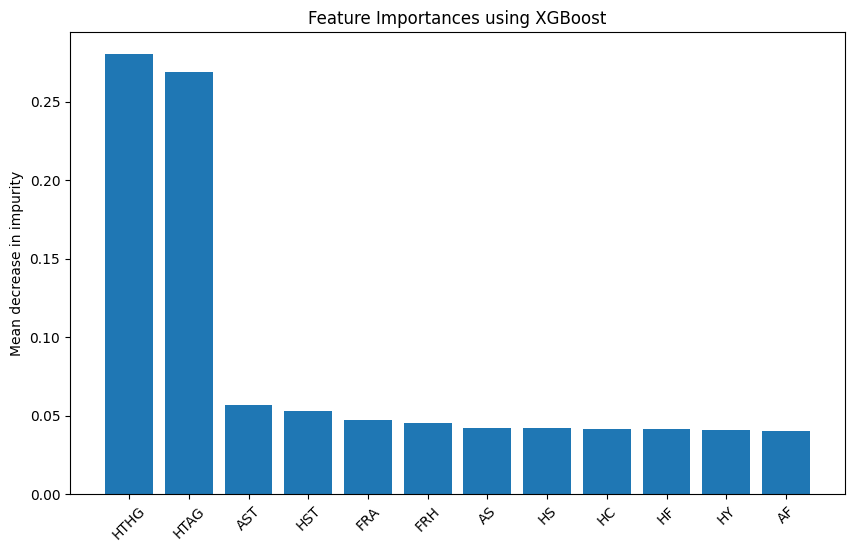

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score, recall_score
from xgboost import XGBClassifier


# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define the feature set and target variable
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_feature_importances = xgb_model.feature_importances_

# Sort the features with their importances
sorted_idx = np.argsort(xgb_feature_importances)[::-1]
sorted_importances = np.array(xgb_feature_importances)[sorted_idx]
sorted_features = np.array(features)[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances using XGBoost")
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=45)
plt.ylabel("Mean decrease in impurity")
plt.show()

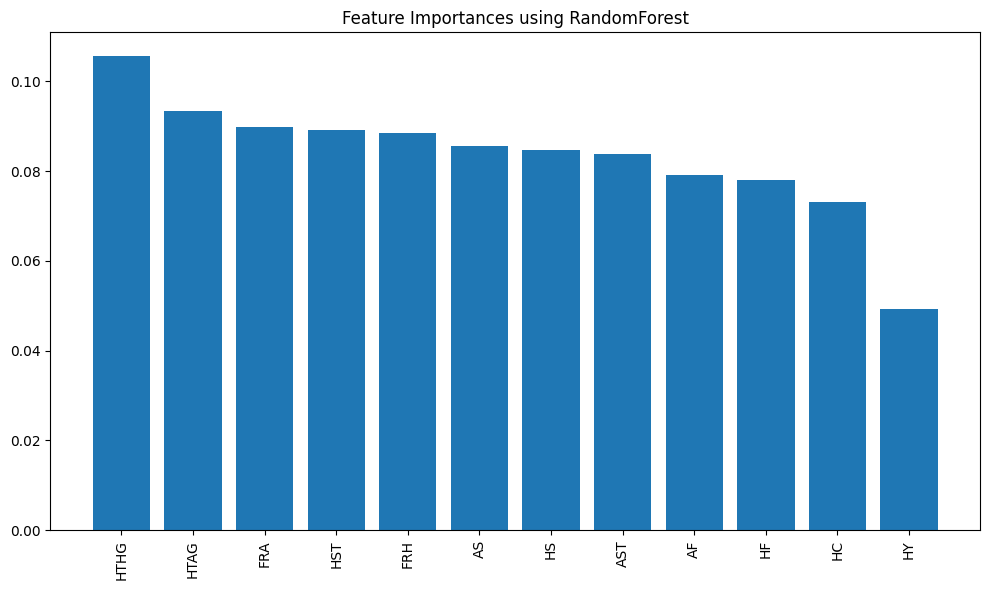

Accuracy: 0.6697368421052632
Recall: 0.6177031311866533
F1 Score: 0.6154047807805115
Cohen Kappa Score: 0.47593550567168774
              precision    recall  f1-score   support

           A       0.71      0.68      0.69       248
           D       0.49      0.31      0.38       183
           H       0.70      0.86      0.77       329

    accuracy                           0.67       760
   macro avg       0.63      0.62      0.62       760
weighted avg       0.65      0.67      0.65       760



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, classification_report
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
X = data[features]
y = data['FTR']

# Création et entraînement du modèle avec les meilleurs hyperparamètres obtenus
best_params = {
    'n_estimators': 791,
    'max_depth': 68,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'log2'
}

best_model = RandomForestClassifier(**best_params, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(features)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances using RandomForest")
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.tight_layout()
plt.show()

# Prédiction et évaluation du modèle
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

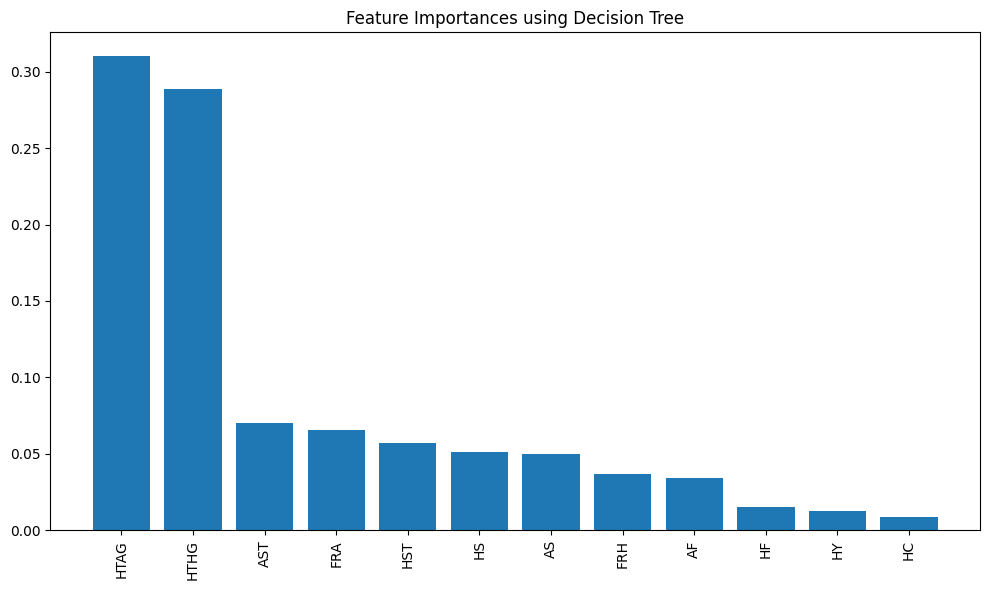

Best parameters found: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 13, 'random_state': 42}
Accuracy: 0.6710526315789473
Confusion Matrix:
 [[165  45  38]
 [ 43  71  69]
 [ 27  28 274]]
Recall: 0.6710526315789473
F1-Score: 0.661633260609571
Kappa Score: 0.48316055481354336


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/drive/MyDrive/Dataset_Isa_Alfredo60.csv')

# Define features and target
features = ['HTHG', 'HTAG', 'FRH', 'FRA', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'HY']
target = 'FTR'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with the best parameters found
best_params = {
    'criterion': 'entropy',
    'splitter': 'best',
    'max_depth': 7,
    'min_samples_split': 7,
    'min_samples_leaf': 13,
    'random_state': 42
}
clf = DecisionTreeClassifier(**best_params)

# Train the classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(features)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances using Decision Tree")
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.tight_layout()
plt.show()

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

print("Best parameters found:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)
print("F1-Score:", f1)
print("Kappa Score:", kappa)

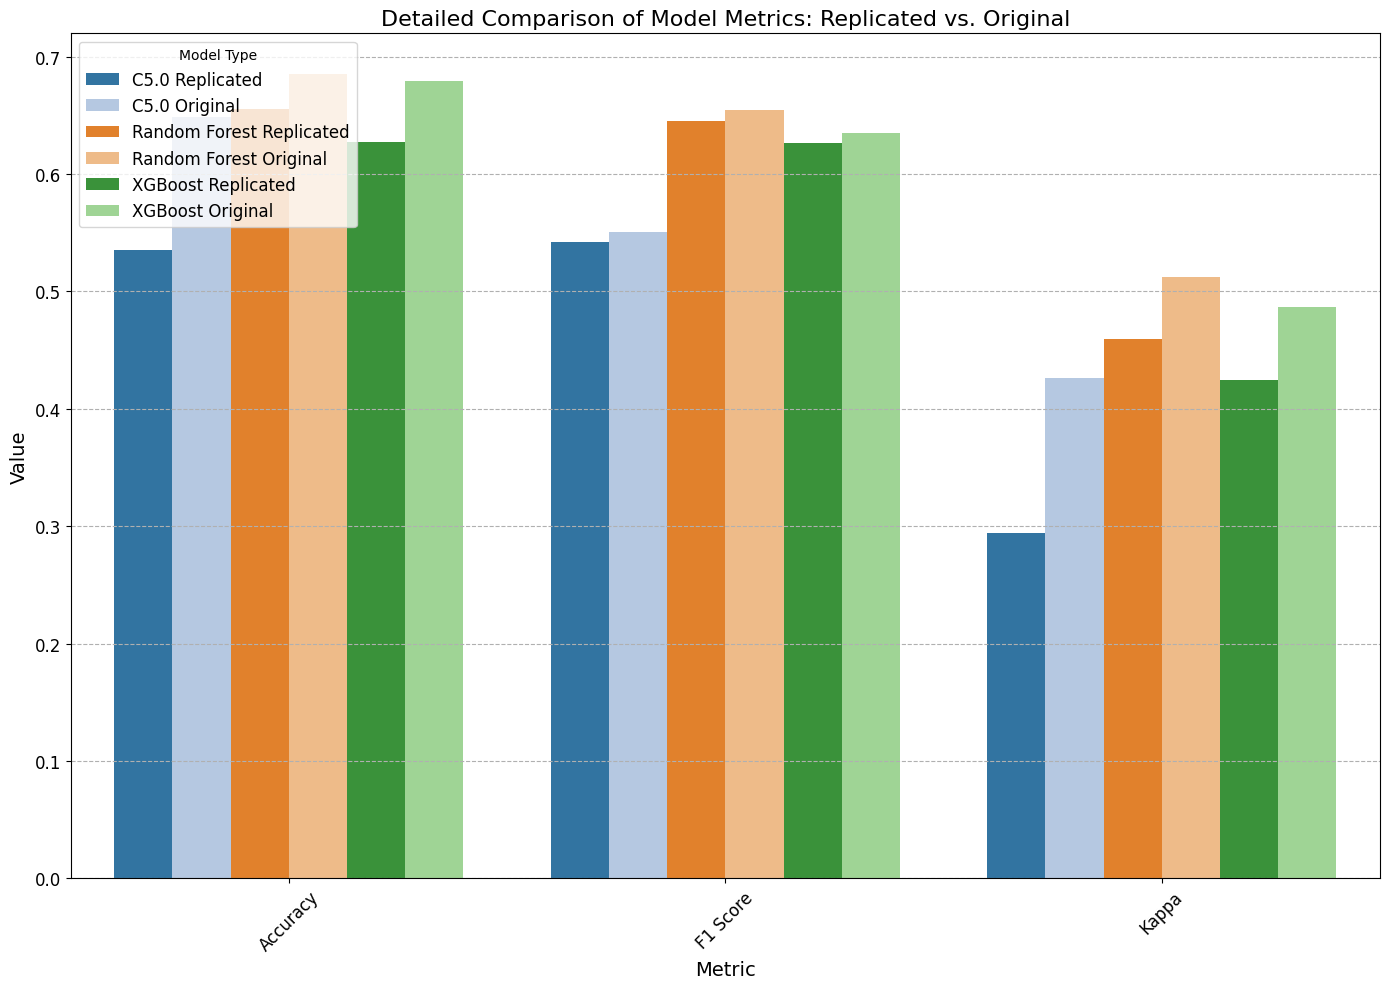

In [36]:
# Adjusting the plot to include all models correctly and ensure clarity
# We need to ensure that each model's metrics are individually represented for both replicated and original studies.

# Preparing data for a clearer comparison
# Expanded to explicitly separate each metric for each model type
df_expanded = pd.DataFrame({
    'Model': ['C5.0 Replicated', 'C5.0 Original', 'Random Forest Replicated', 'Random Forest Original', 'XGBoost Replicated', 'XGBoost Original'] * 3,
    'Metric': ['Accuracy'] * 6 + ['F1 Score'] * 6 + ['Kappa'] * 6,
    'Value': [
        0.5355, 0.6487,  # C5.0
        0.6553, 0.6855,  # Random Forest
        0.6276, 0.6789,  # XGBoost
        0.5420, 0.5506,  # C5.0
        0.6450, 0.6546,  # Random Forest
        0.6267, 0.6348,  # XGBoost
        0.2940, 0.4258,  # C5.0
        0.4591, 0.5123,  # Random Forest
        0.4247, 0.4867   # XGBoost
    ]
})

# Adjusting the plot with a color scheme that differentiates yet closely associates replicated and original models

# Defining a new color palette that closely associates replicated and original models
palette = {
    'C5.0 Replicated': '#1f77b4',  # blue
    'C5.0 Original': '#aec7e8',  # light blue
    'Random Forest Replicated': '#ff7f0e',  # orange
    'Random Forest Original': '#ffbb78',  # light orange
    'XGBoost Replicated': '#2ca02c',  # green
    'XGBoost Original': '#98df8a'  # light green
}

# Plotting with the updated color palette
plt.figure(figsize=(14, 10))
sns.barplot(x='Metric', y='Value', hue='Model', data=df_expanded, palette=palette)
plt.title('Detailed Comparison of Model Metrics: Replicated vs. Original', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Model Type', fontsize=12, loc='upper left')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

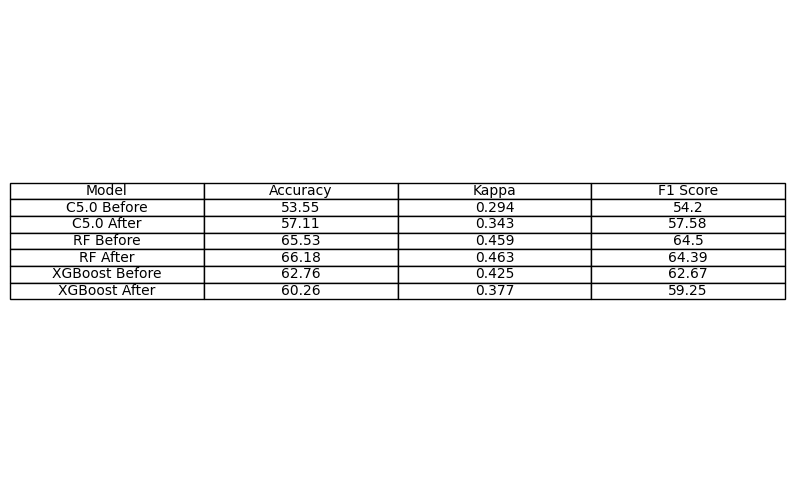

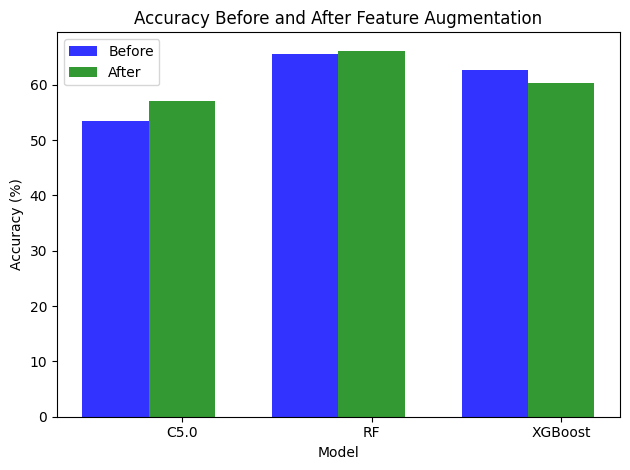

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Table 2
data_table_2 = {
    "Model": ["C5.0 Before", "C5.0 After", "RF Before", "RF After", "XGBoost Before", "XGBoost After"],
    "Accuracy": [53.55, 57.11, 65.53, 66.18, 62.76, 60.26],
    "Kappa": [0.294, 0.343, 0.459, 0.463, 0.425, 0.377],
    "F1 Score": [54.20, 57.58, 64.50, 64.39, 62.67, 59.25]
}

df_table_2 = pd.DataFrame(data_table_2)

# Generating Table 2 as a figure for visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_table_2.values,
         colLabels=df_table_2.columns,
         cellLoc = 'center',
         loc='center')


# Data for Figure 2
models = ['C5.0', 'RF', 'XGBoost']
metrics_before = [53.55, 65.53, 62.76]  # Accuracy before feature augmentation
metrics_after = [57.11, 66.18, 60.26]  # Accuracy after feature augmentation

fig, ax = plt.subplots()
index = range(len(models))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, metrics_before, bar_width,
alpha=opacity,
color='b',
label='Before')

rects2 = plt.bar([p + bar_width for p in index], metrics_after, bar_width,
alpha=opacity,
color='g',
label='After')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Before and After Feature Augmentation')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

plt.tight_layout()

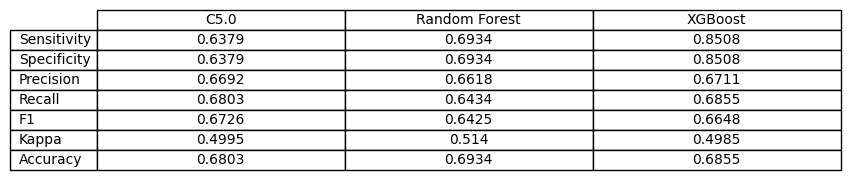

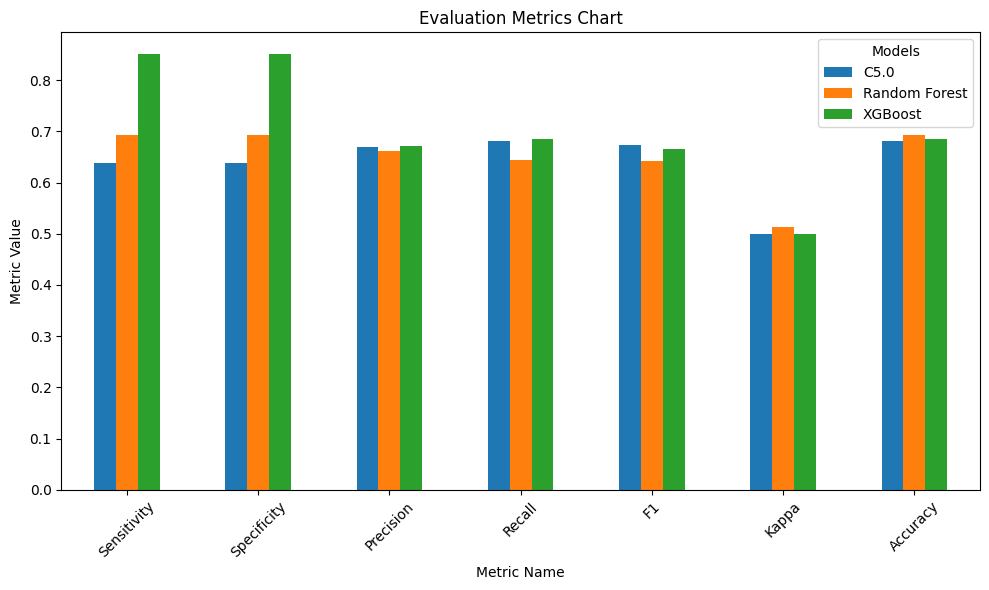

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided values for each classifier
data = {
    'C5.0': [0.6379, 0.6379, 0.6692, 0.6803, 0.6726, 0.4995, 0.6803],
    'Random Forest': [0.6934, 0.6934, 0.6618, 0.6434, 0.6425, 0.514, 0.6934],
    'XGBoost': [0.8508, 0.8508, 0.6711, 0.6855, 0.6648, 0.4985, 0.6855]
}

# The index for the DataFrame
metrics = ['Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1', 'Kappa', 'Accuracy']

# Creating the DataFrame
df = pd.DataFrame(data, index=metrics)

# Plotting the table
fig_table, ax_table = plt.subplots(figsize=(8, 2))  # set size frame
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc = 'center', colLoc = 'center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', ax=ax)
plt.title('Evaluation Metrics Chart')
plt.xlabel('Metric Name')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(title='Models', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()



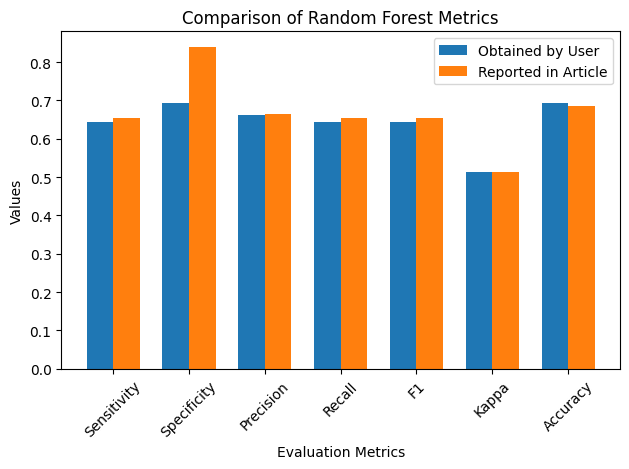

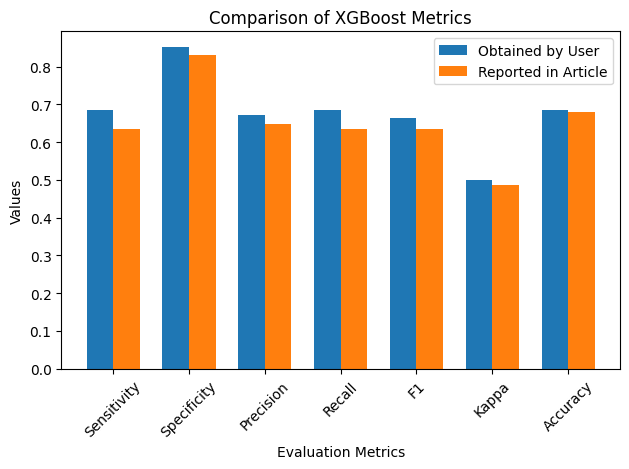

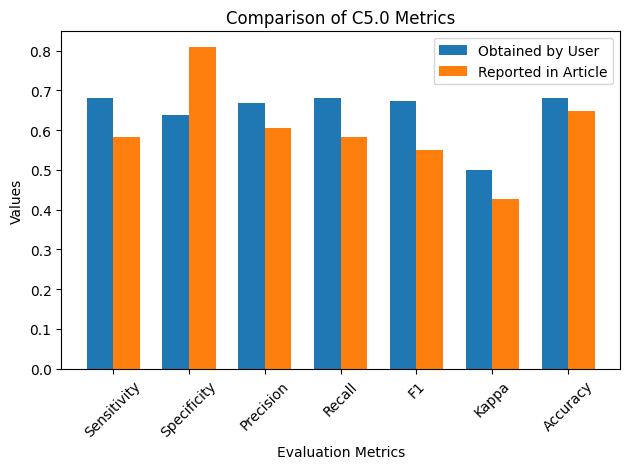

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Les métriques d'évaluation
metrics = ['Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1', 'Kappa', 'Accuracy']

# Les valeurs que l'utilisateur a obtenues
user_values = {
    'Random Forest': [0.6434, 0.6934, 0.6618, 0.6434, 0.6425, 0.514, 0.6934],
    'XGBoost': [0.6855, 0.8508, 0.6711, 0.6855, 0.6648, 0.4985, 0.6855],
    'C5.0': [0.6803, 0.6379, 0.6692, 0.6803, 0.6726, 0.4995, 0.6803]
}

# Les valeurs obtenues dans l'article
article_values = {
    'Random Forest': [0.6545, 0.8381, 0.6652, 0.6545, 0.6546, 0.5123, 0.6855],
    'XGBoost': [0.6345, 0.8295, 0.6477, 0.6345, 0.6348, 0.4867, 0.6789],
    'C5.0': [0.5837, 0.8078, 0.6053, 0.5837, 0.5506, 0.4258, 0.6487]
}

# Fonction pour tracer un diagramme à barres pour comparer les valeurs
def plot_comparison_chart(user_values, article_values, title):
    n_metrics = len(metrics)
    index = np.arange(n_metrics)
    bar_width = 0.35

    fig, ax = plt.subplots()
    user_bars = ax.bar(index, user_values, bar_width, label='Obtained by User')
    article_bars = ax.bar(index + bar_width, article_values, bar_width, label='Reported in Article')

    ax.set_xlabel('Evaluation Metrics')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Tracer les trois diagrammes
for model in user_values.keys():
    plot_comparison_chart(user_values[model], article_values[model], f'Comparison of {model} Metrics')